In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('weatherHistory.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [30]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# for col in [col  for col in data.columns if data[col].dtypes==float]:
#     sns.boxplot(data[col])
#     plt.show()

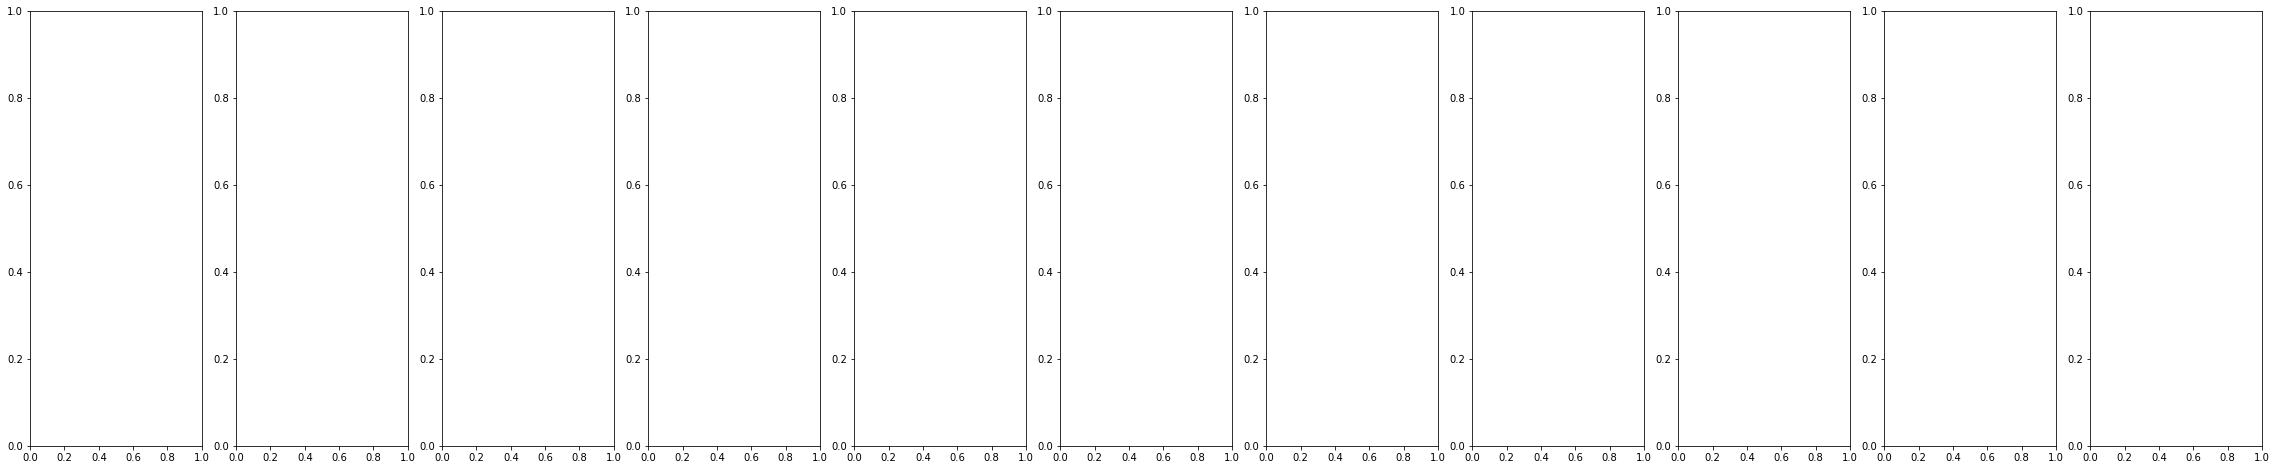

In [4]:
fig, axs = plt.subplots(1,11,figsize=(40, 8))

In [5]:
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [13]:
data['Daily Summary'].value_counts().index.tolist()

['Mostly cloudy throughout the day.',
 'Partly cloudy throughout the day.',
 'Partly cloudy until night.',
 'Partly cloudy starting in the morning.',
 'Foggy in the morning.',
 'Foggy starting overnight continuing until morning.',
 'Partly cloudy until evening.',
 'Mostly cloudy until night.',
 'Overcast throughout the day.',
 'Partly cloudy starting in the morning continuing until evening.',
 'Foggy until morning.',
 'Partly cloudy starting in the morning continuing until night.',
 'Mostly cloudy starting in the morning.',
 'Foggy starting in the evening.',
 'Partly cloudy starting overnight.',
 'Partly cloudy starting in the afternoon.',
 'Partly cloudy starting in the afternoon continuing until evening.',
 'Foggy overnight.',
 'Mostly cloudy starting overnight.',
 'Mostly cloudy until evening.',
 'Clear throughout the day.',
 'Partly cloudy starting overnight continuing until night.',
 'Partly cloudy overnight.',
 'Foggy throughout the day.',
 'Partly cloudy starting overnight conti

In [14]:
import spacy
import re
import string
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
import nltk
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)
    
def appendChunk(original, chunk):
    return original + ' ' + chunk
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
            
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())


def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G,k=2, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=5000, node_color='lightblue', alpha=0.9,font_size=10,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()


Mostly cloudy throughout the day.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , cloudy , day


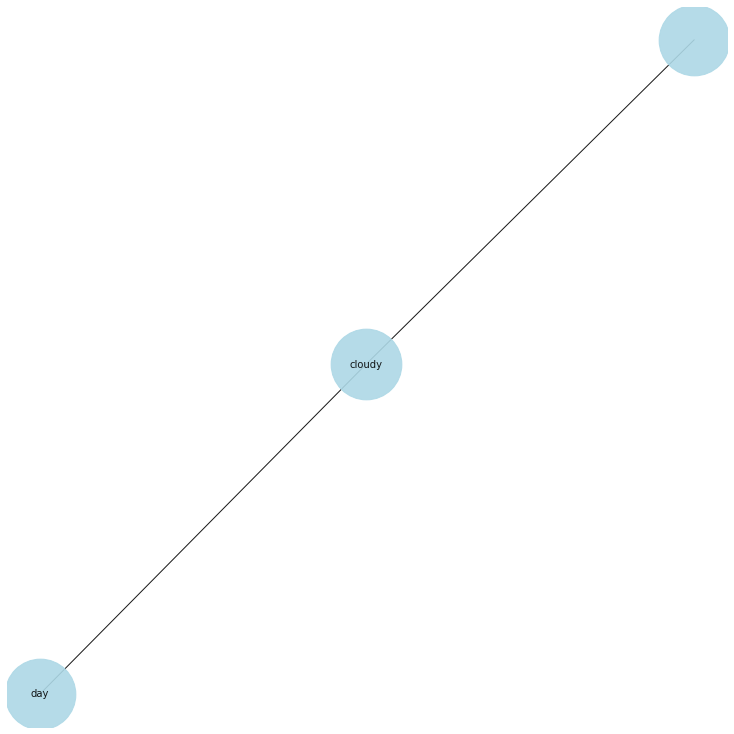

Partly cloudy throughout the day.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , cloudy , day


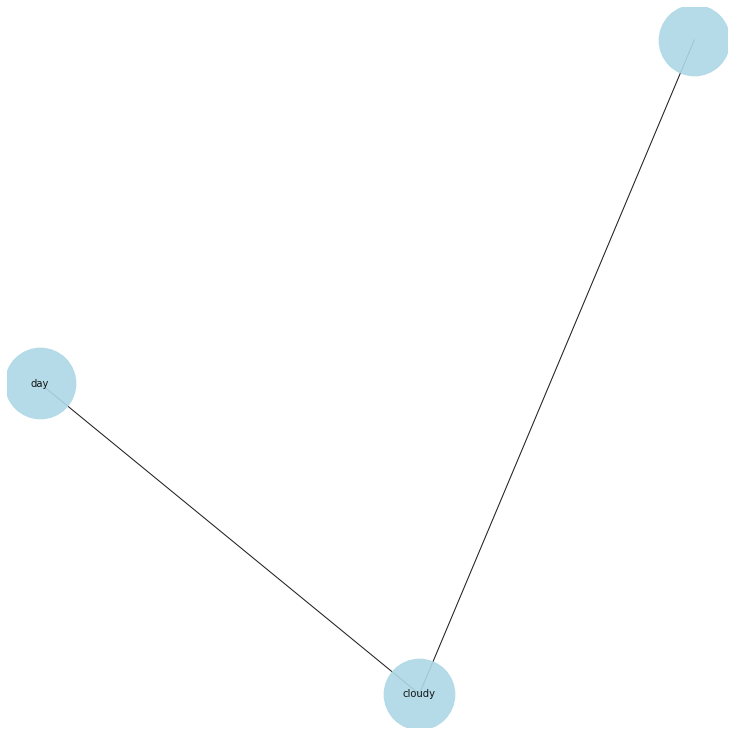

Partly cloudy until night.
Partly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
. -> punct
 , cloudy , night


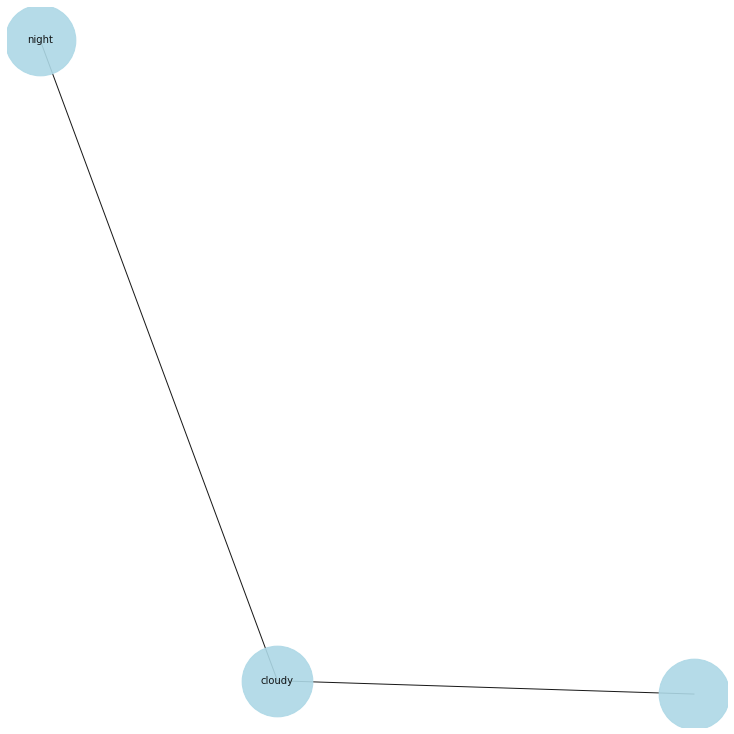

Partly cloudy starting in the morning.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy starting , morning


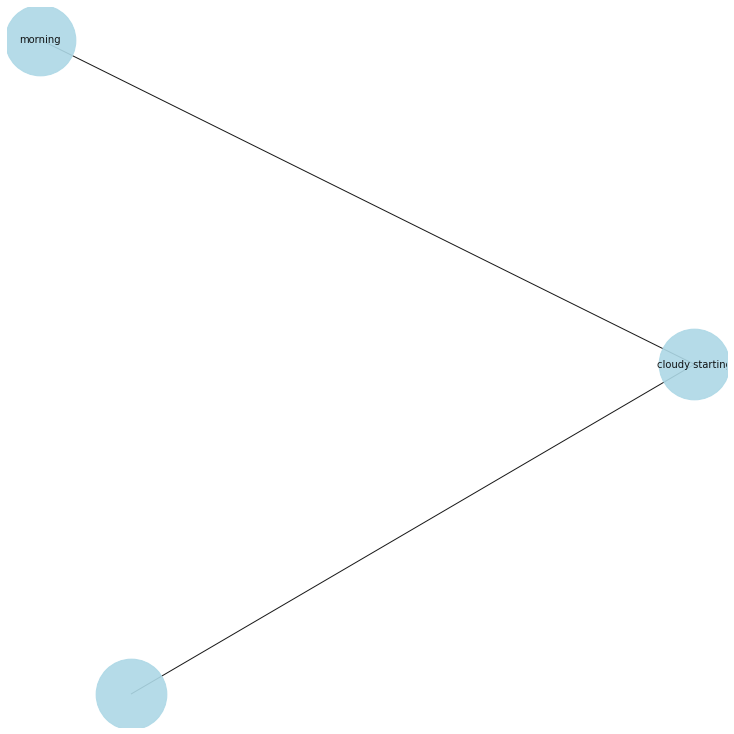

Foggy in the morning.
Foggy -> ROOT
in -> prep
the -> det
morning -> pobj
. -> punct
 , Foggy , morning


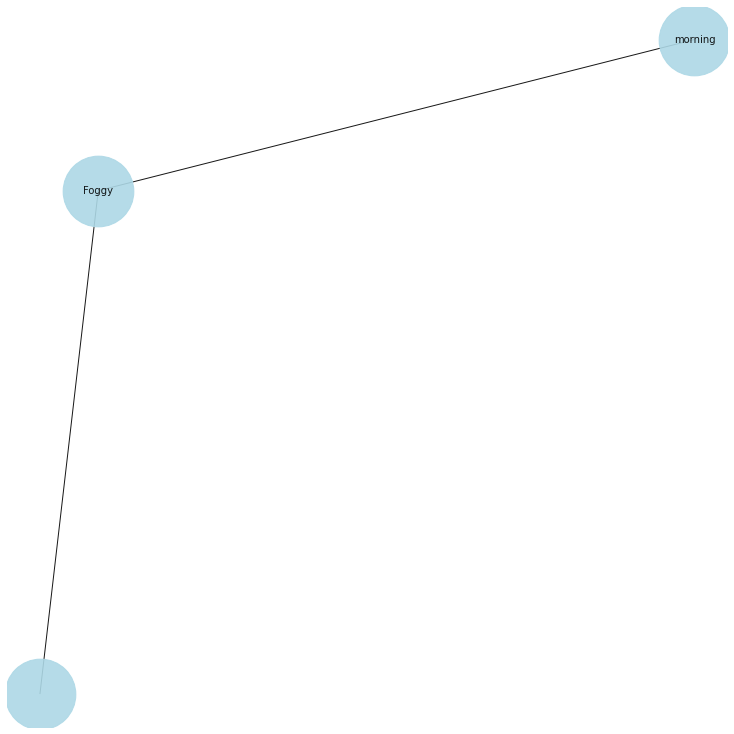

Foggy starting overnight continuing until morning.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
 , Foggy , morning


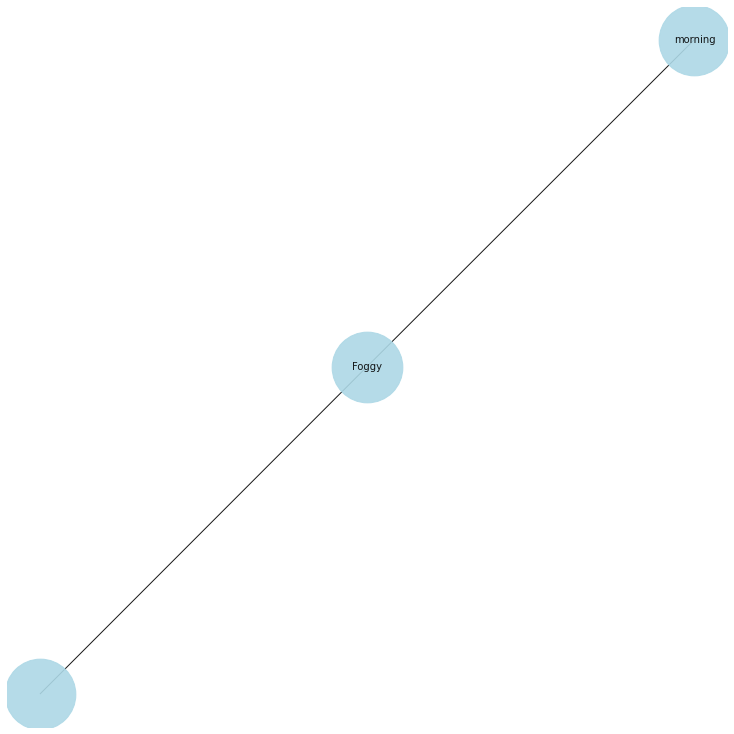

Partly cloudy until evening.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
. -> punct
 , cloudy , evening


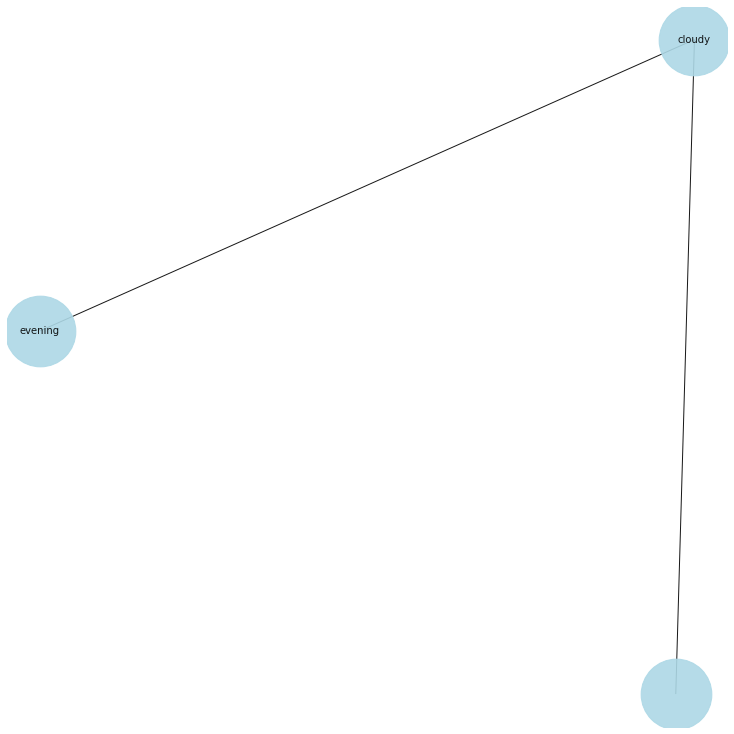

Mostly cloudy until night.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
. -> punct
 , cloudy , night


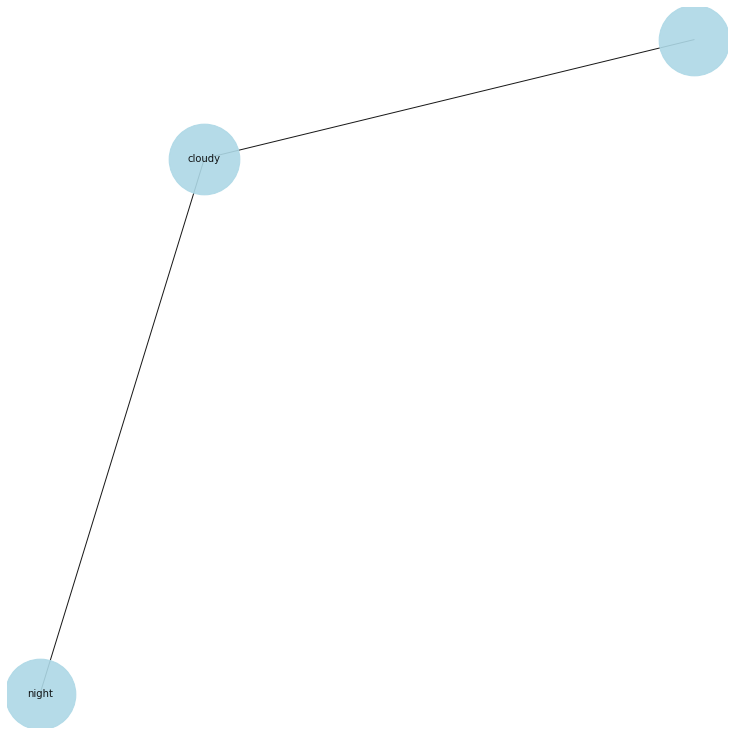

Overcast throughout the day.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , overcast , day


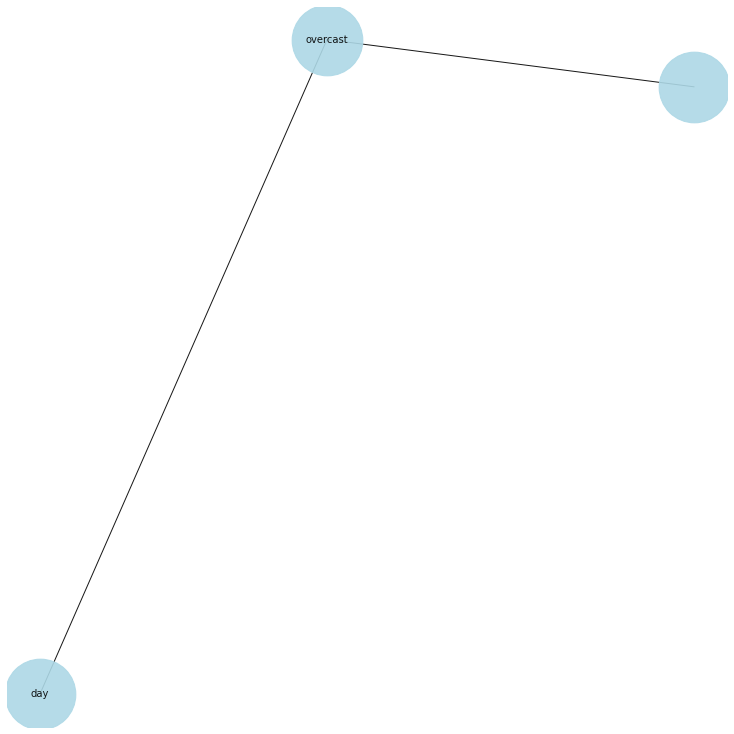

Partly cloudy starting in the morning continuing until evening.
Partly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
starting , continue , morning evening


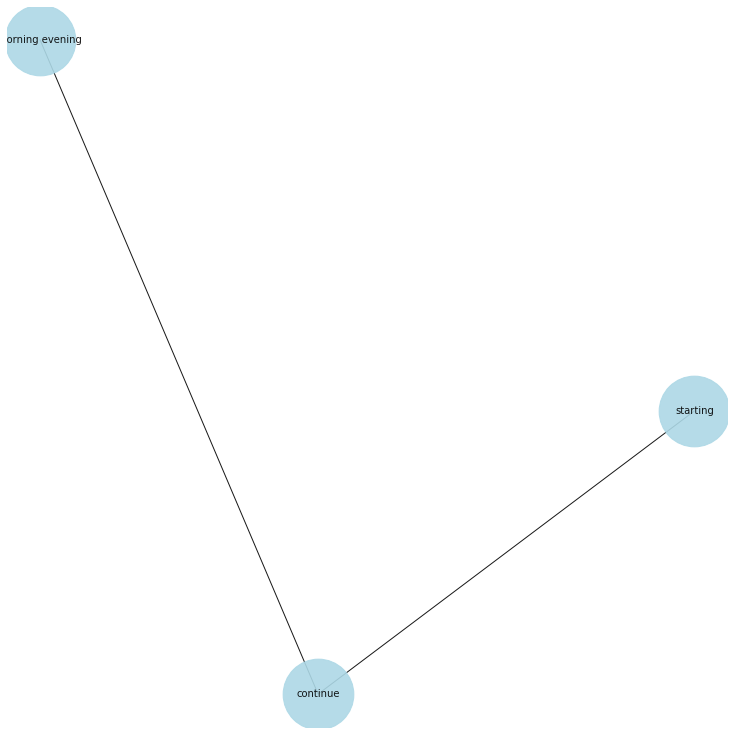

Foggy until morning.
Foggy -> ROOT
until -> prep
morning -> pobj
. -> punct
 , Foggy , morning


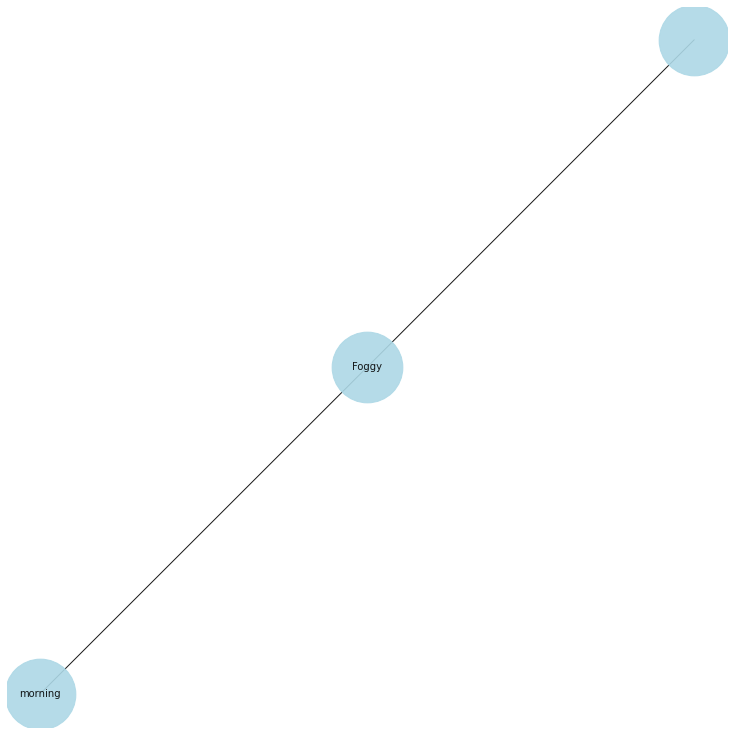

Partly cloudy starting in the morning continuing until night.
Partly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
starting , continue , morning night


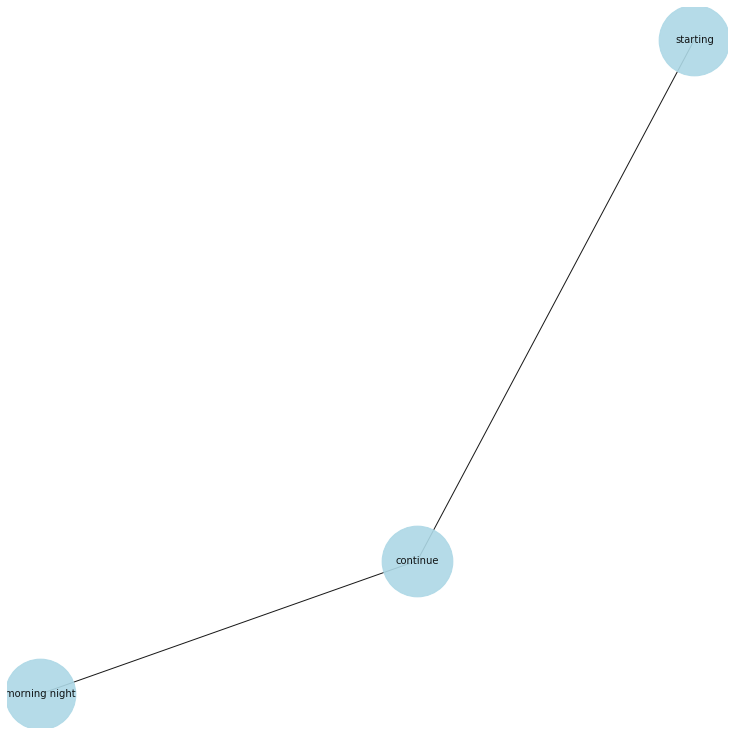

Mostly cloudy starting in the morning.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy starting , morning


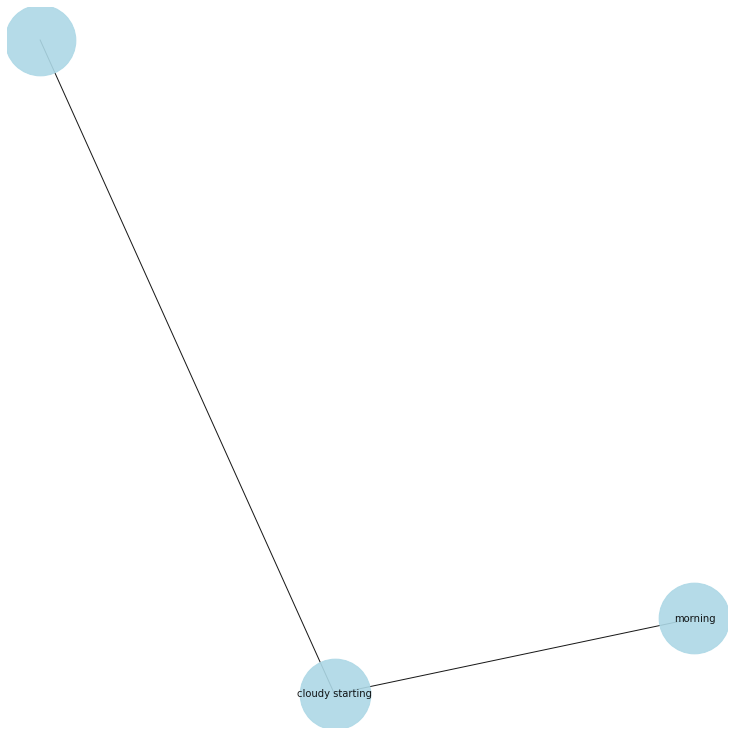

Foggy starting in the evening.
Foggy -> ROOT
starting -> acl
in -> prep
the -> det
evening -> pobj
. -> punct
 , Foggy , evening


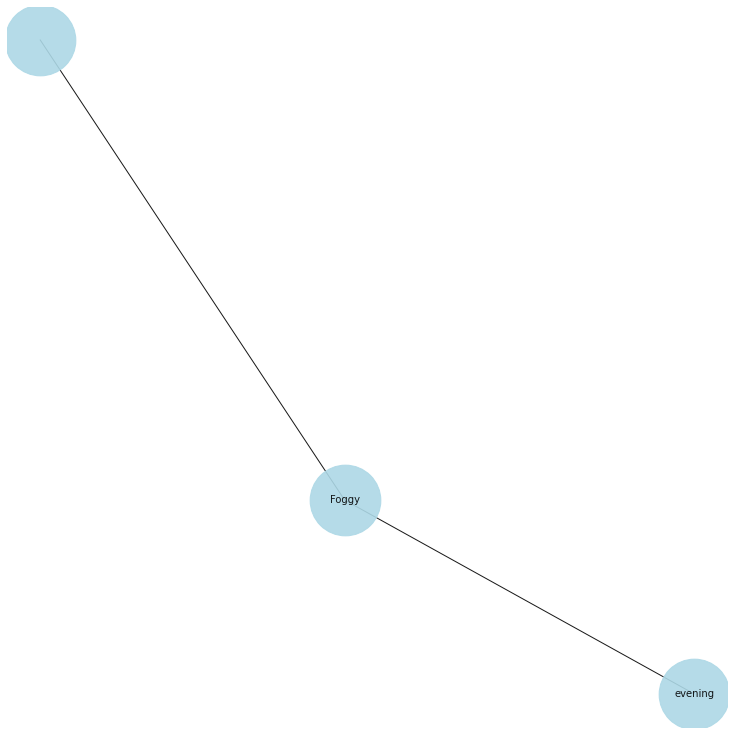

Partly cloudy starting overnight.
Partly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
. -> punct
 , cloudy starting , 


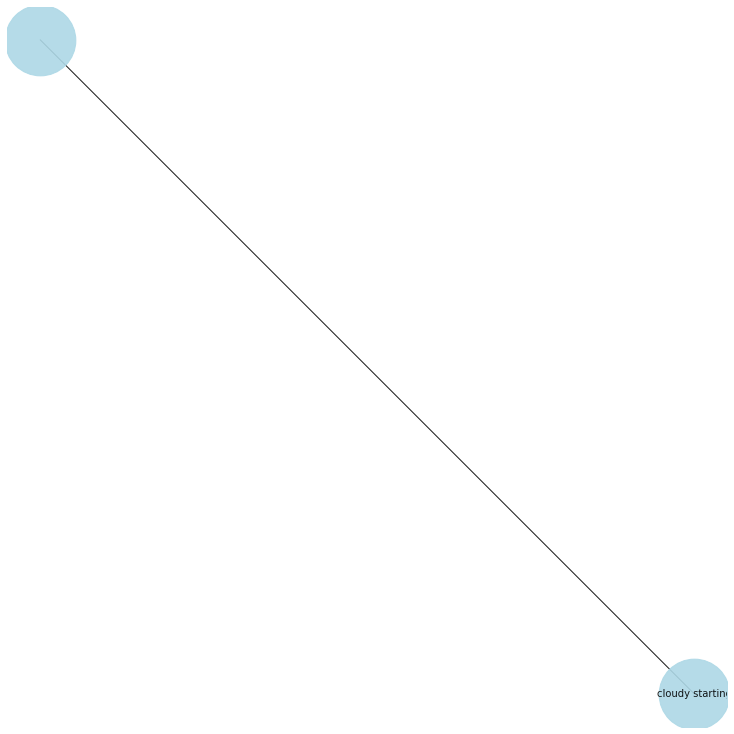

Partly cloudy starting in the afternoon.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy starting , afternoon


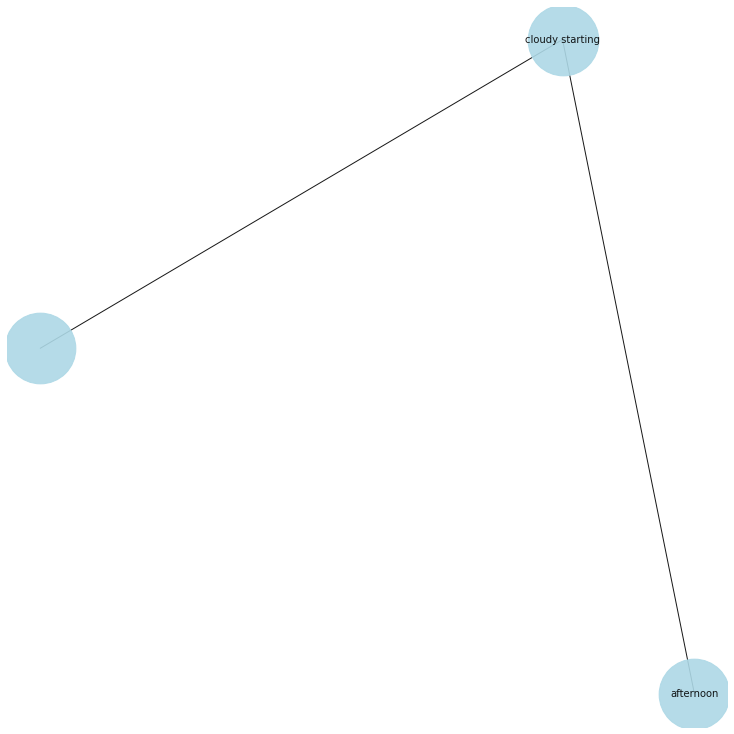

Partly cloudy starting in the afternoon continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
 , cloudy starting , afternoon evening


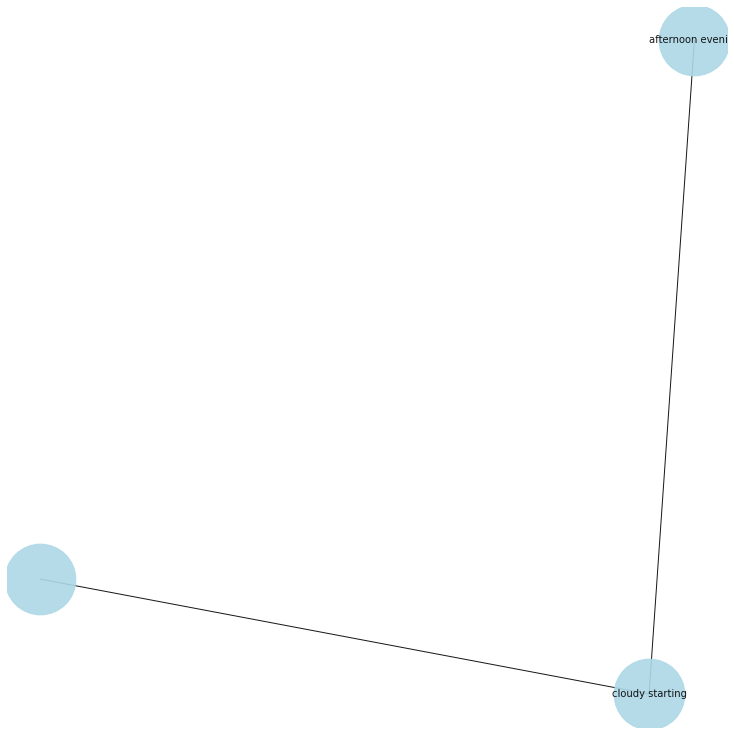

Foggy overnight.
Foggy -> ROOT
overnight -> advmod
. -> punct
 , Foggy , 


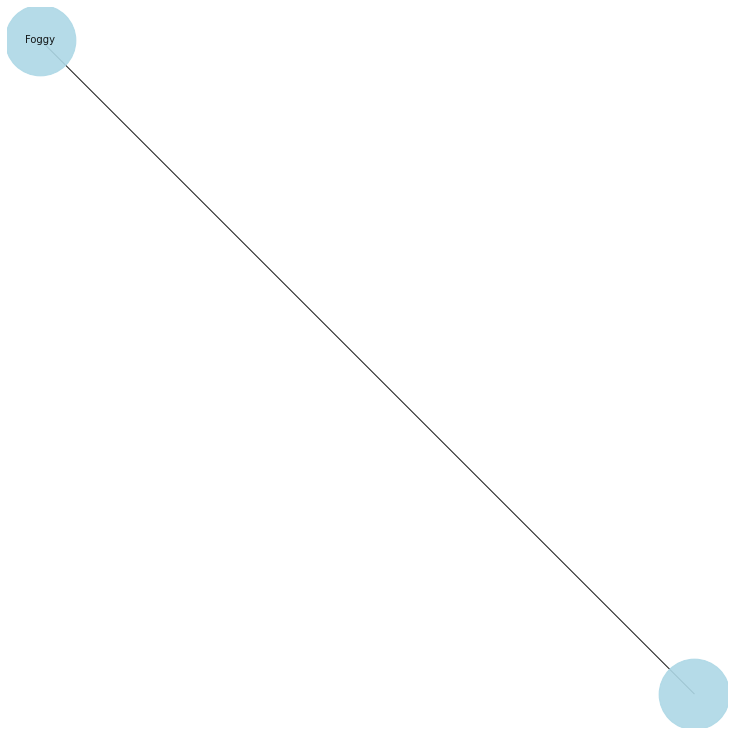

Mostly cloudy starting overnight.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
. -> punct
 , cloudy starting , 


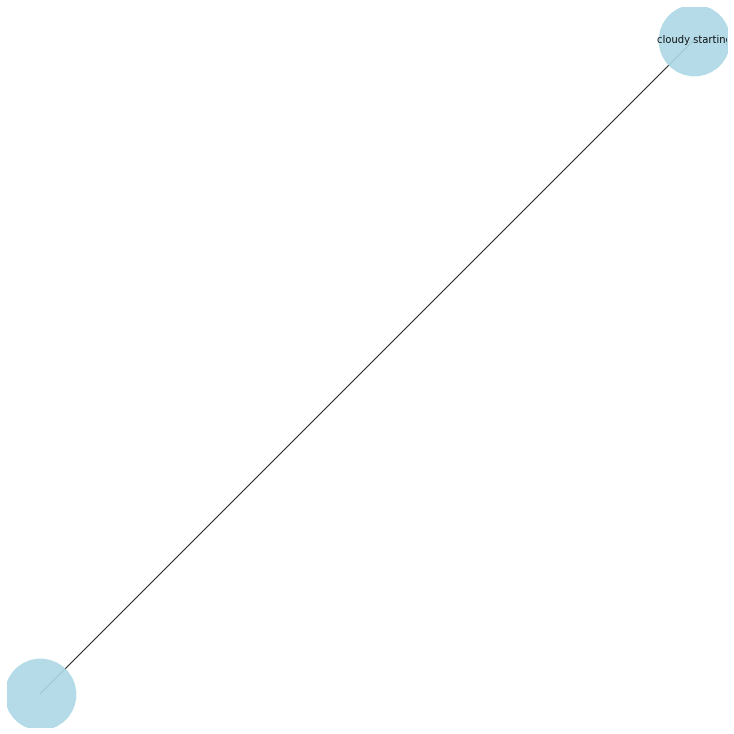

Mostly cloudy until evening.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
. -> punct
 , cloudy , evening


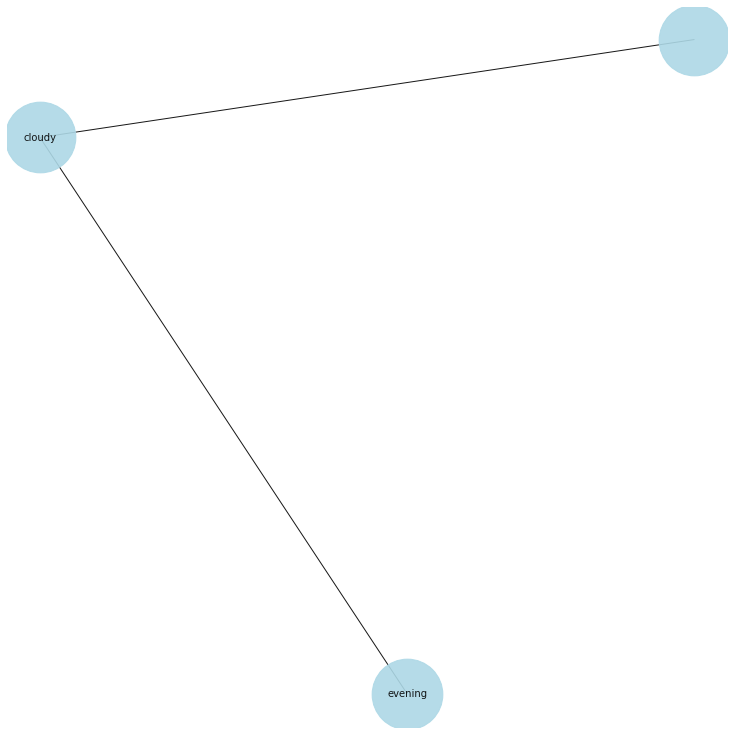

Clear throughout the day.
Clear -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , clear , day


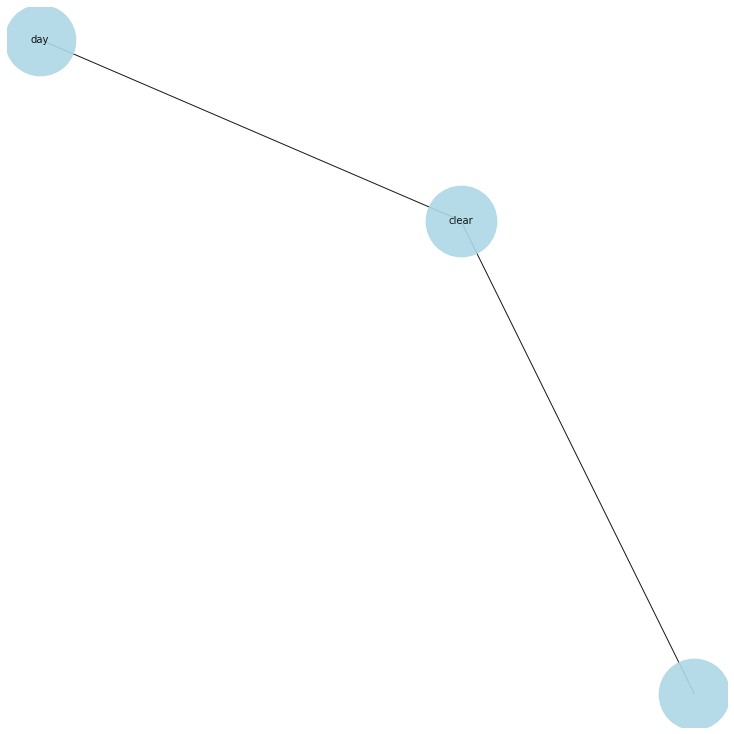

Partly cloudy starting overnight continuing until night.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
starting , cloudy continue , night


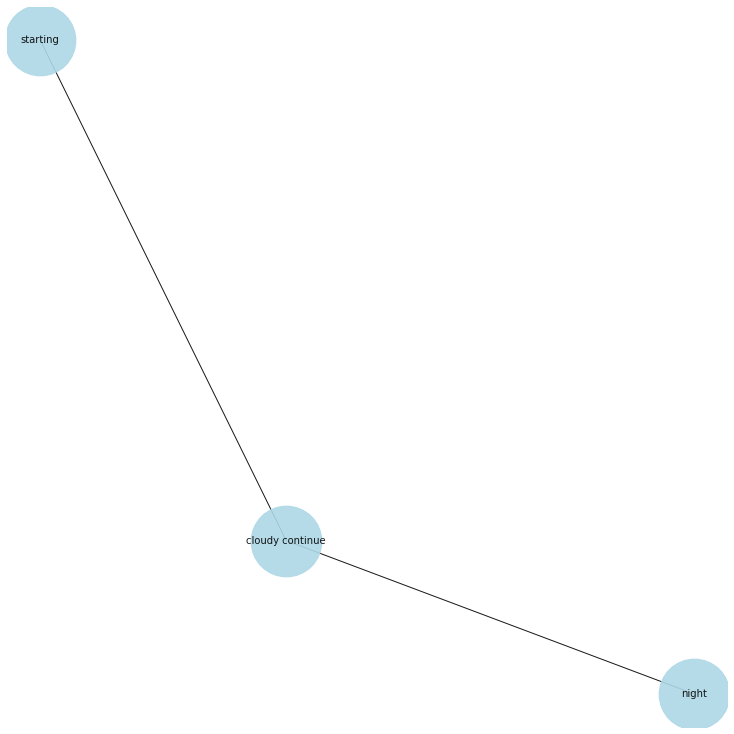

Partly cloudy overnight.
Partly -> advmod
cloudy -> amod
overnight -> ROOT
. -> punct
 , cloudy overnight , 


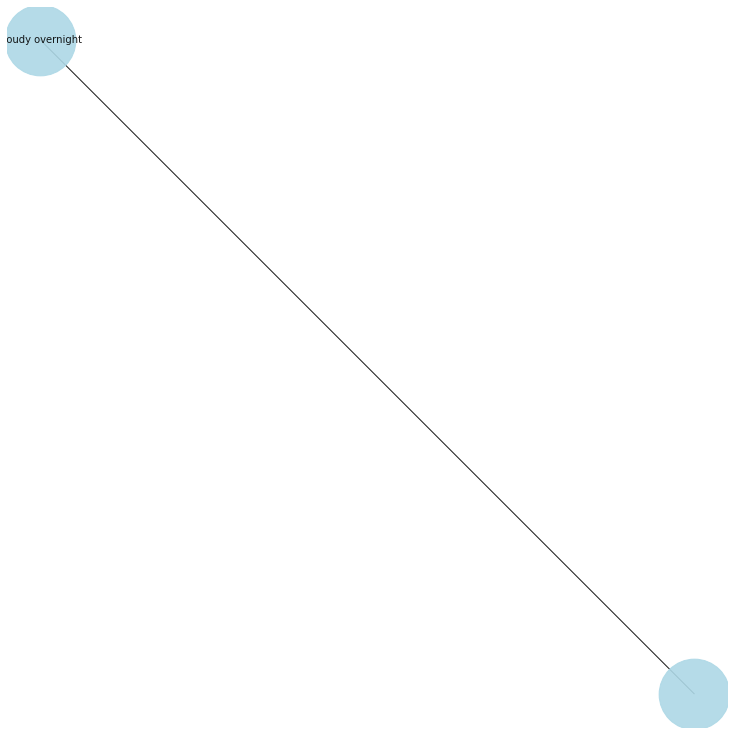

Foggy throughout the day.
Foggy -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , Foggy , day


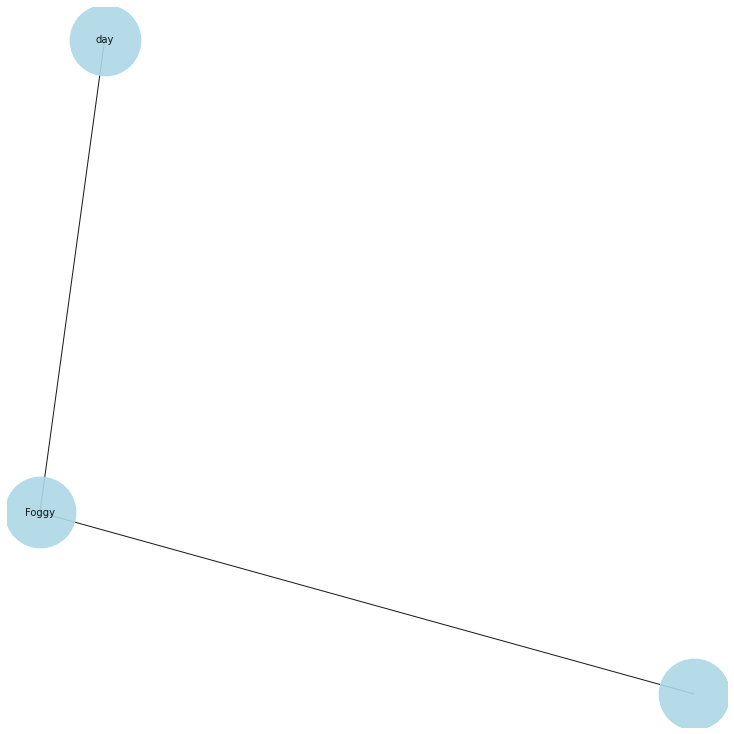

Partly cloudy starting overnight continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , evening


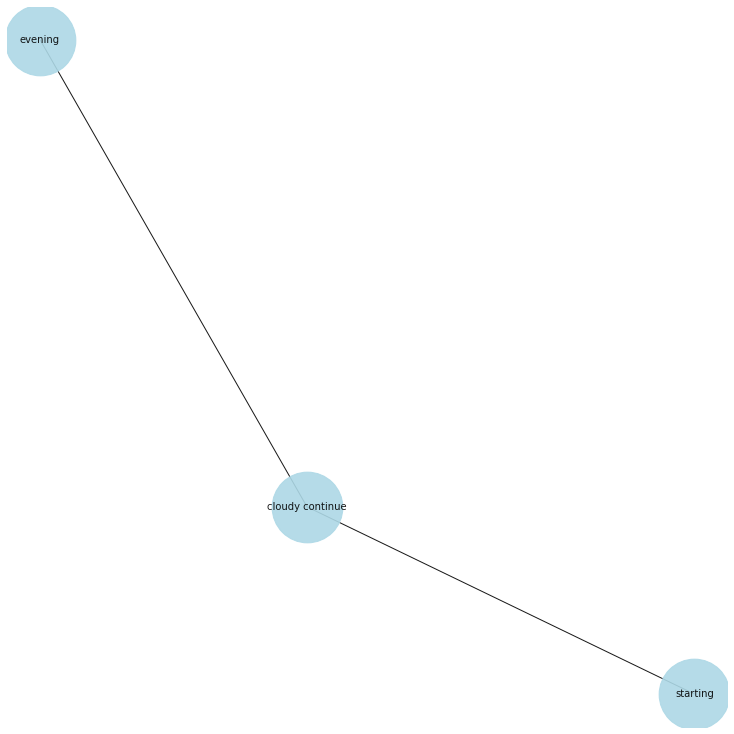

Foggy until night.
Foggy -> ROOT
until -> prep
night -> pobj
. -> punct
 , Foggy , night


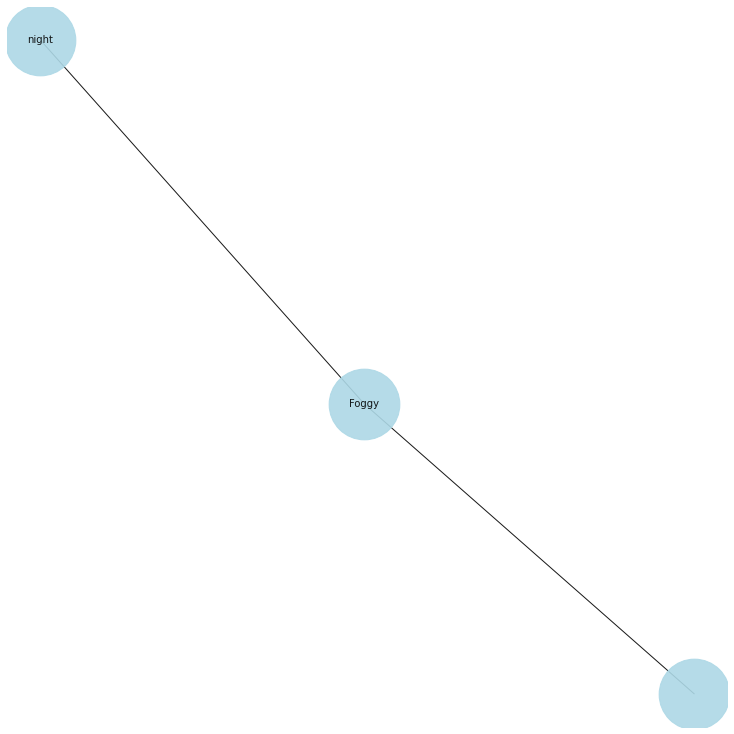

Partly cloudy in the morning.
Partly -> advmod
cloudy -> ROOT
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy , morning


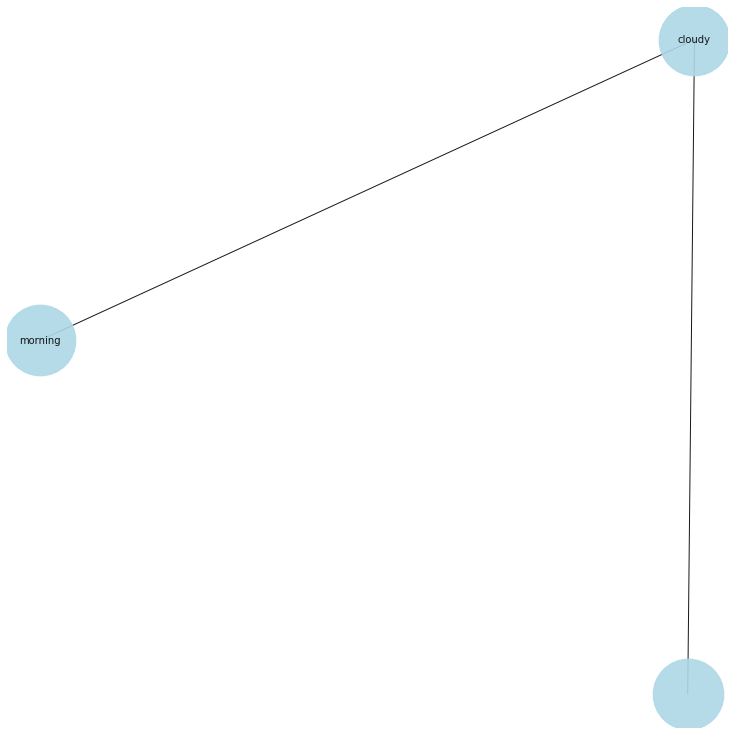

Mostly cloudy starting overnight continuing until night.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
starting , cloudy continue , night


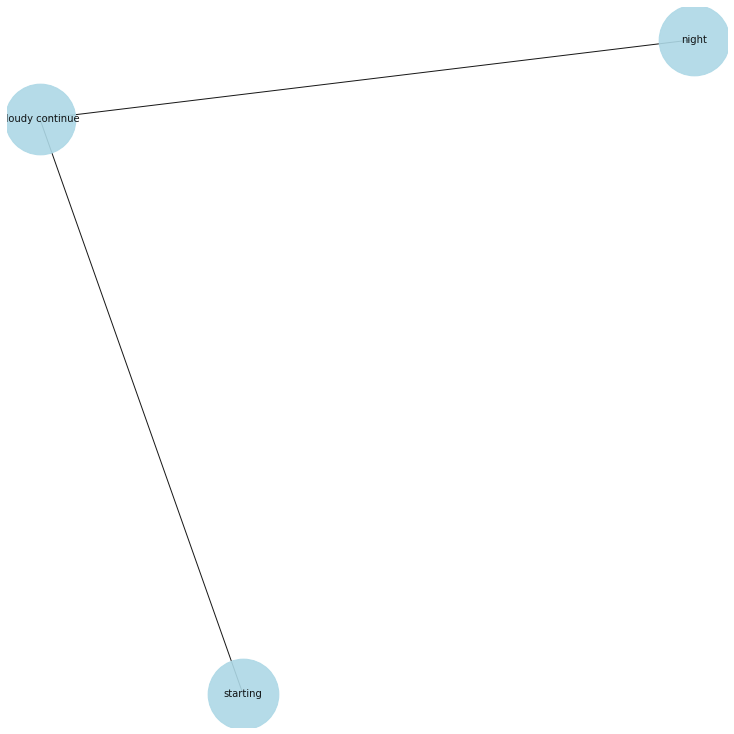

Foggy starting overnight continuing until afternoon.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
 , Foggy , afternoon


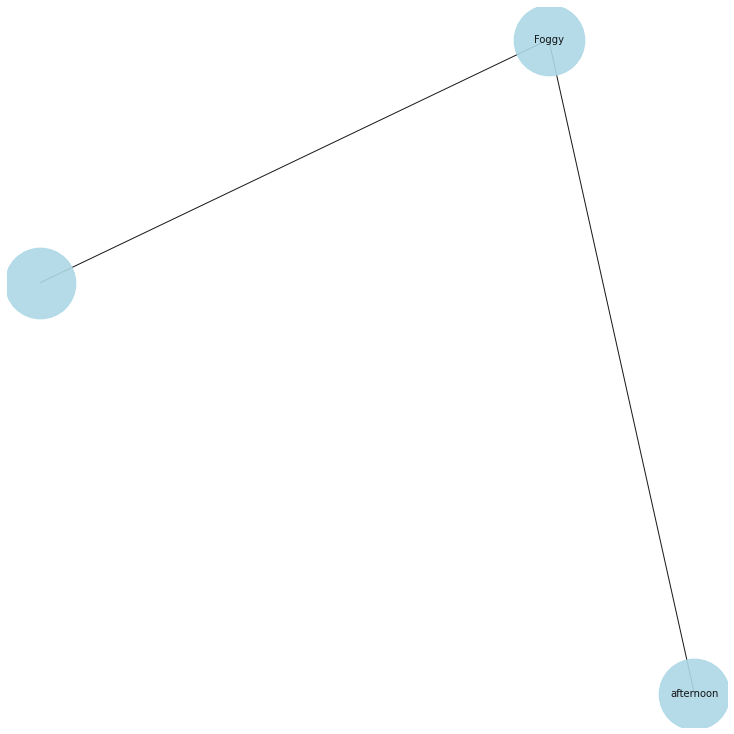

Foggy until afternoon.
Foggy -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , Foggy , afternoon


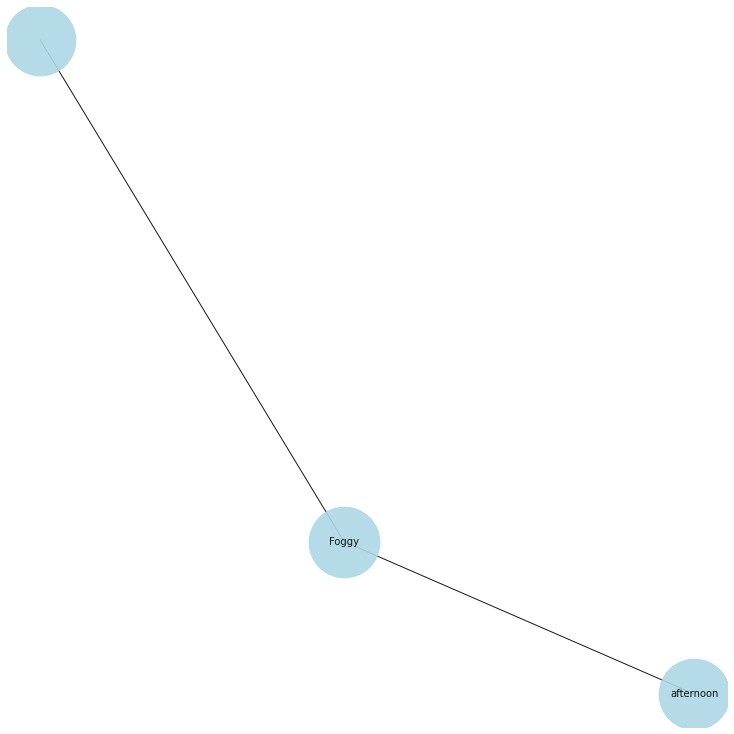

Partly cloudy starting in the afternoon continuing until night.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
night -> pobj
. -> punct
 , cloudy starting , afternoon night


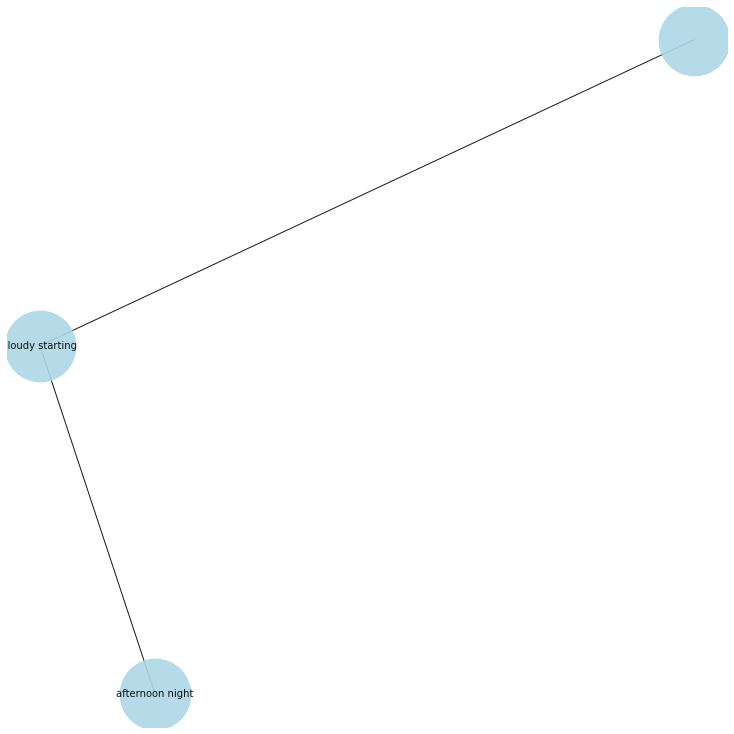

Foggy starting in the morning continuing until afternoon.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
Foggy , continue , morning afternoon


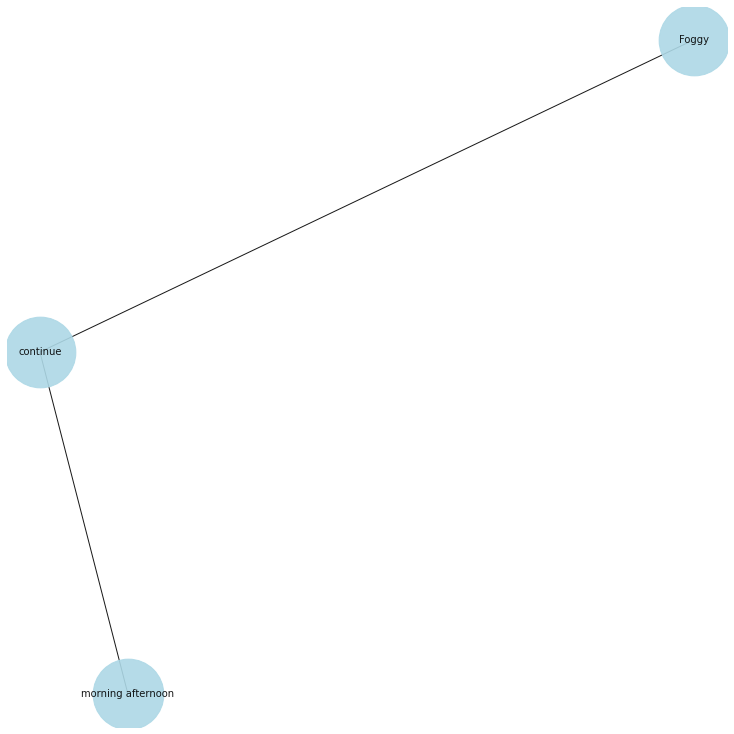

Partly cloudy until morning.
Partly -> advmod
cloudy -> ROOT
until -> prep
morning -> pobj
. -> punct
 , cloudy , morning


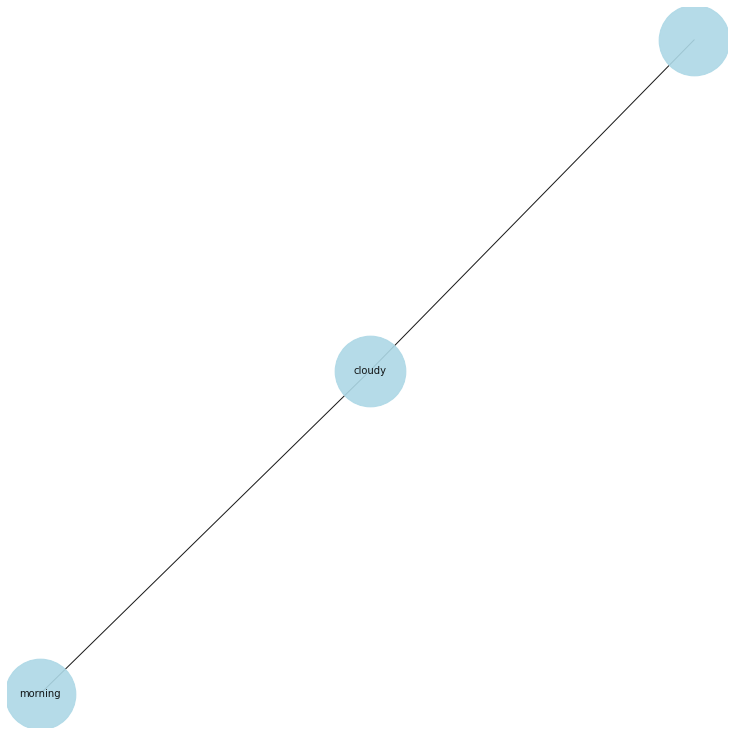

Mostly cloudy throughout the day and breezy in the morning.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy , day morning


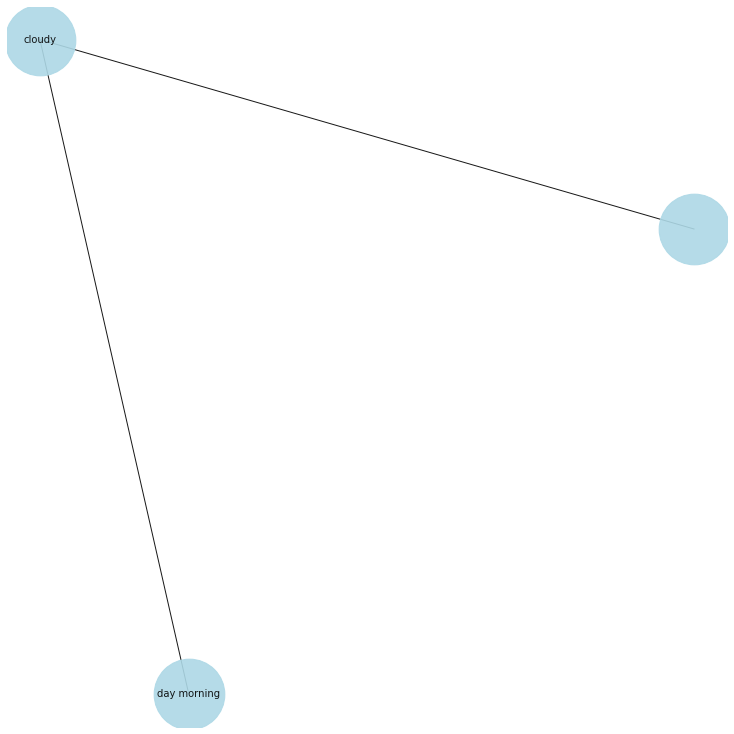

Foggy starting in the afternoon.
Foggy -> ROOT
starting -> acl
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , Foggy , afternoon


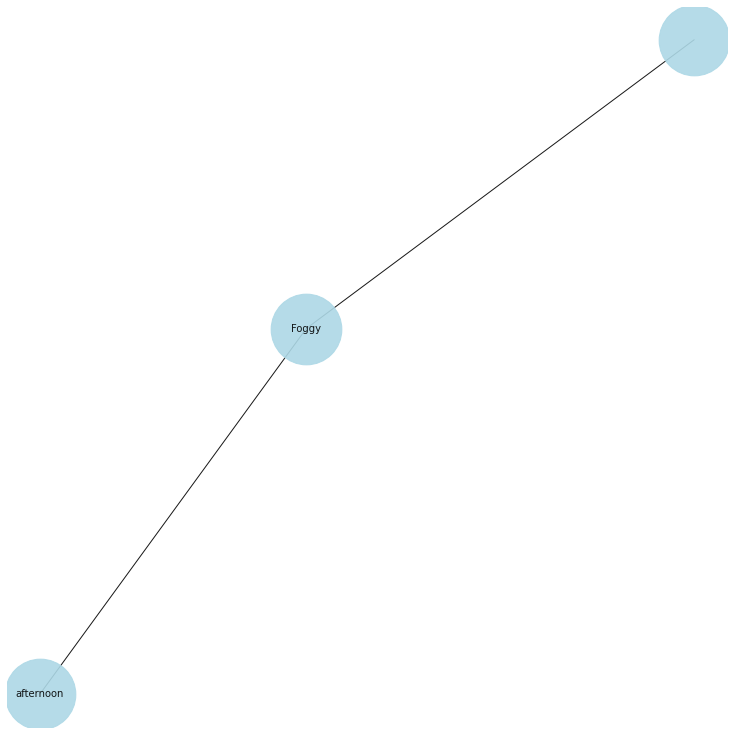

Foggy starting overnight continuing until evening.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
 , Foggy , evening


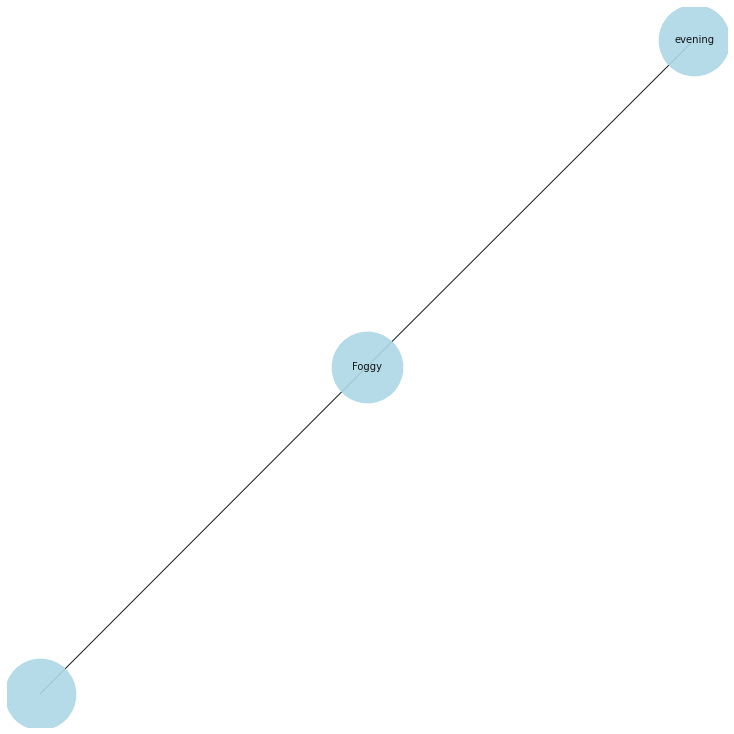

Partly cloudy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
starting , continue , morning afternoon


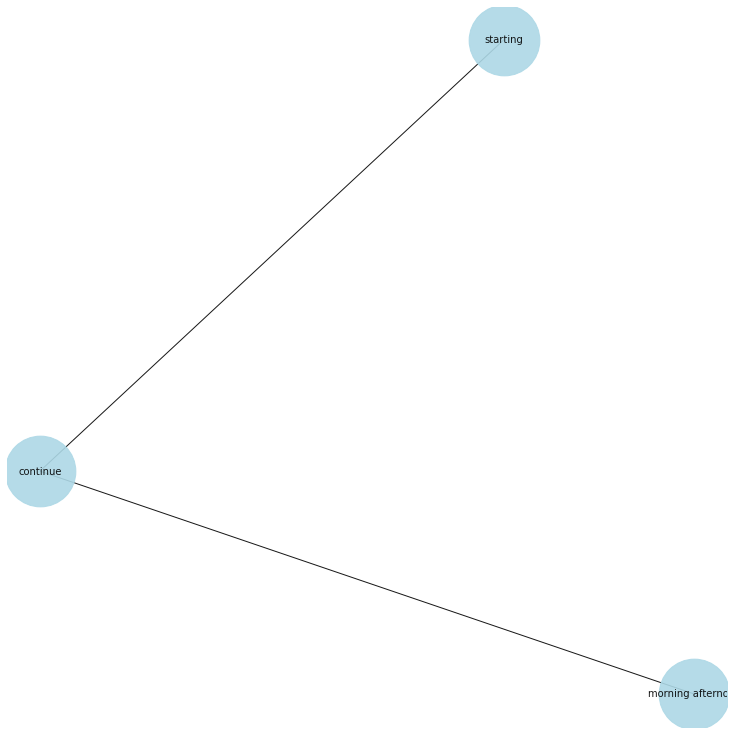

Foggy starting in the afternoon continuing until evening.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Foggy , continue , afternoon evening


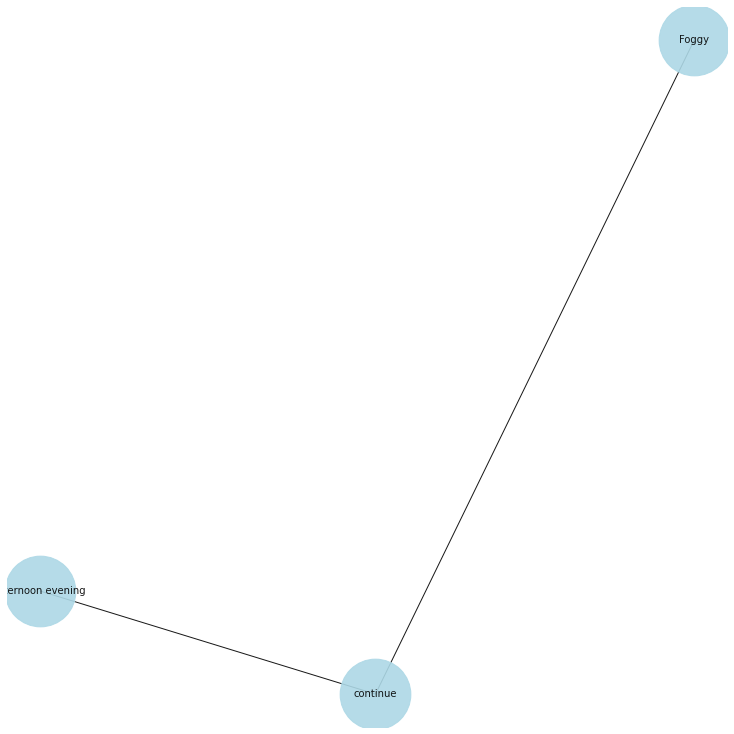

Foggy starting in the morning continuing until night.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Foggy , continue , morning night


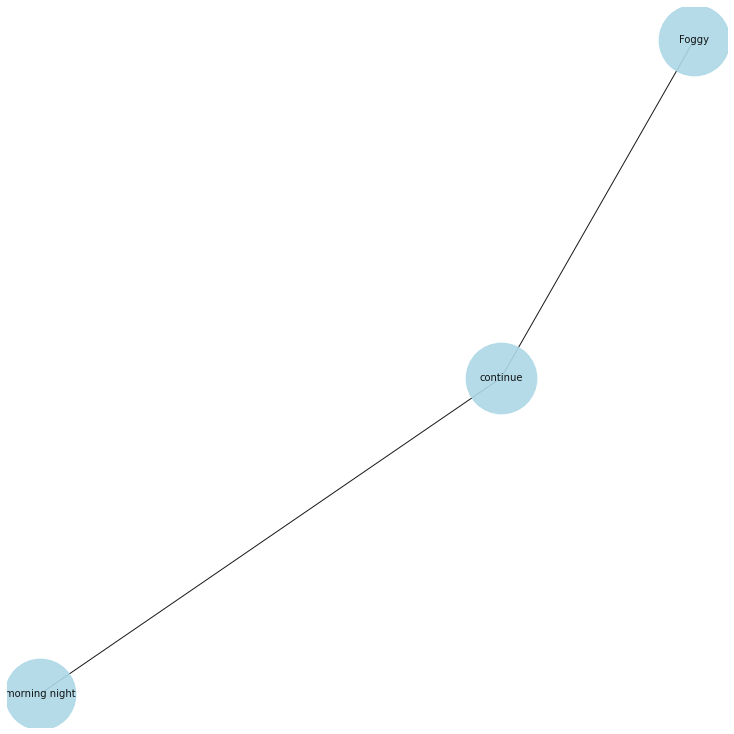

Mostly cloudy throughout the day and breezy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy , day morning afternoon


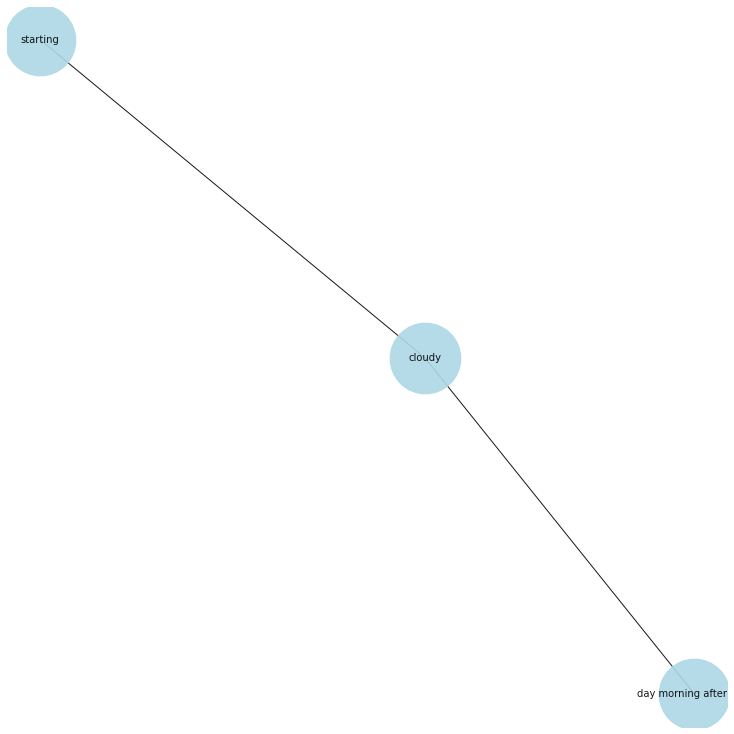

Partly cloudy starting overnight continuing until morning.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
morning -> pobj
. -> punct
starting , cloudy continue , morning


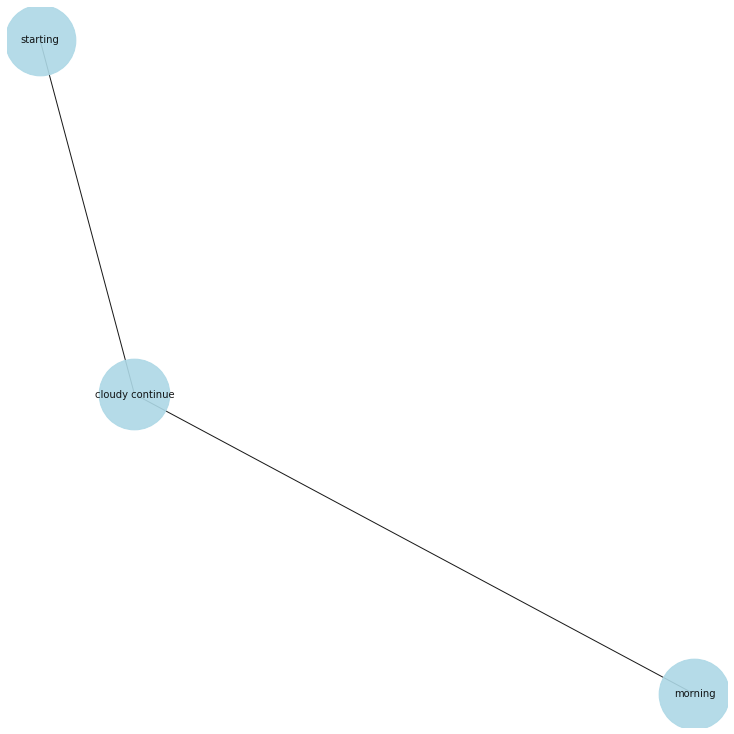

Partly cloudy in the afternoon.
Partly -> advmod
cloudy -> ROOT
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , afternoon


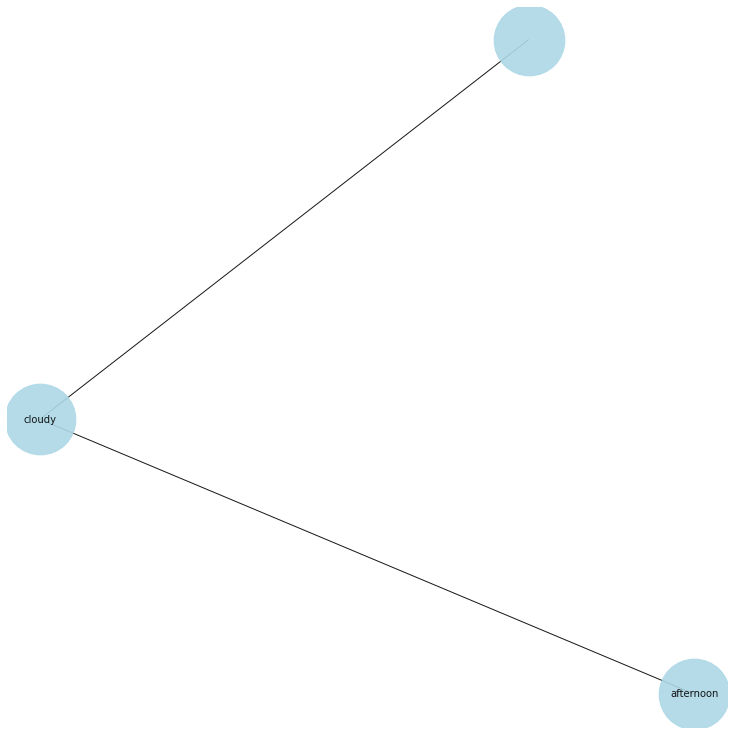

Foggy starting in the morning continuing until evening.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Foggy , continue , morning evening


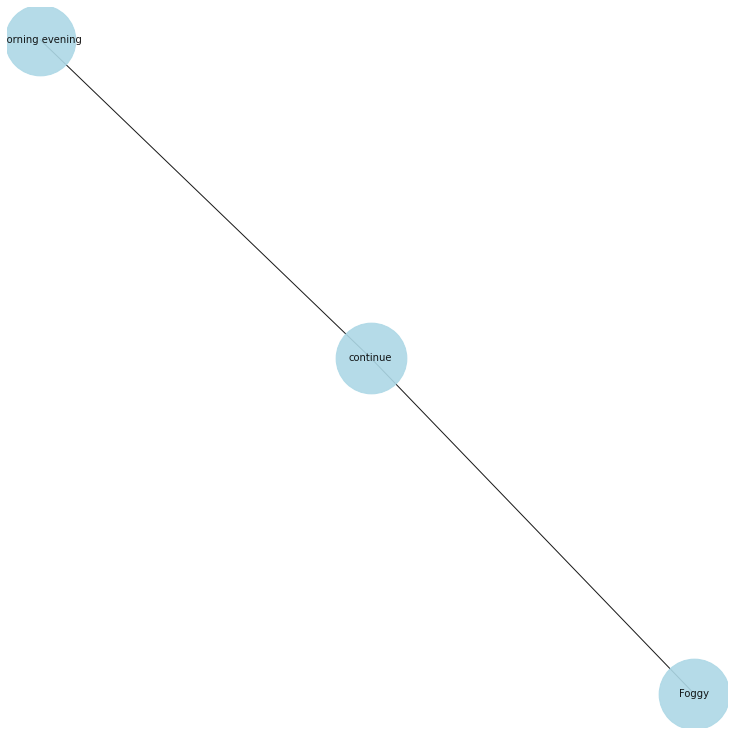

Foggy in the evening.
Foggy -> ROOT
in -> prep
the -> det
evening -> pobj
. -> punct
 , Foggy , evening


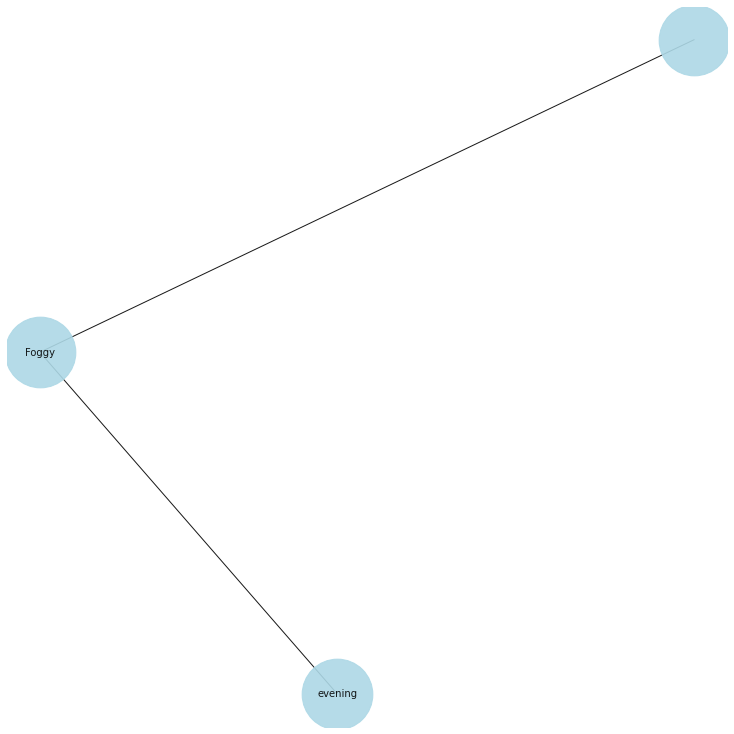

Partly cloudy throughout the day and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy , day morning afternoon


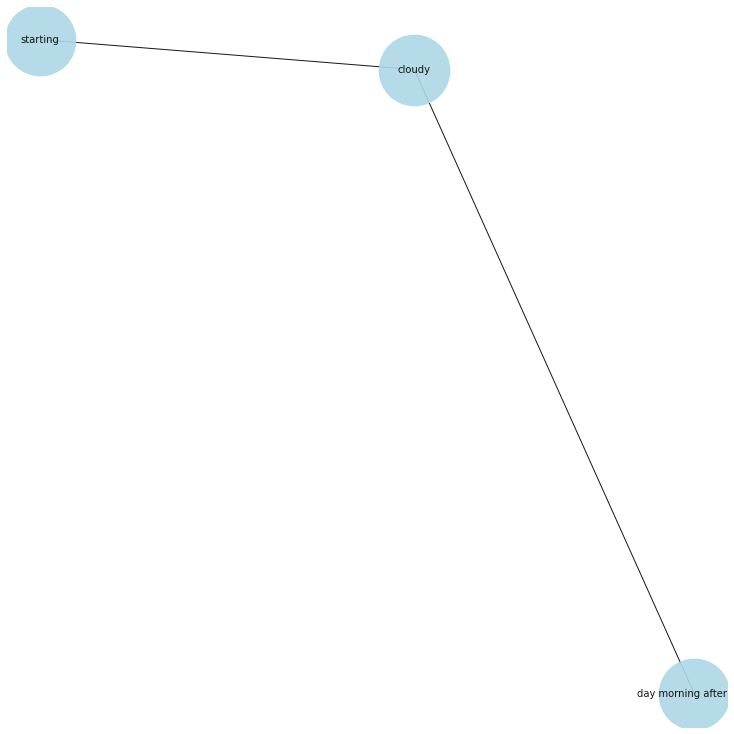

Foggy until evening.
Foggy -> ROOT
until -> prep
evening -> pobj
. -> punct
 , Foggy , evening


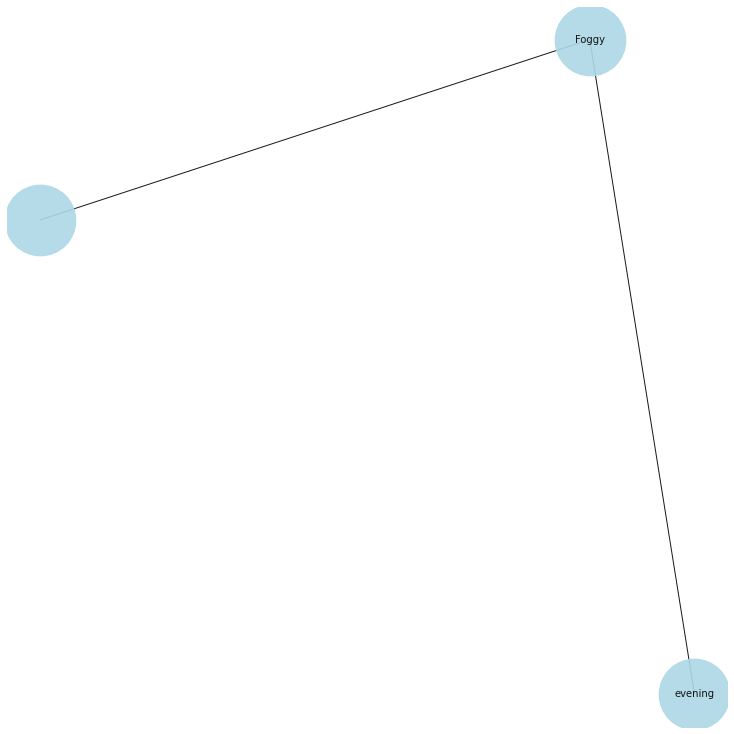

Partly cloudy in the evening.
Partly -> advmod
cloudy -> ROOT
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , evening


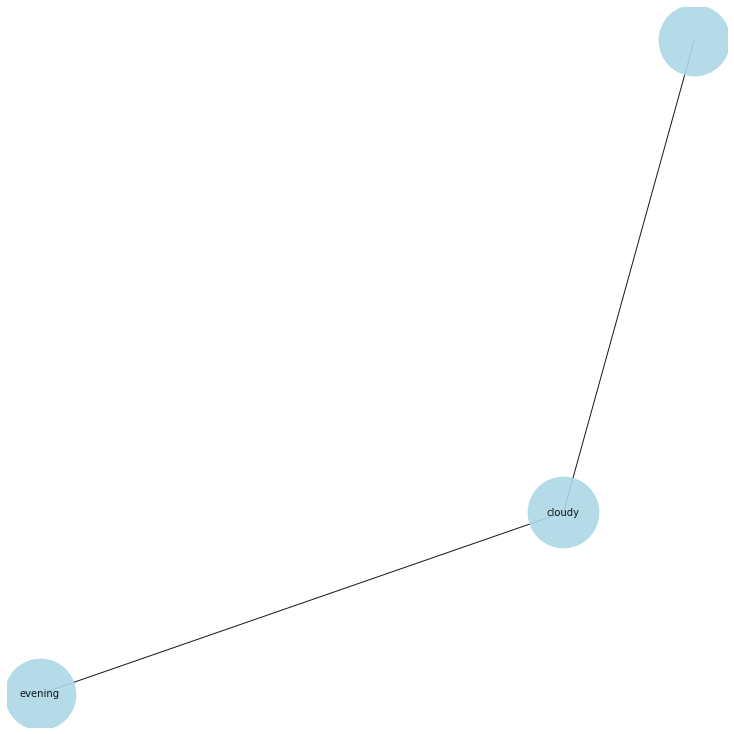

Mostly cloudy starting overnight continuing until evening.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , evening


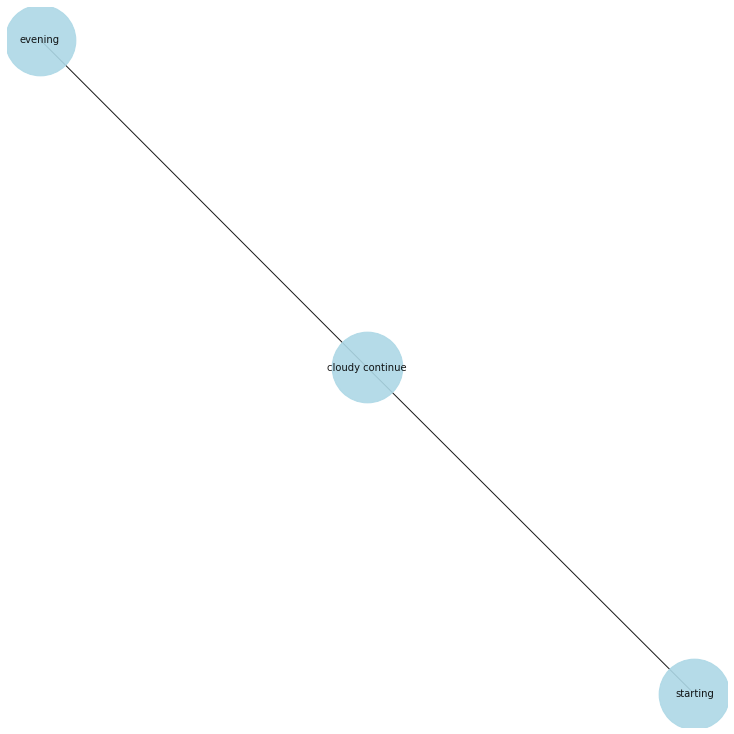

Mostly cloudy throughout the day and breezy in the afternoon.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , day afternoon


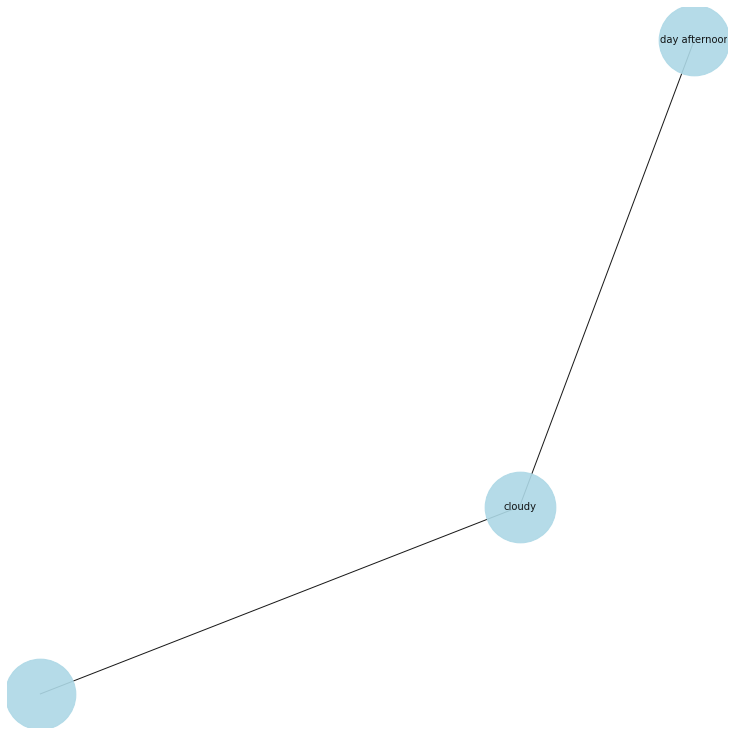

Partly cloudy starting overnight continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , afternoon


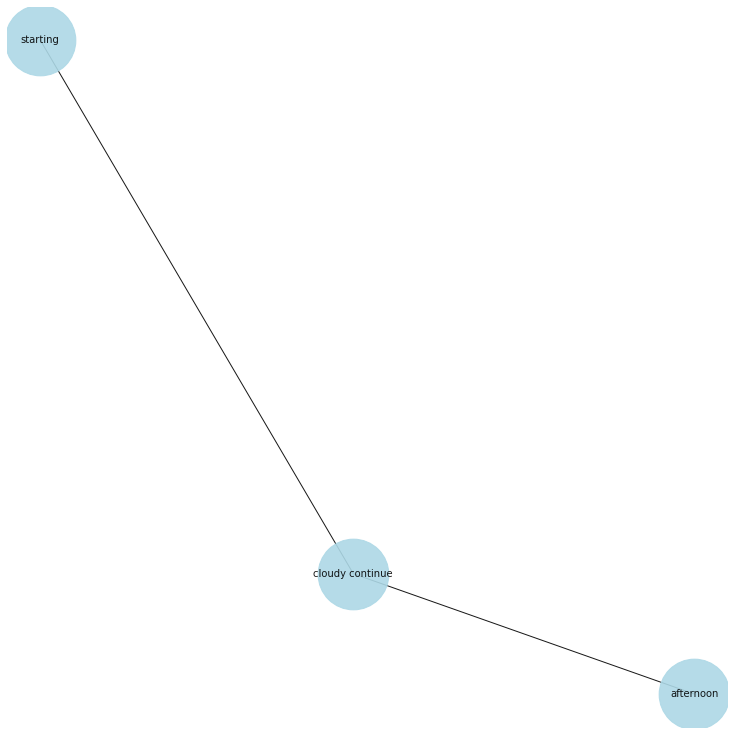

Mostly cloudy starting in the morning continuing until night.
Mostly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
starting , continue , morning night


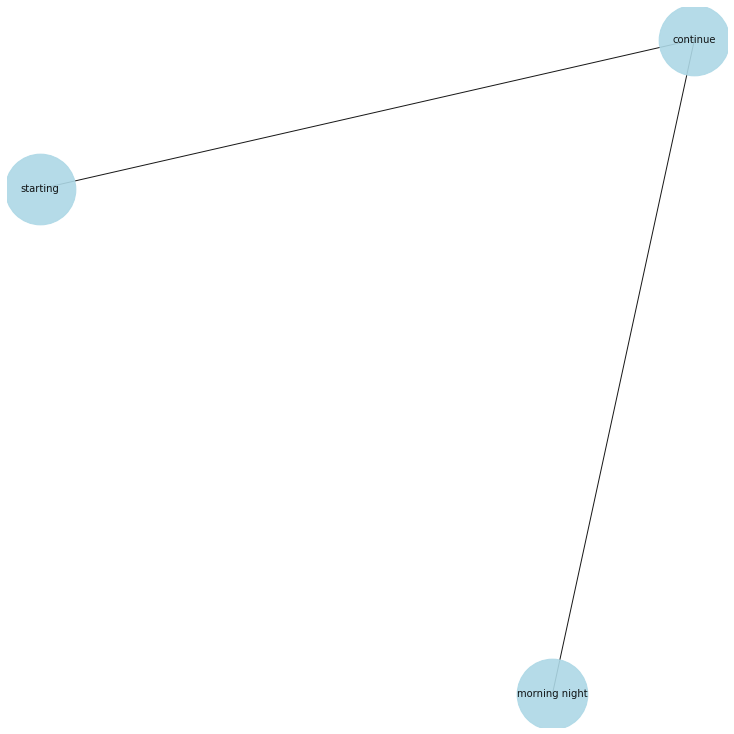

Partly cloudy until afternoon.
Partly -> advmod
cloudy -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , cloudy , afternoon


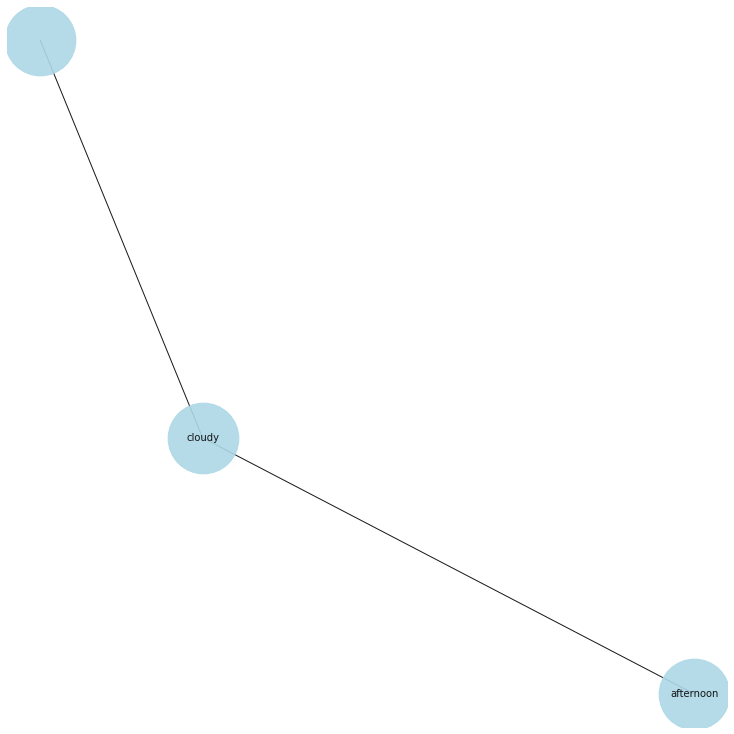

Foggy starting overnight continuing until night.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
night -> pobj
. -> punct
 , Foggy , night


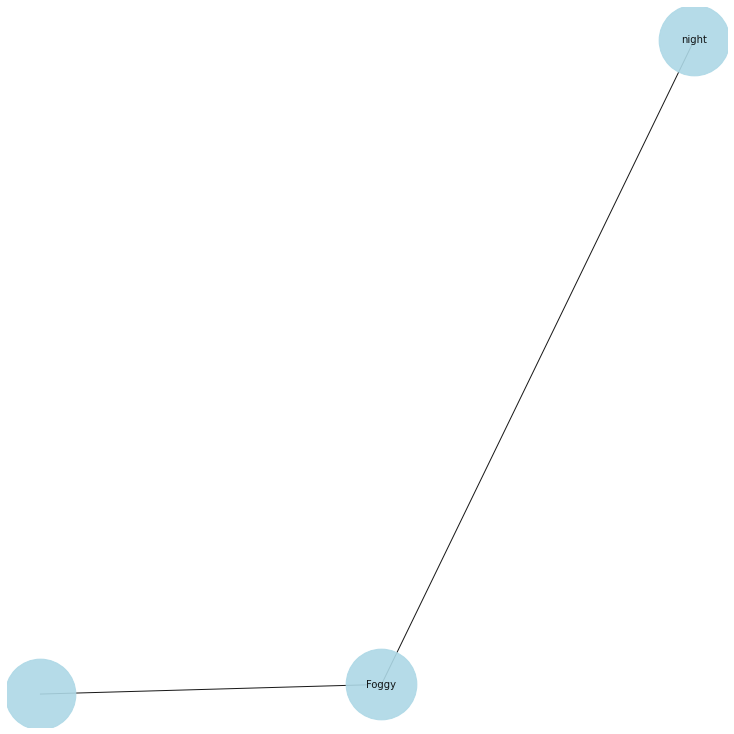

Mostly cloudy until afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , cloudy , afternoon


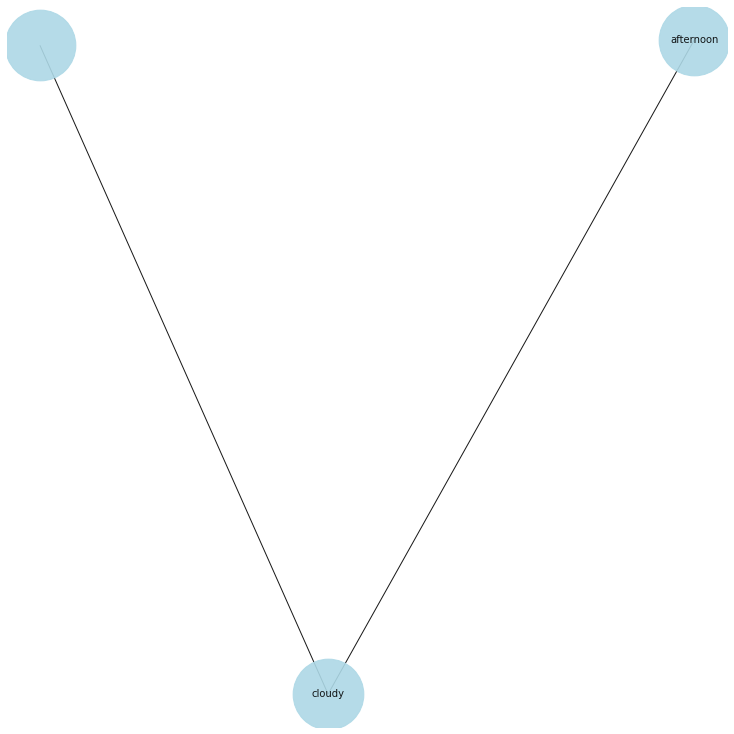

Overcast until night.
Overcast -> ROOT
until -> prep
night -> pobj
. -> punct
 , overcast , night


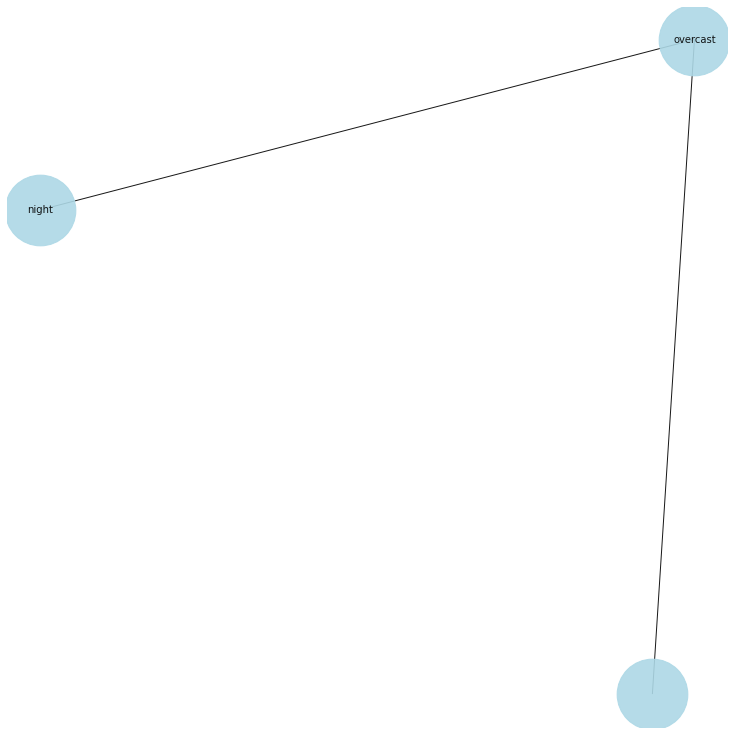

Foggy starting in the afternoon continuing until night.
Foggy -> ROOT
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> acl
until -> prep
night -> pobj
. -> punct
 , Foggy , afternoon night


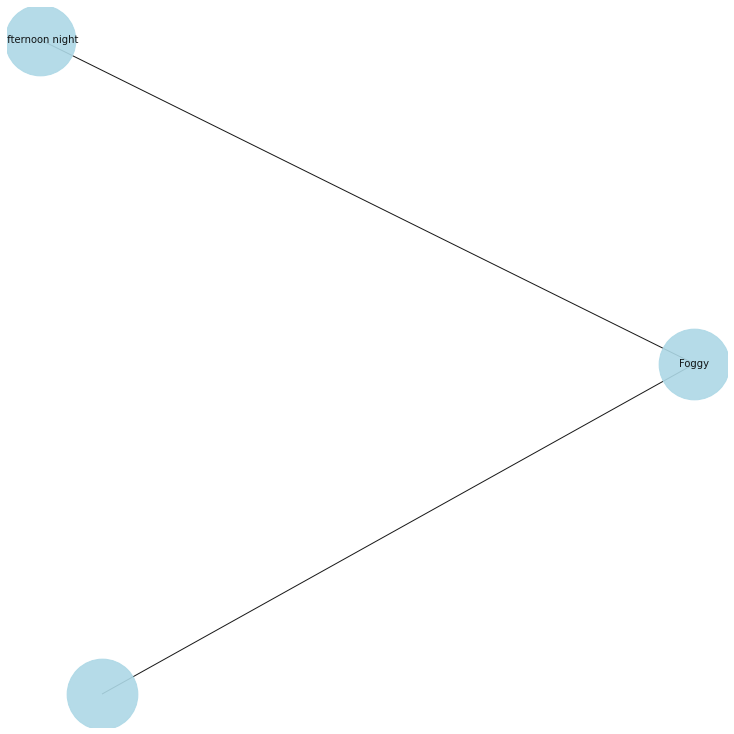

Mostly cloudy until morning.
Mostly -> advmod
cloudy -> ROOT
until -> prep
morning -> pobj
. -> punct
 , cloudy , morning


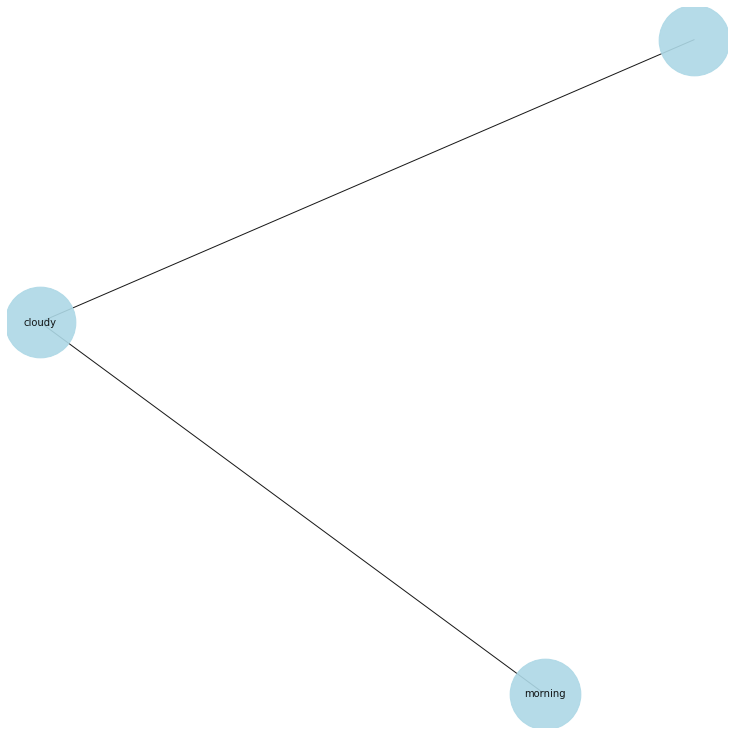

Mostly cloudy throughout the day and breezy starting overnight continuing until morning.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
 , cloudy , day morning


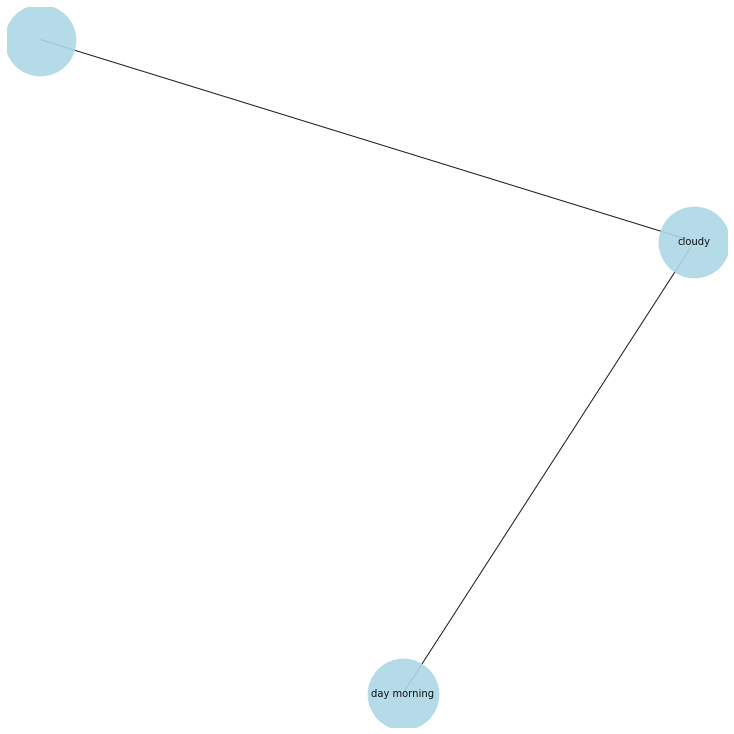

Foggy starting in the evening continuing until night.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
evening -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Foggy , continue , evening night


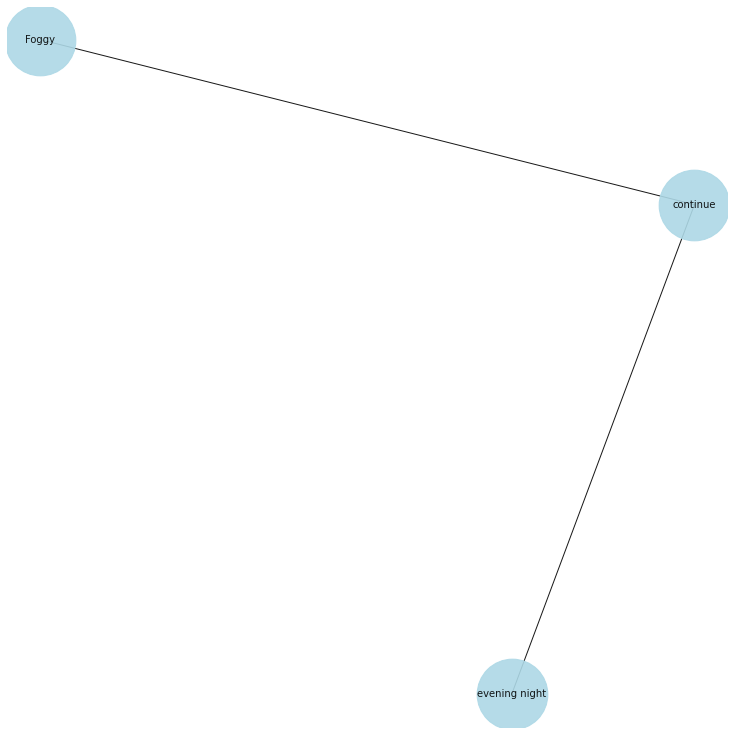

Mostly cloudy throughout the day and breezy starting in the evening.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , day evening


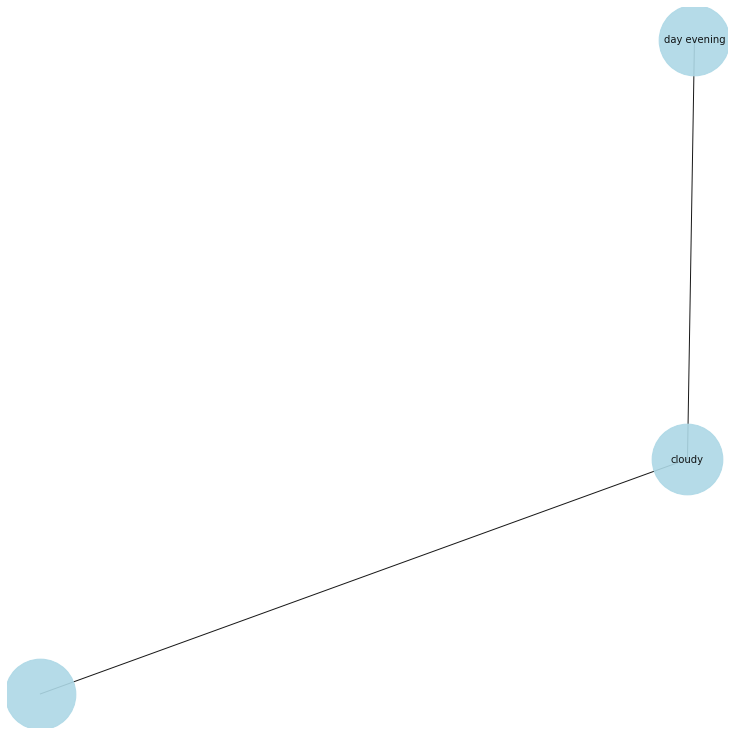

Mostly cloudy throughout the day and breezy starting in the afternoon continuing until evening.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
 , cloudy , day afternoon evening


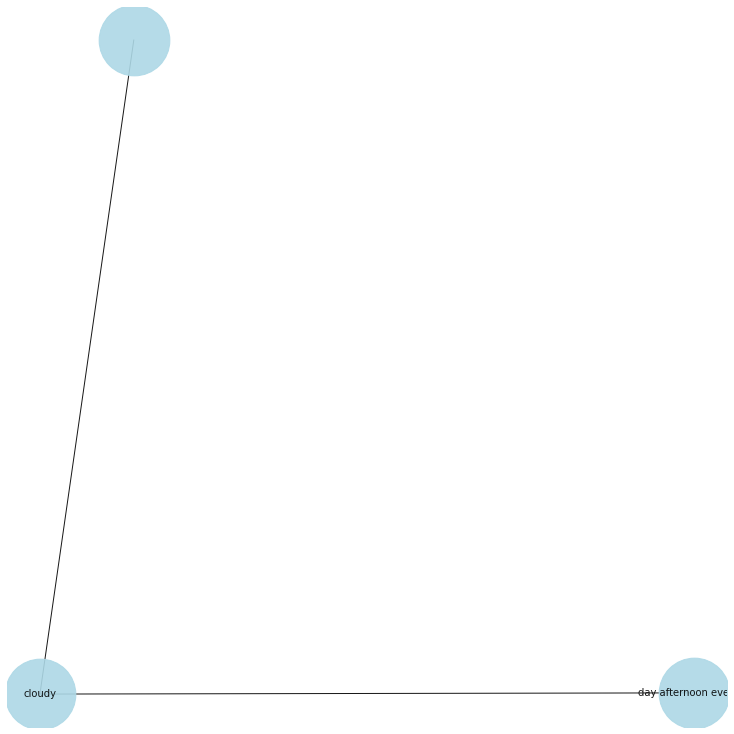

Mostly cloudy until evening and breezy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy , evening morning afternoon


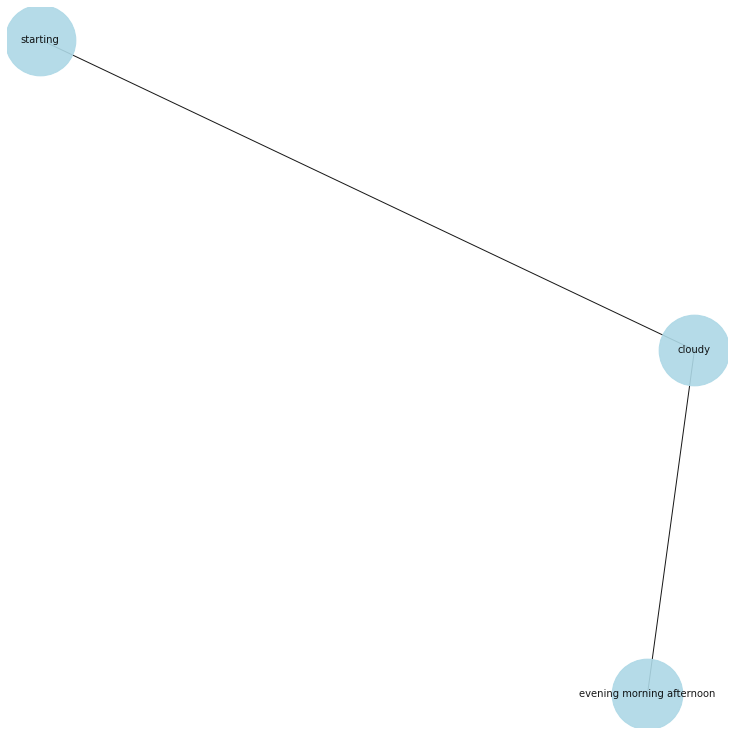

Foggy starting overnight.
Foggy -> nsubj
starting -> ROOT
overnight -> advmod
. -> punct
Foggy , start , 


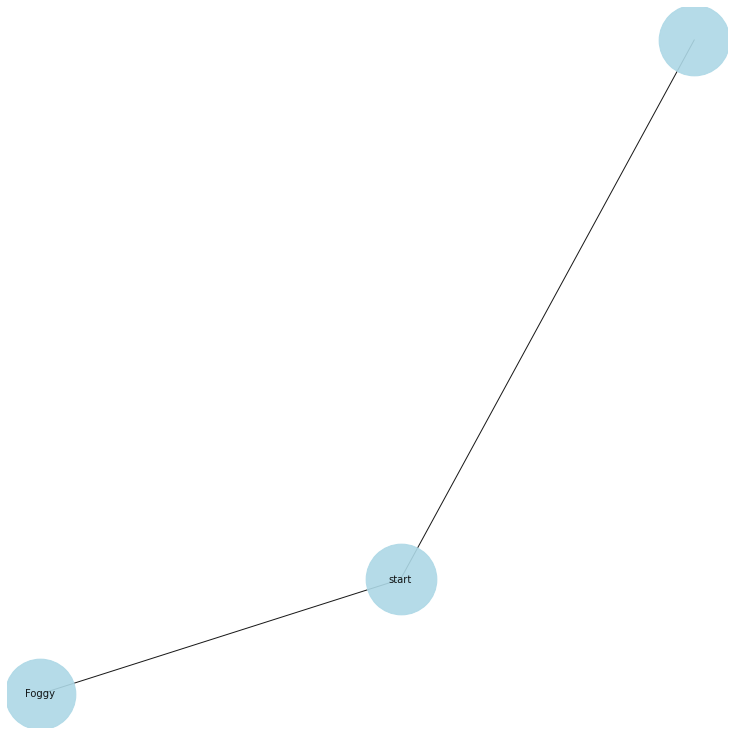

Foggy starting in the morning.
Foggy -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
. -> punct
 , Foggy , morning


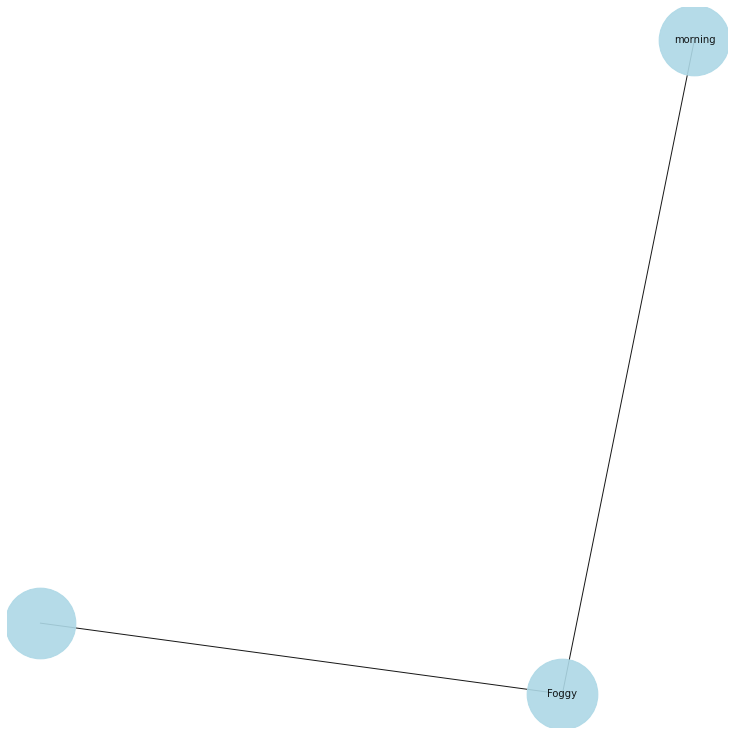

Partly cloudy until night and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy , night morning afternoon


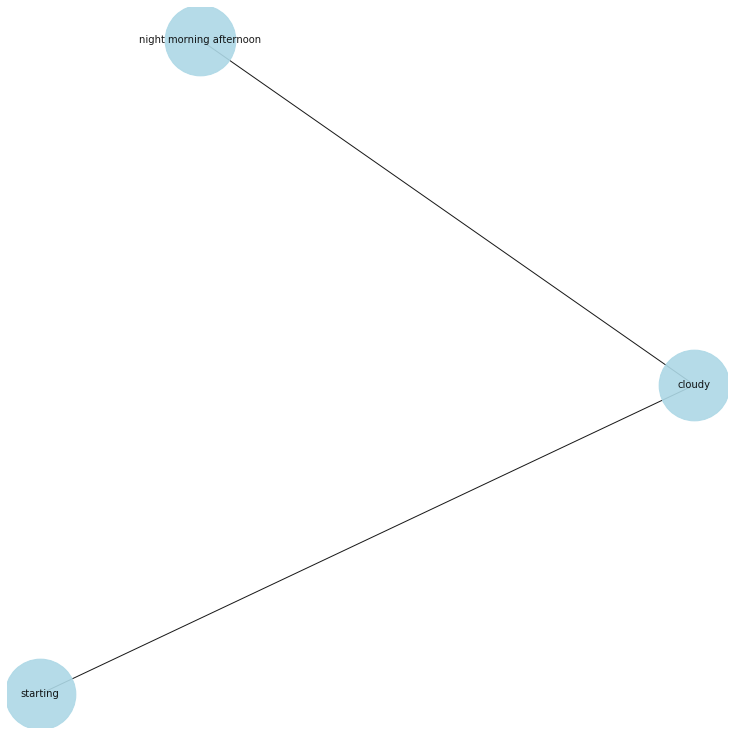

Foggy in the afternoon.
Foggy -> ROOT
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , Foggy , afternoon


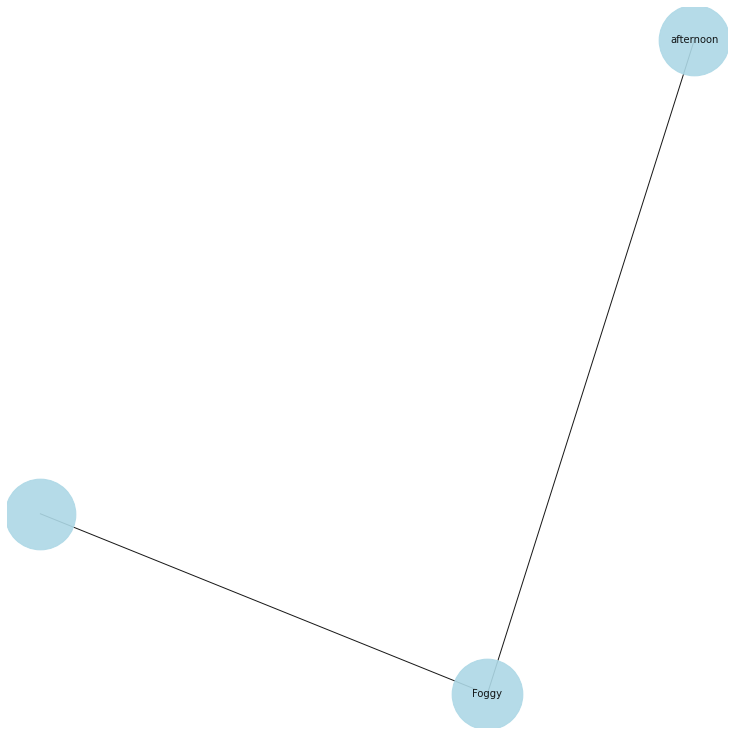

Mostly cloudy throughout the day and breezy starting in the morning continuing until evening.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy , day morning evening


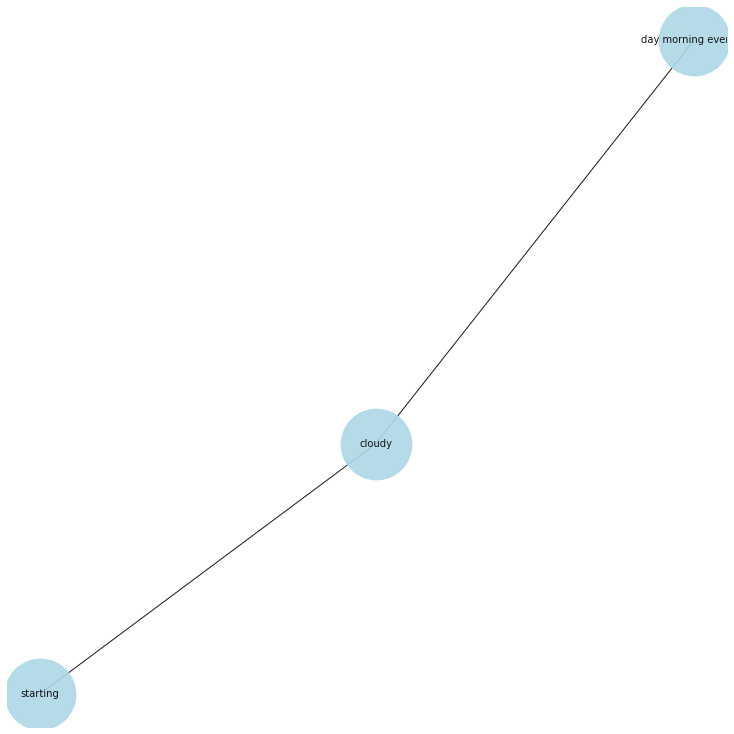

Partly cloudy until evening and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> nsubj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> pcomp
until -> prep
afternoon -> pobj
. -> punct
evening starting , cloudy , morning afternoon


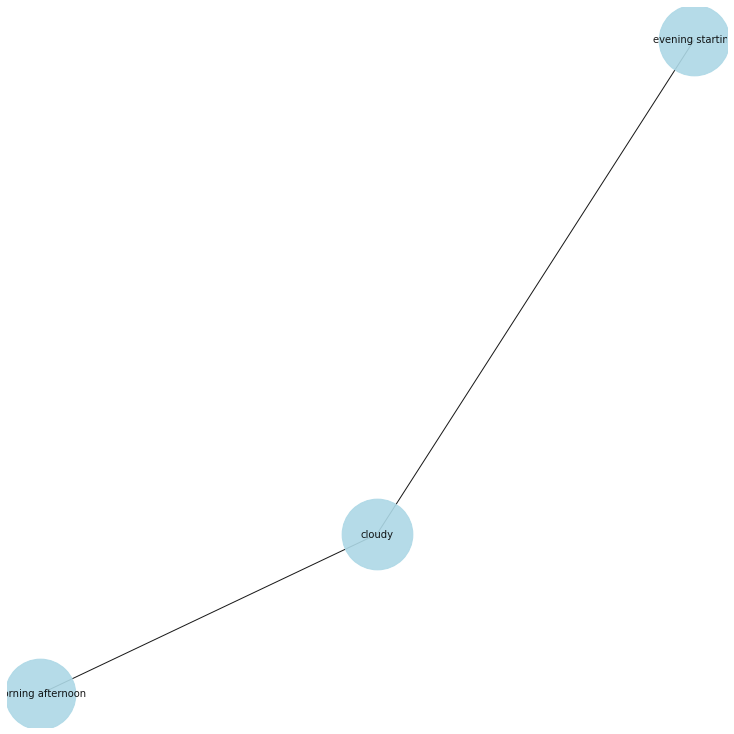

Overcast until evening.
Overcast -> ROOT
until -> prep
evening -> pobj
. -> punct
 , overcast , evening


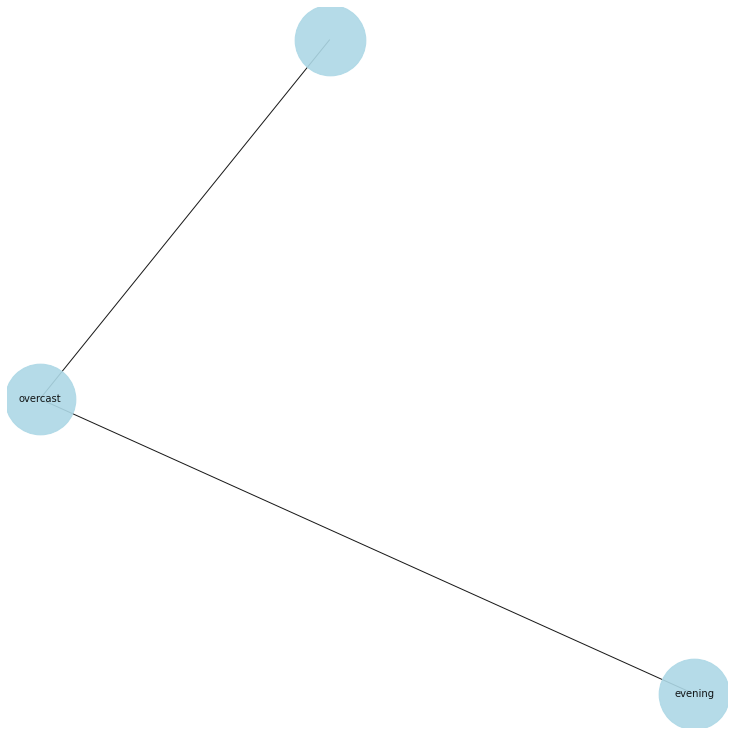

Mostly cloudy throughout the day and breezy overnight.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , cloudy , day


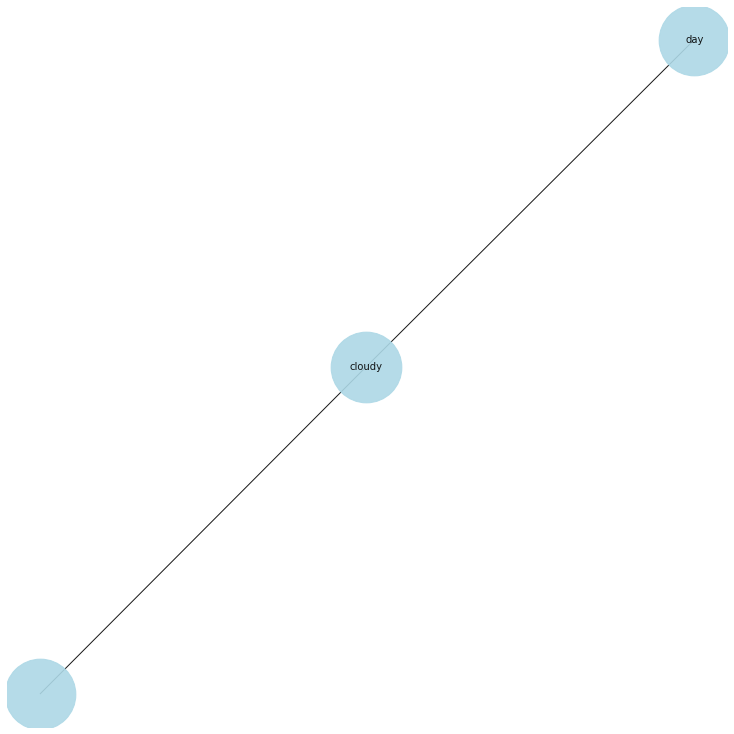

Partly cloudy until evening and breezy in the morning.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy , evening morning


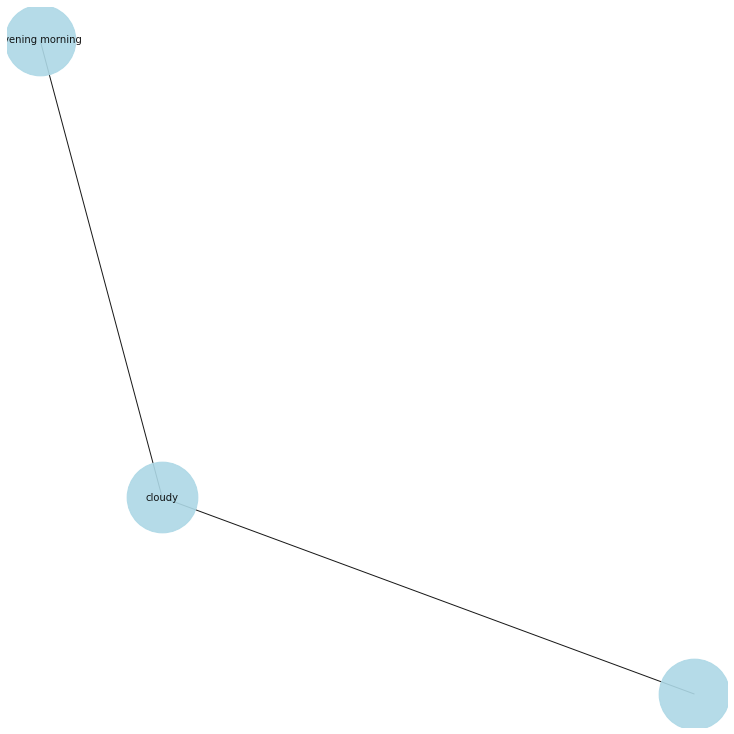

Partly cloudy throughout the day and breezy in the evening.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , day evening


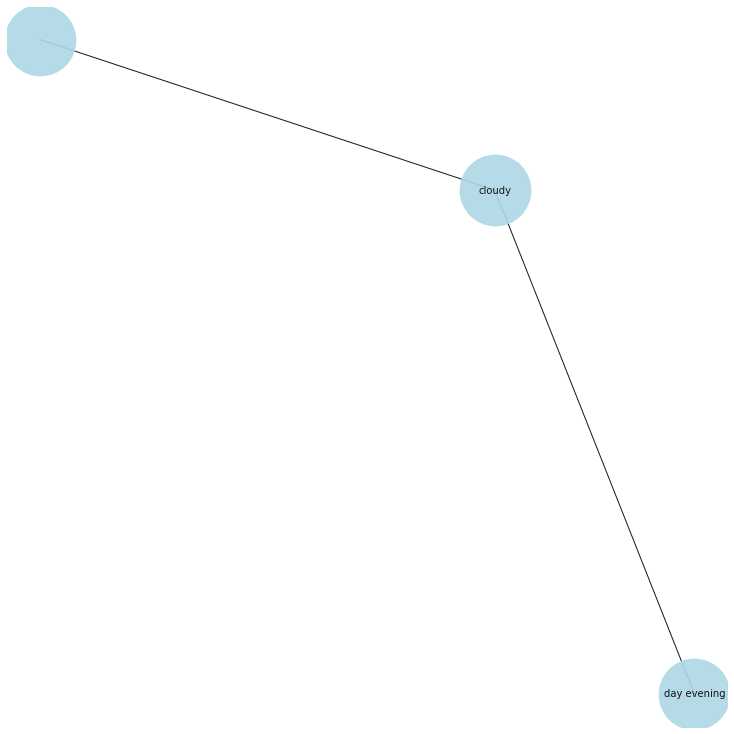

Mostly cloudy starting in the afternoon.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy starting , afternoon


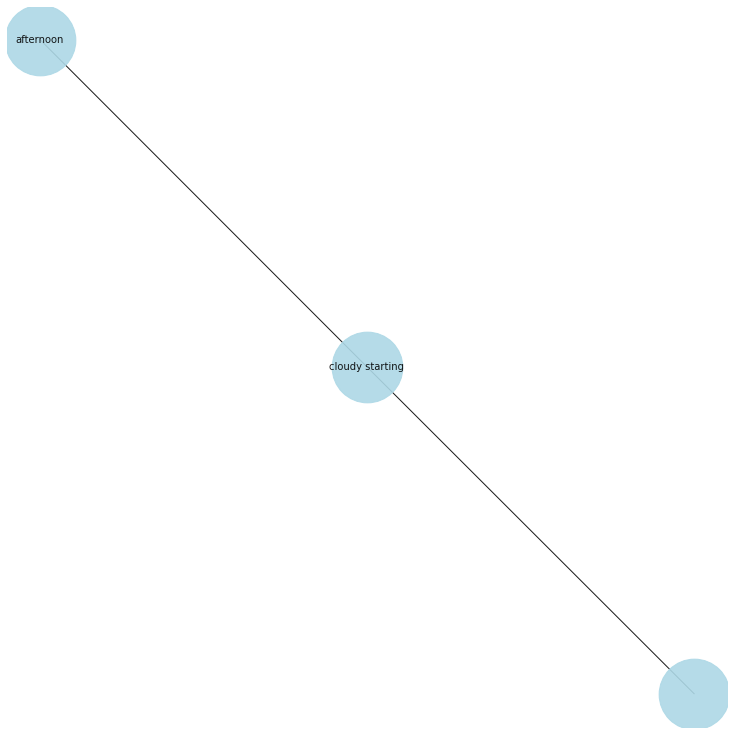

Partly cloudy starting in the evening.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy starting , evening


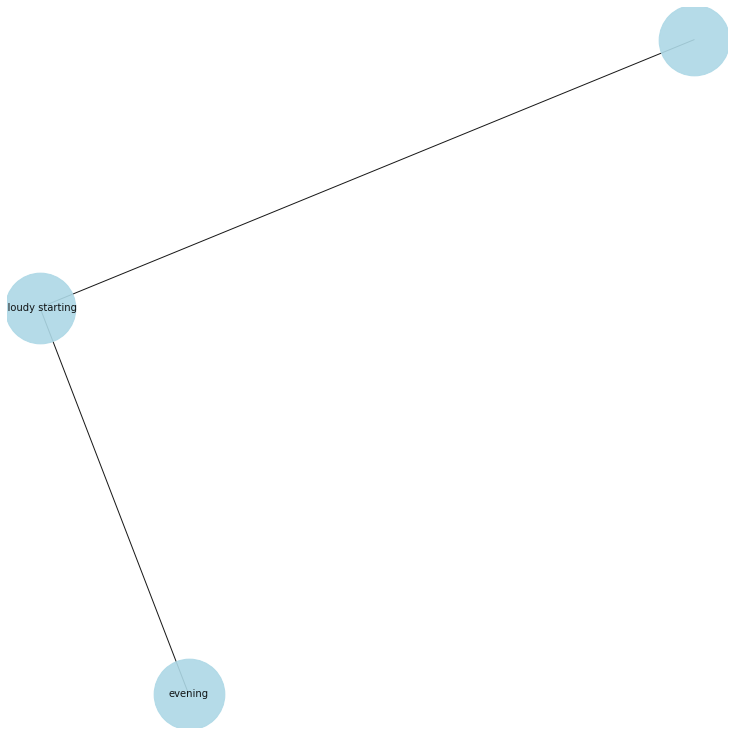

Mostly cloudy starting in the morning continuing until evening.
Mostly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
starting , continue , morning evening


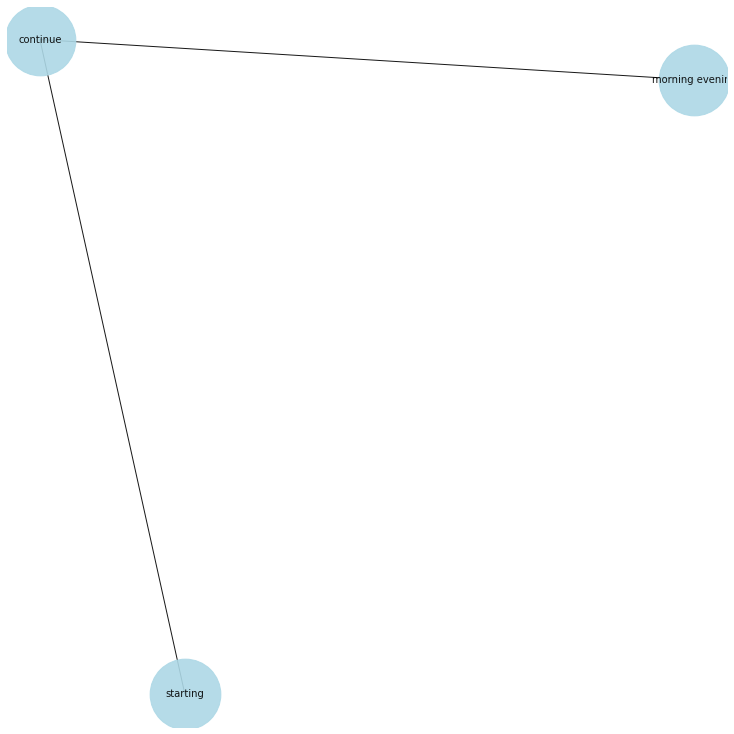

Mostly cloudy starting overnight continuing until afternoon.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , afternoon


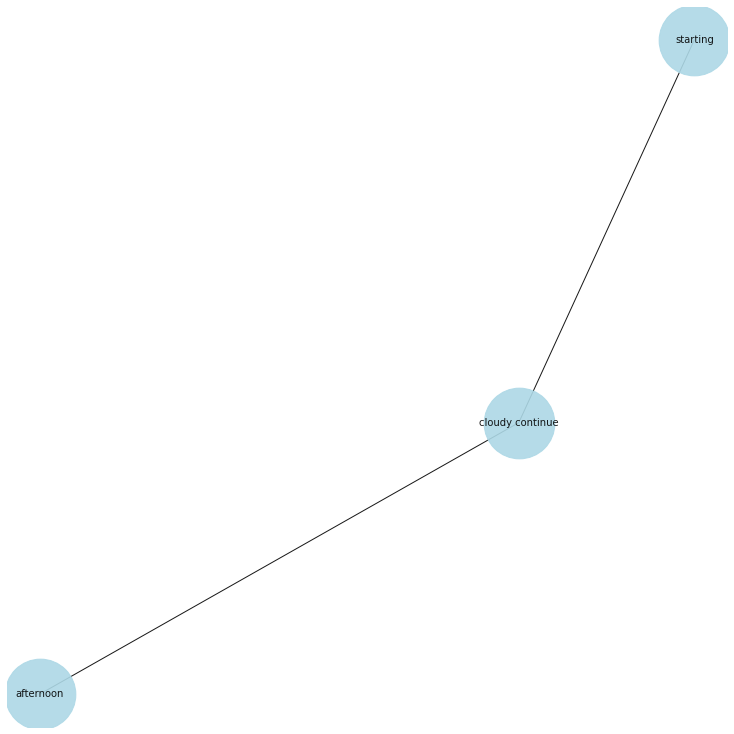

Partly cloudy throughout the day and breezy starting in the afternoon continuing until evening.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
 , cloudy , day afternoon evening


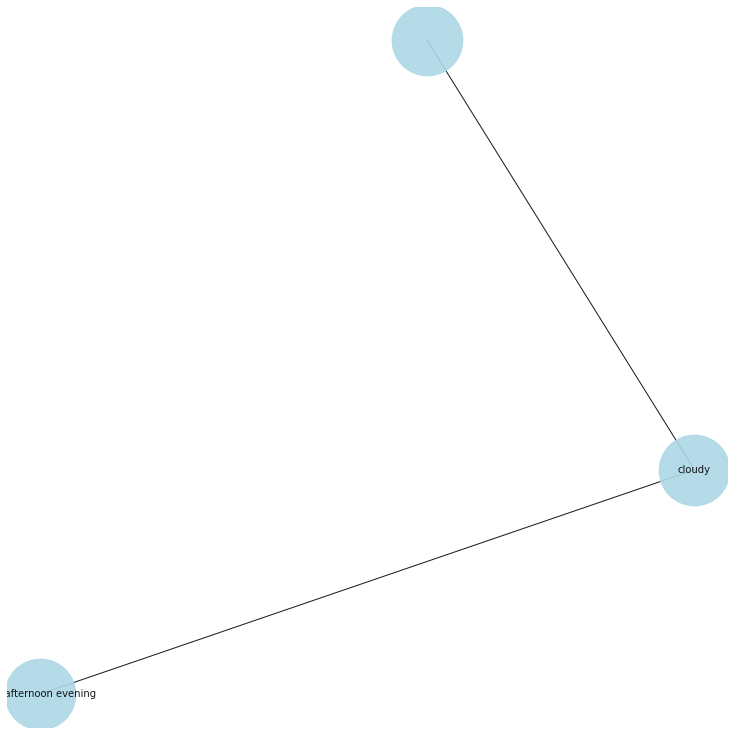

Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting starting , cloudy continue , evening morning afternoon


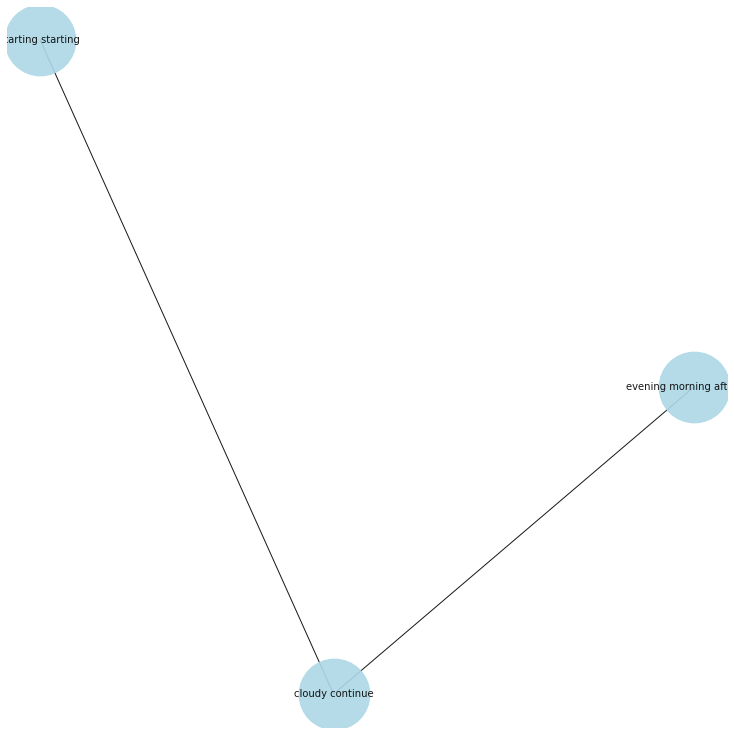

Mostly cloudy throughout the day and breezy in the evening.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , day evening


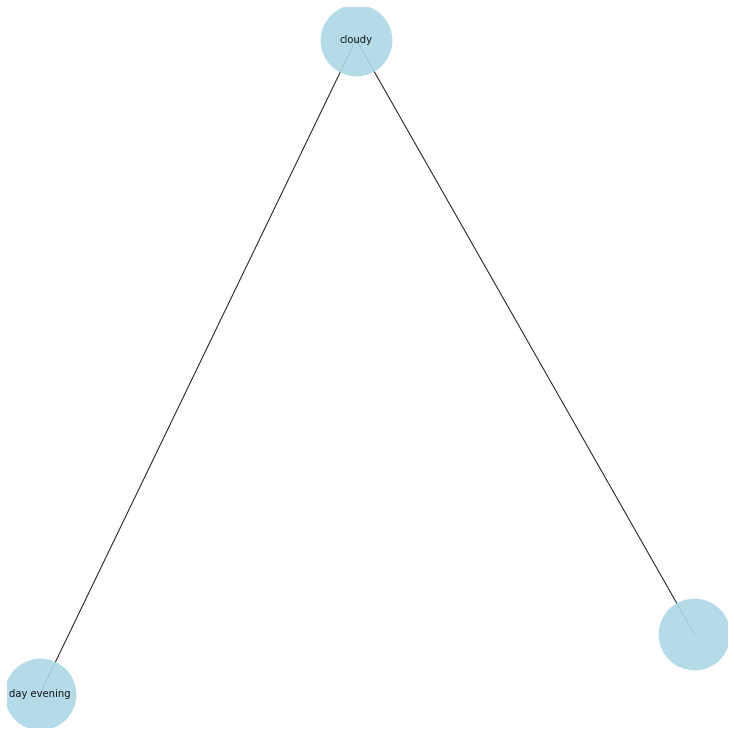

Overcast throughout the day and breezy in the morning.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , overcast , day morning


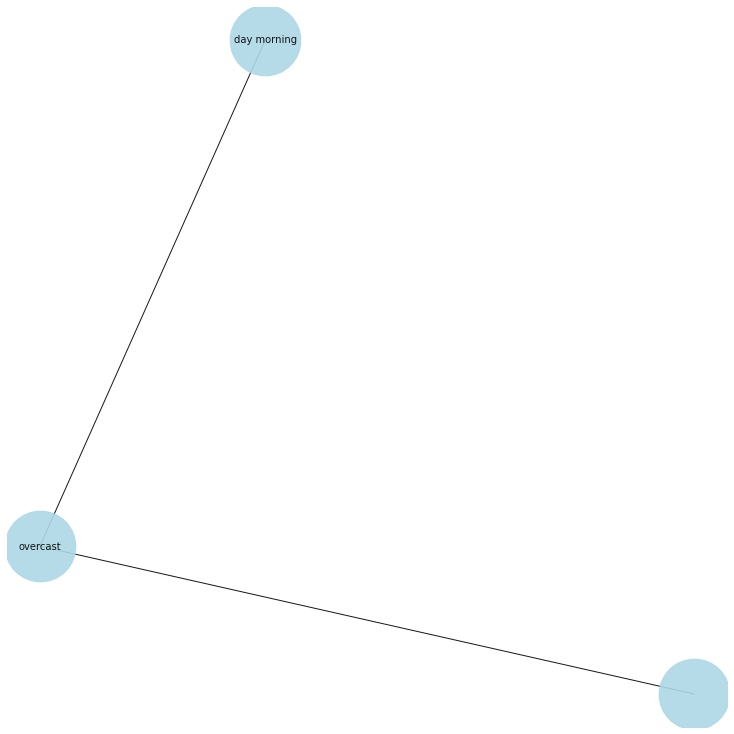

Mostly cloudy until night and breezy in the afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , night afternoon


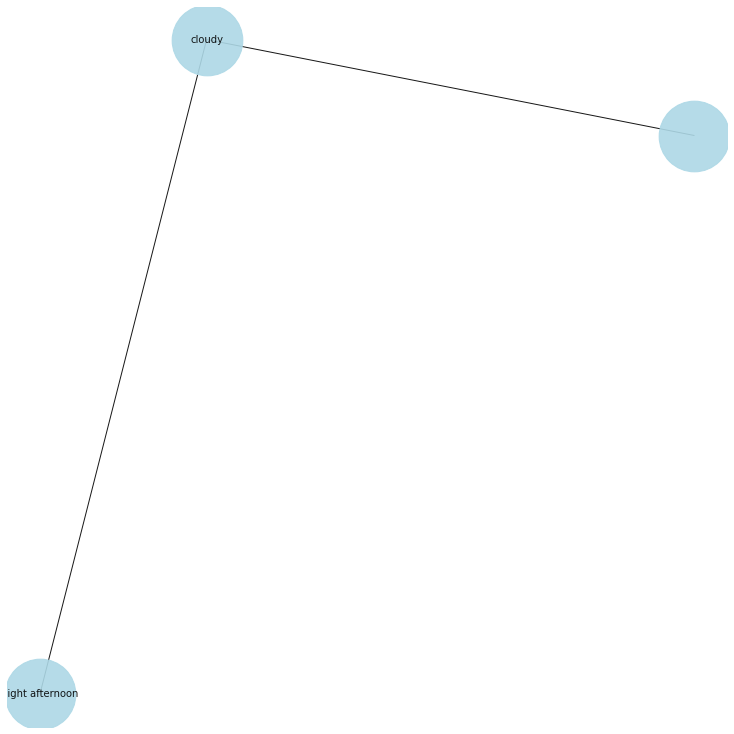

Breezy overnight and mostly cloudy throughout the day.
Breezy -> nsubj
overnight -> advmod
and -> cc
mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
Breezy , cloudy , day


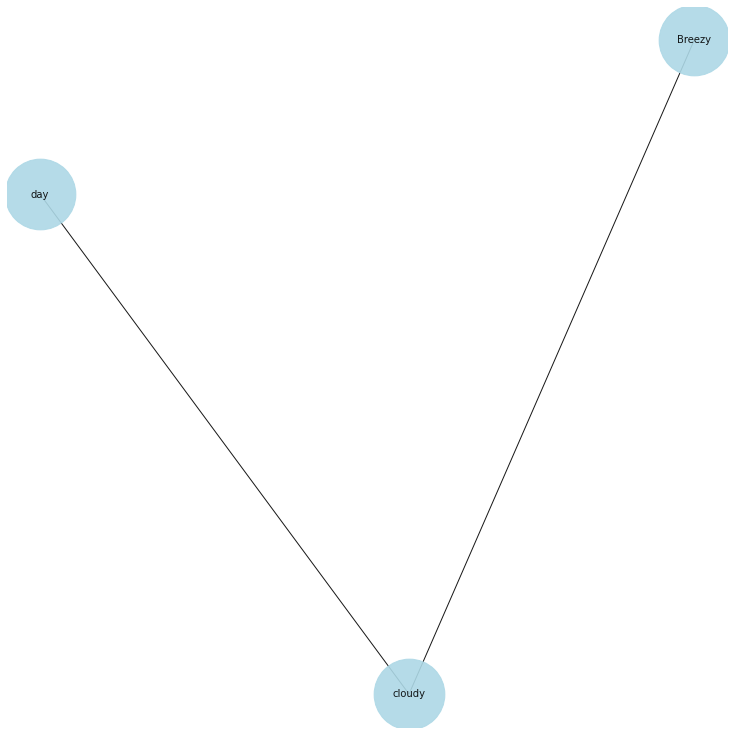

Mostly cloudy starting overnight and breezy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , morning afternoon


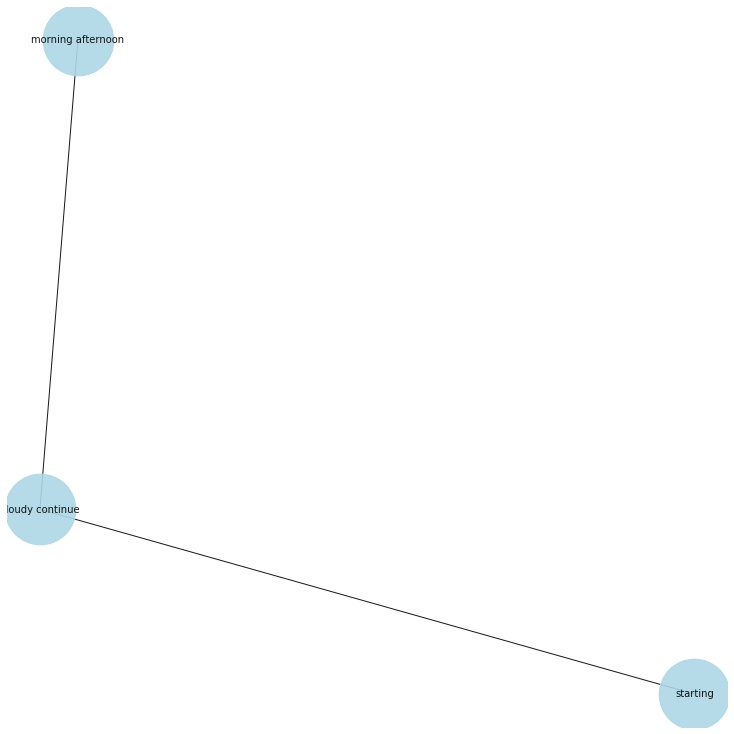

Partly cloudy until night and breezy in the morning.
Partly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy , night morning


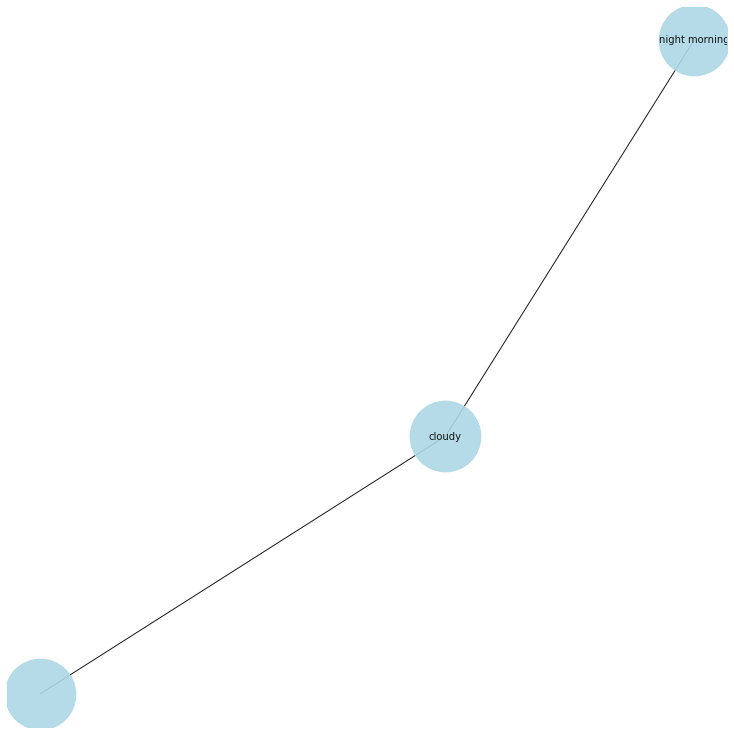

Mostly cloudy starting in the morning and breezy in the afternoon.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy starting , morning afternoon


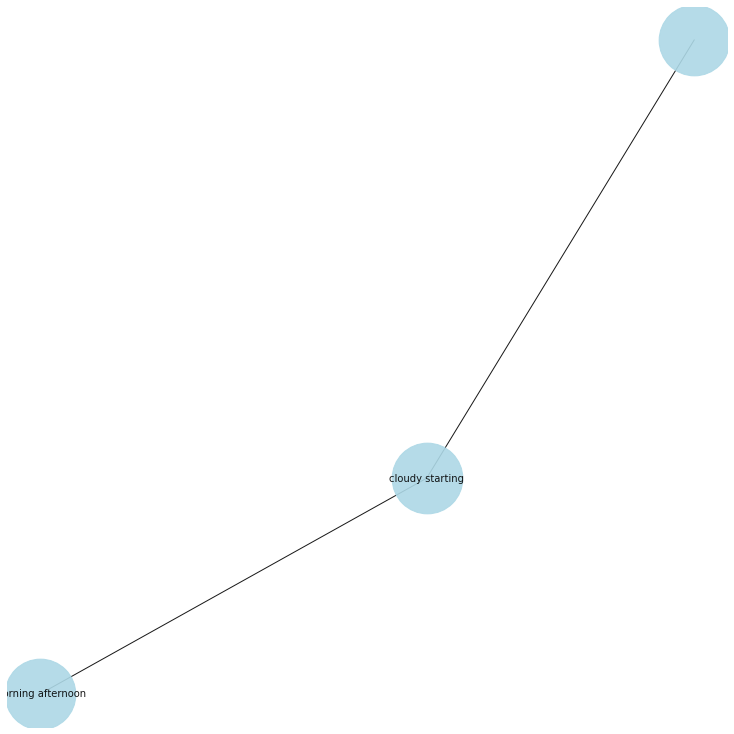

Mostly cloudy starting overnight and breezy in the morning.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy start , morning


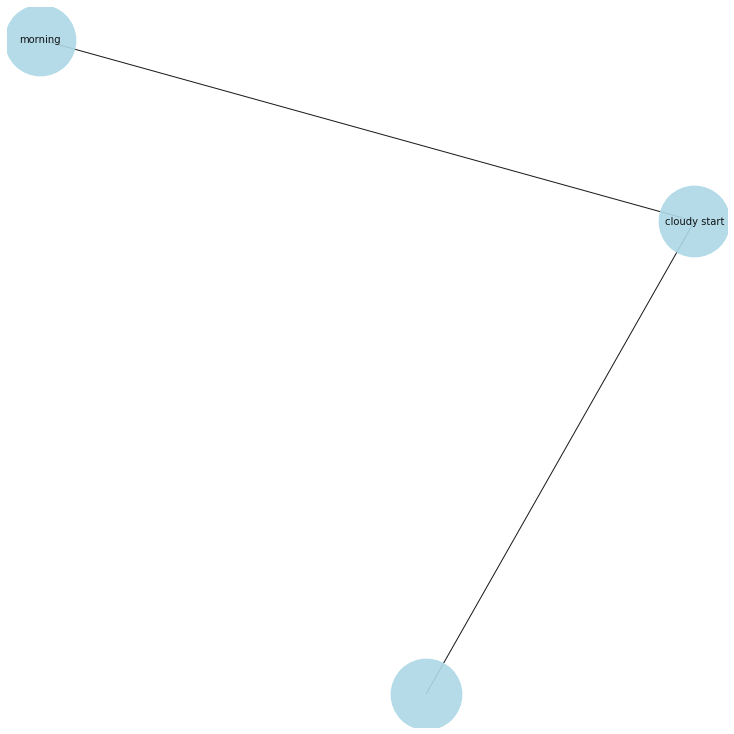

Overcast throughout the day and breezy in the evening.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , overcast , day evening


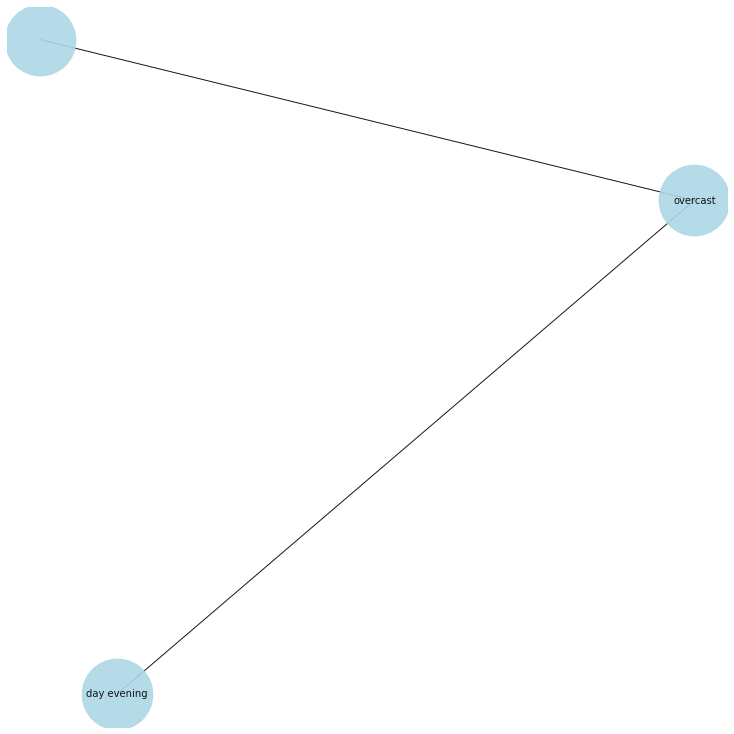

Breezy overnight and overcast throughout the day.
Breezy -> amod
overnight -> ROOT
and -> cc
overcast -> conj
throughout -> prep
the -> det
day -> pobj
. -> punct
 , breezy overnight , day


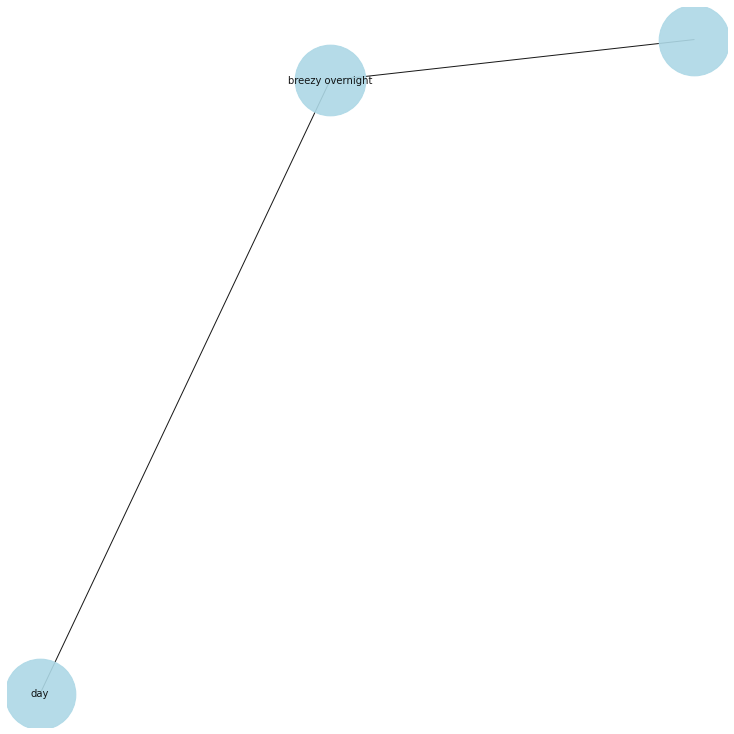

Mostly cloudy throughout the day and breezy starting in the morning continuing until night.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
starting , cloudy , day morning night


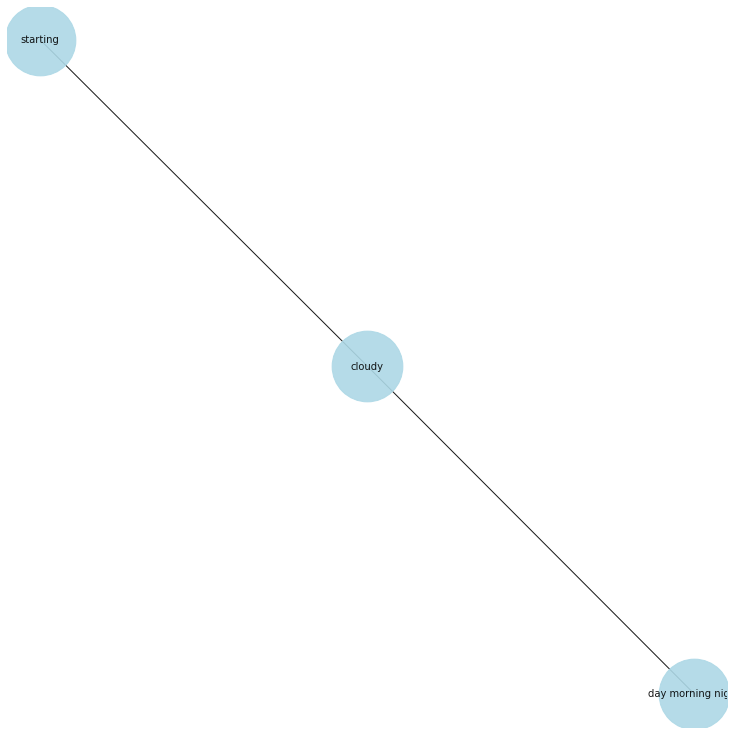

Overcast throughout the day and breezy starting in the evening.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , overcast , day evening


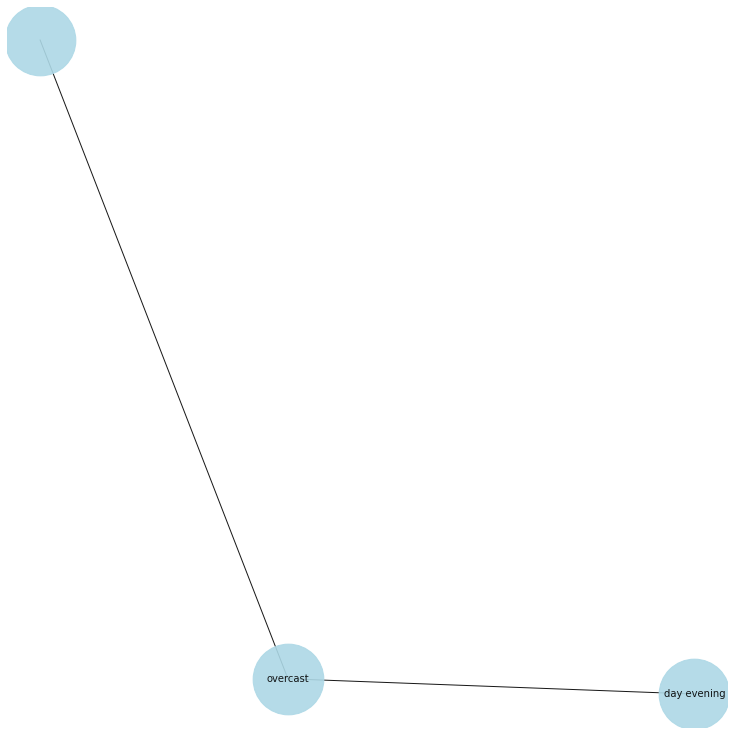

Partly cloudy throughout the day and breezy in the morning.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , cloudy , day morning


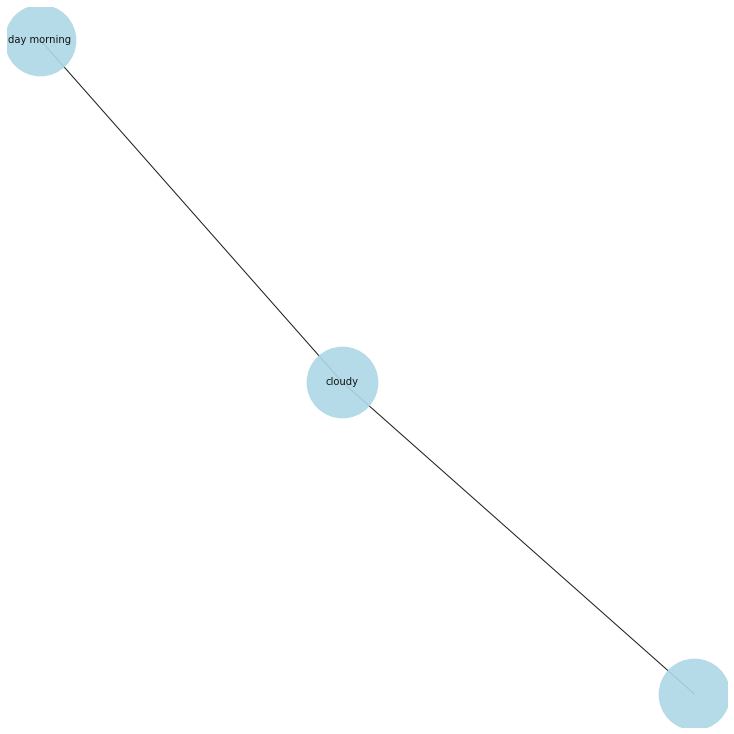

Breezy until afternoon and mostly cloudy throughout the day.
Breezy -> ROOT
until -> prep
afternoon -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
throughout -> prep
the -> det
day -> pobj
. -> punct
 , breezy , afternoon day


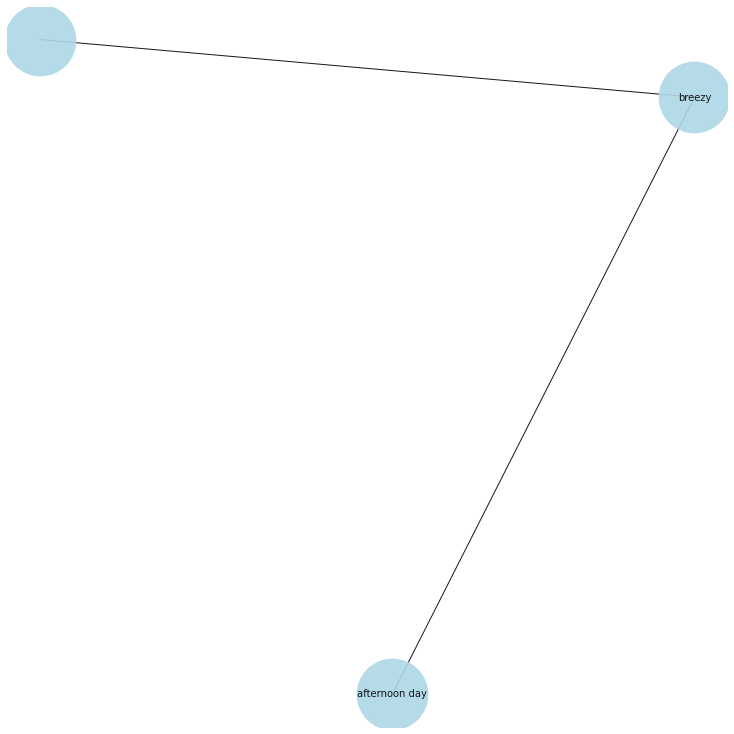

Partly cloudy starting in the morning continuing until evening and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting starting , cloudy continue , morning evening morning afternoon


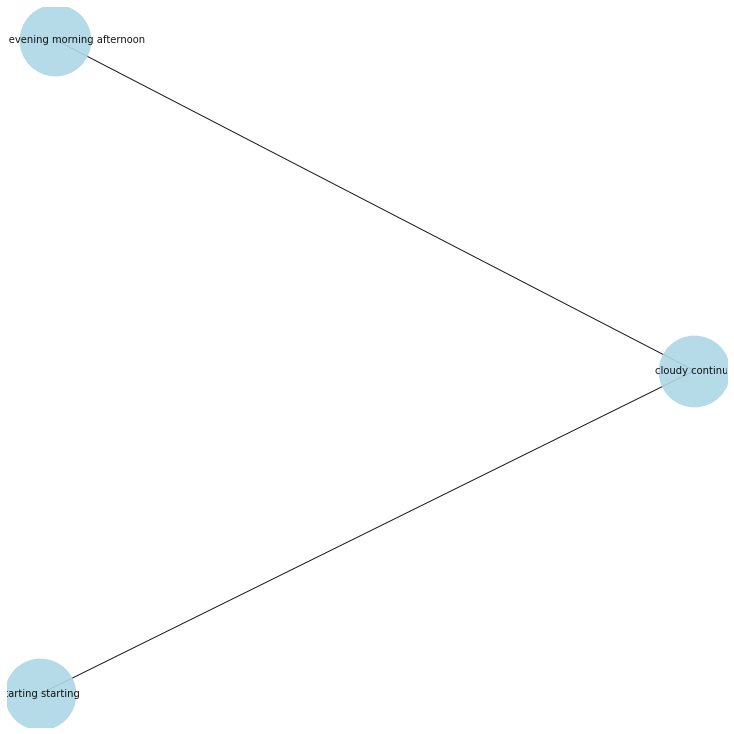

Mostly cloudy starting overnight and breezy in the afternoon.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy start , afternoon


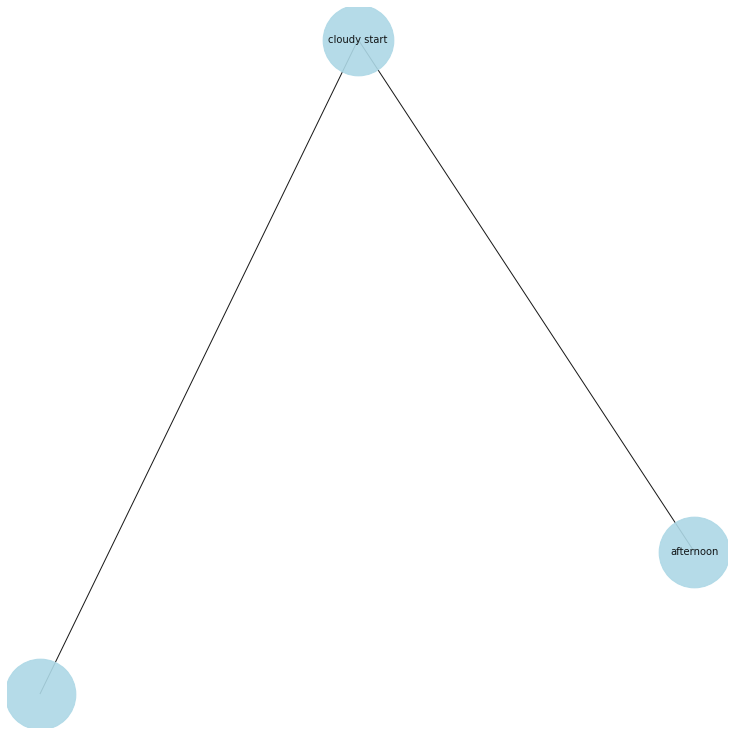

Breezy until morning and mostly cloudy throughout the day.
Breezy -> ROOT
until -> prep
morning -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
throughout -> prep
the -> det
day -> pobj
. -> punct
 , breezy , morning day


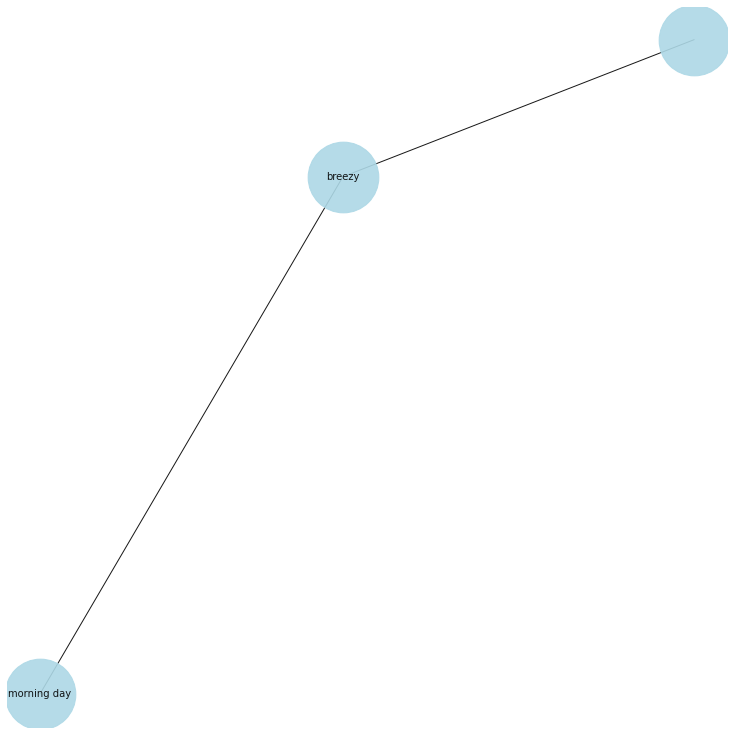

Partly cloudy starting in the evening continuing until night.
Partly -> advmod
cloudy -> advmod
starting -> nsubj
in -> prep
the -> det
evening -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
starting , continue , evening night


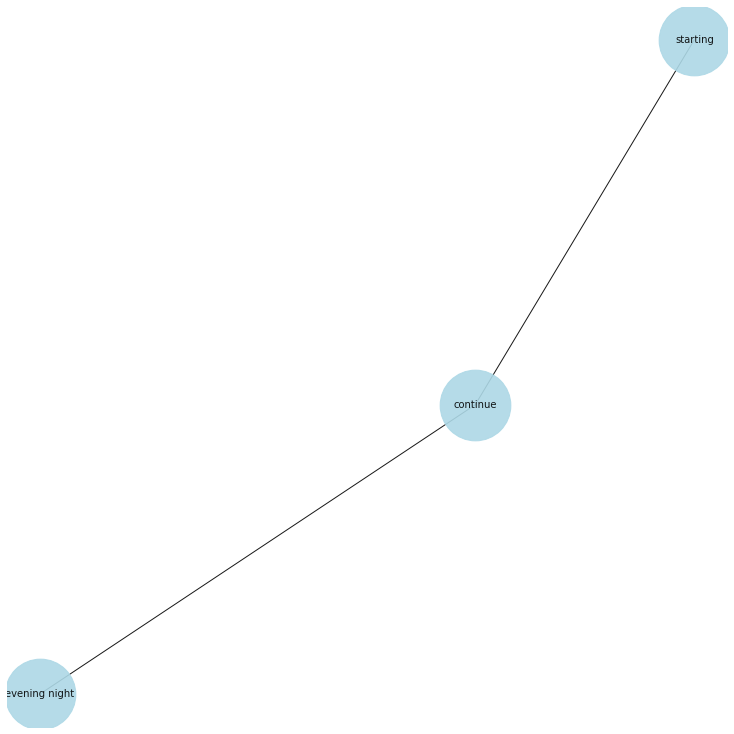

Mostly cloudy starting in the afternoon continuing until night.
Mostly -> advmod
cloudy -> nsubj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
cloudy , continue , afternoon night


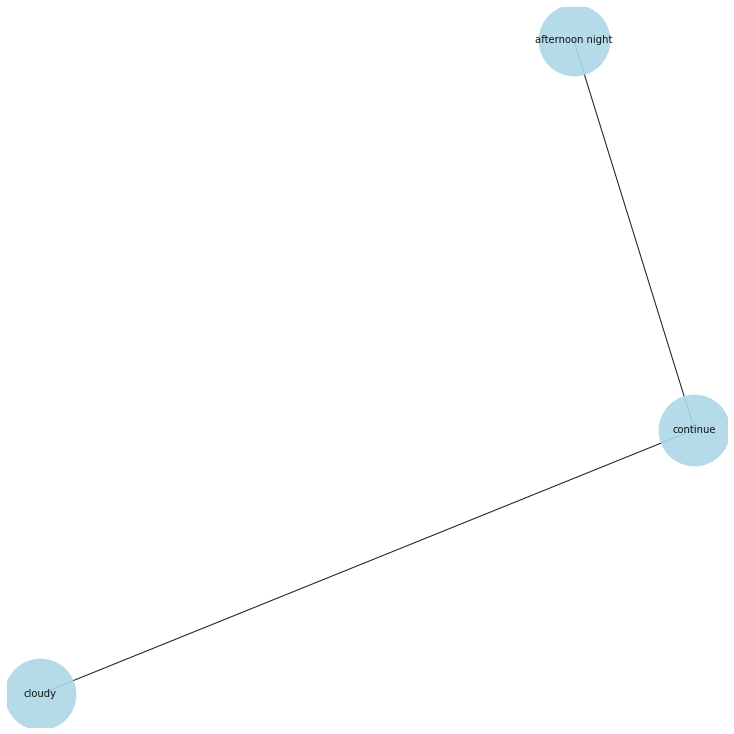

Mostly cloudy until night and breezy in the evening.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , night evening


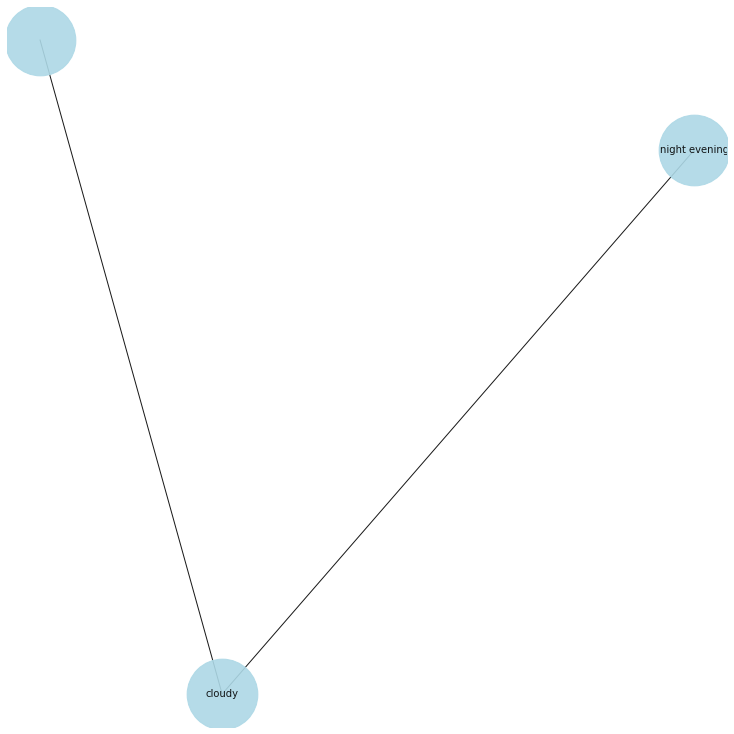

Partly cloudy until evening and breezy starting in the morning continuing until evening.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> nsubj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> pcomp
until -> prep
evening -> pobj
. -> punct
evening starting , cloudy , morning evening


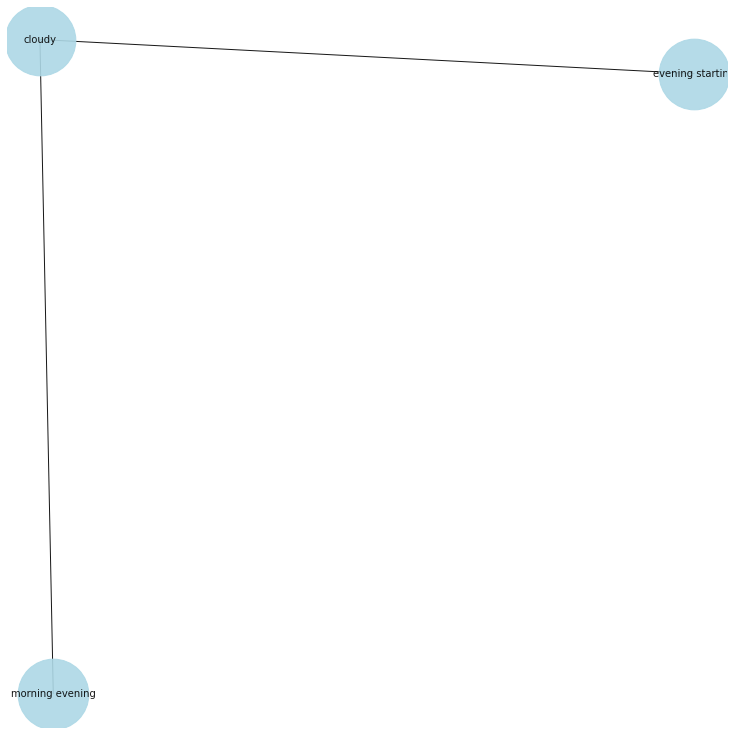

Mostly cloudy starting overnight continuing until morning.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
morning -> pobj
. -> punct
starting , cloudy continue , morning


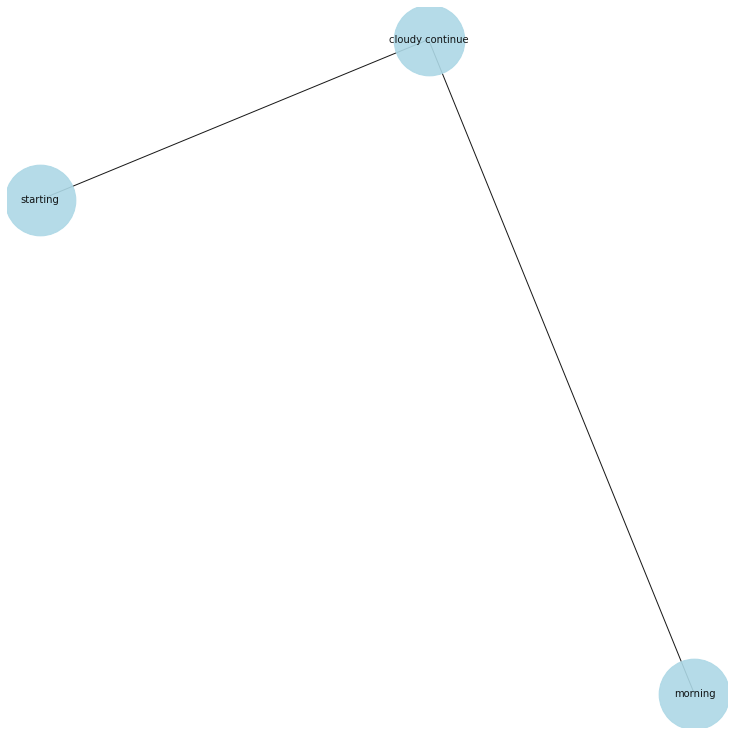

Foggy starting overnight continuing until morning and breezy starting in the evening.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , Foggy , morning evening


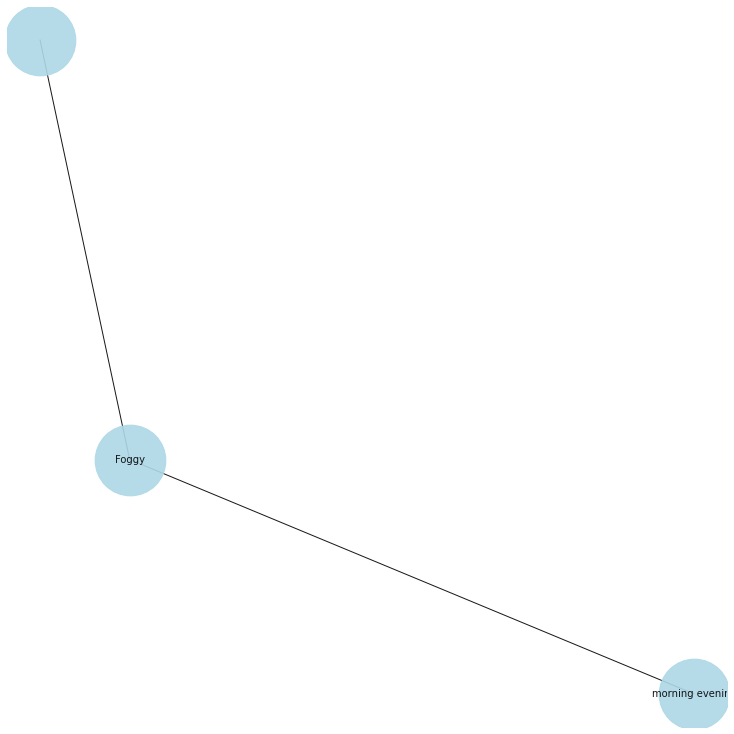

Foggy starting overnight continuing until morning and breezy starting in the morning continuing until afternoon.
Foggy -> nsubj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
Foggy , continue , morning morning afternoon


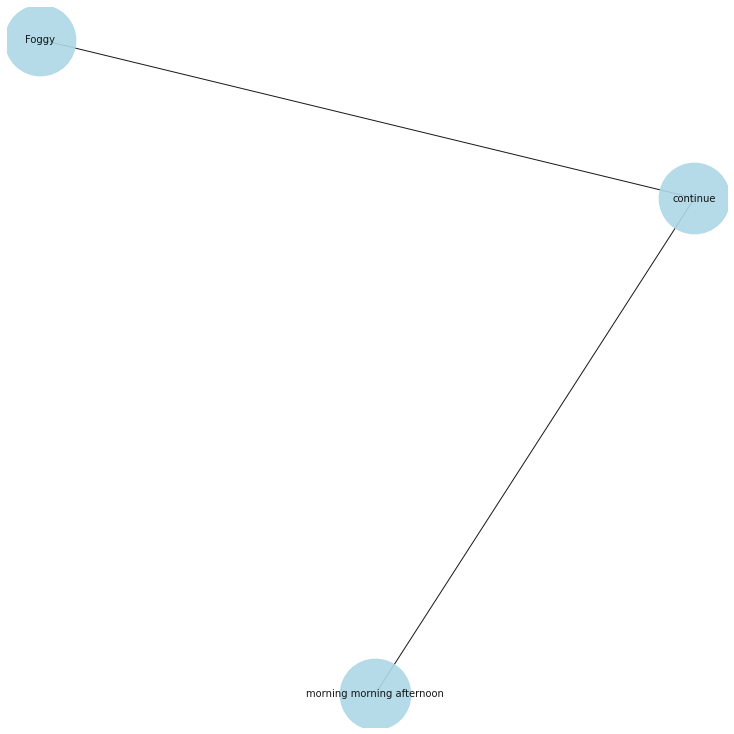

Mostly cloudy until night and breezy starting in the evening.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , night evening


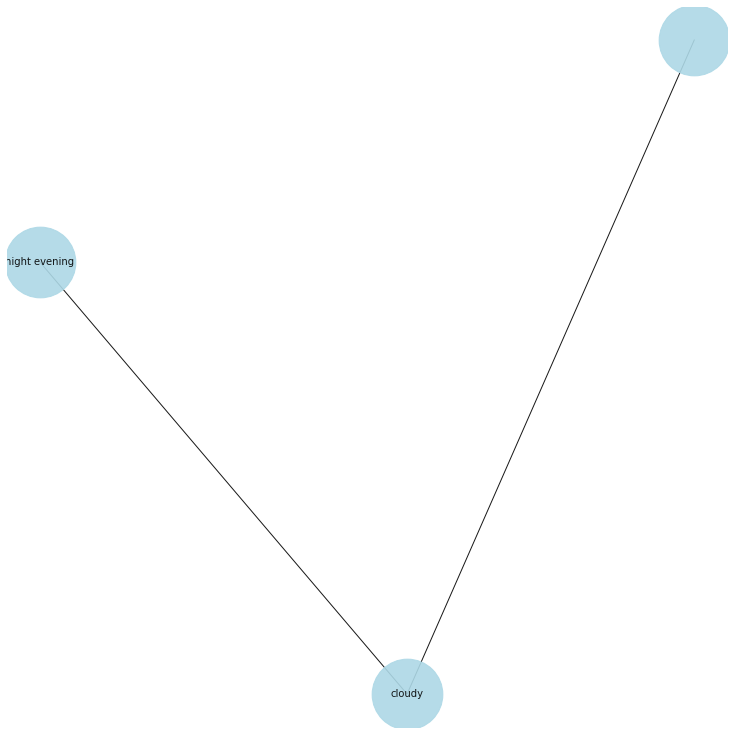

Mostly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
starting -> xcomp
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
 , cloudy starting , morning afternoon evening


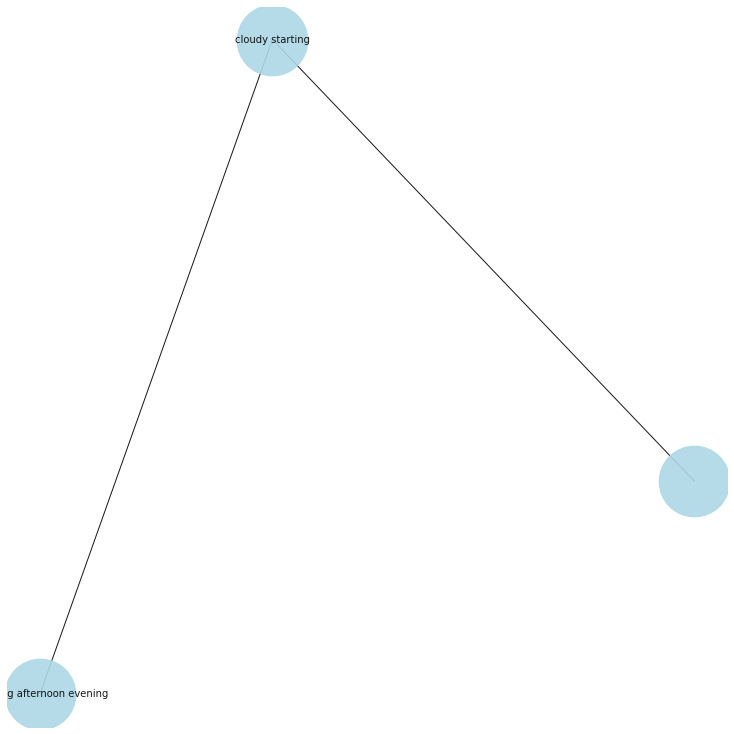

Mostly cloudy throughout the day and breezy starting in the afternoon.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , day afternoon


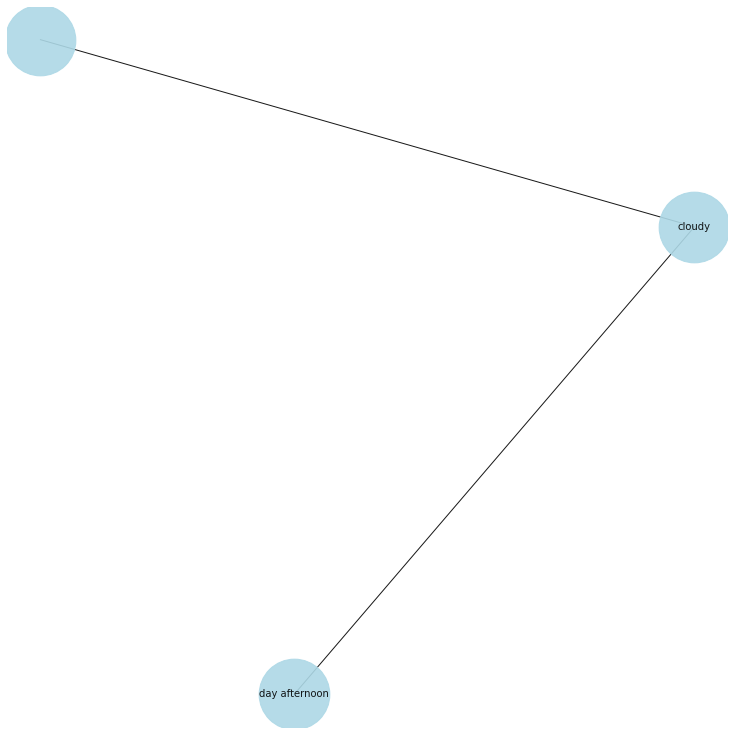

Partly cloudy starting in the afternoon and breezy in the afternoon.
Partly -> advmod
cloudy -> ROOT
starting -> acl
in -> prep
the -> det
afternoon -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , afternoon afternoon


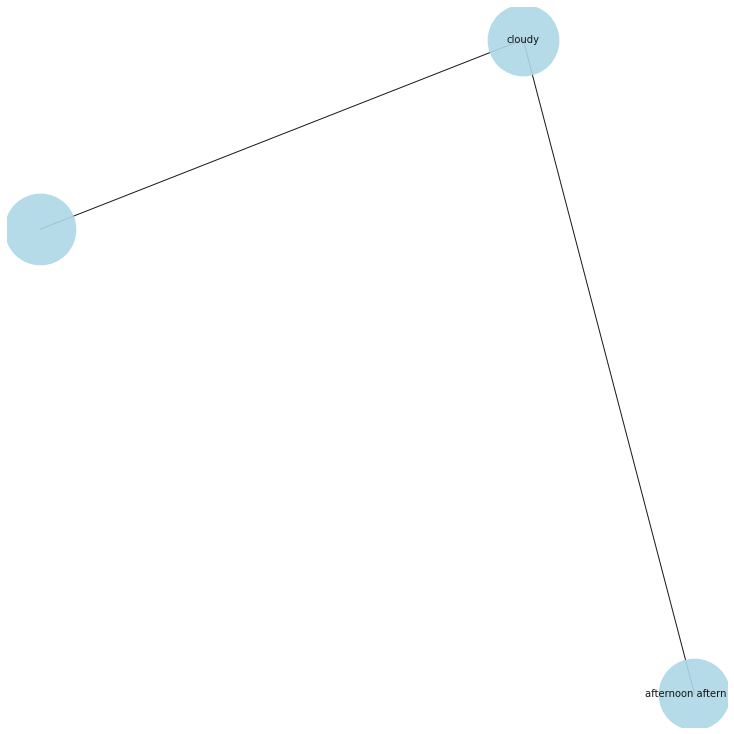

Mostly cloudy starting in the morning and windy in the evening.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
windy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy starting , morning evening


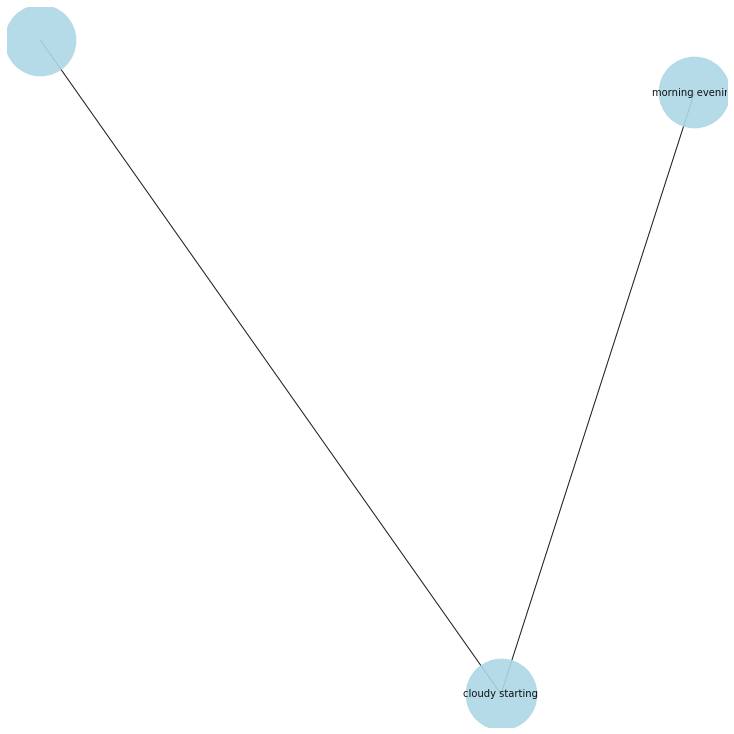

Mostly cloudy throughout the day and windy starting in the morning continuing until night.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
windy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
starting , cloudy , day morning night


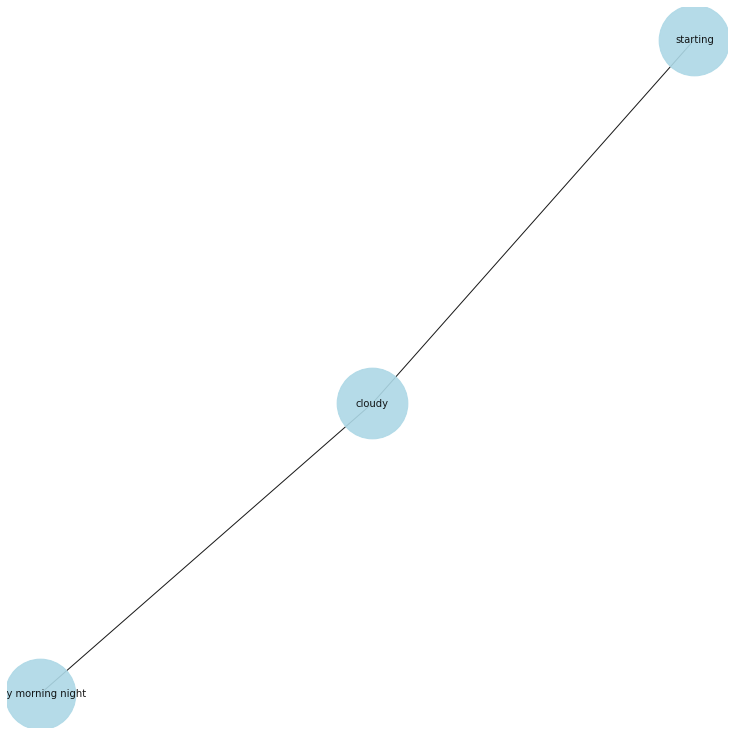

Overcast starting in the morning.
Overcast -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
. -> punct
 , overcast , morning


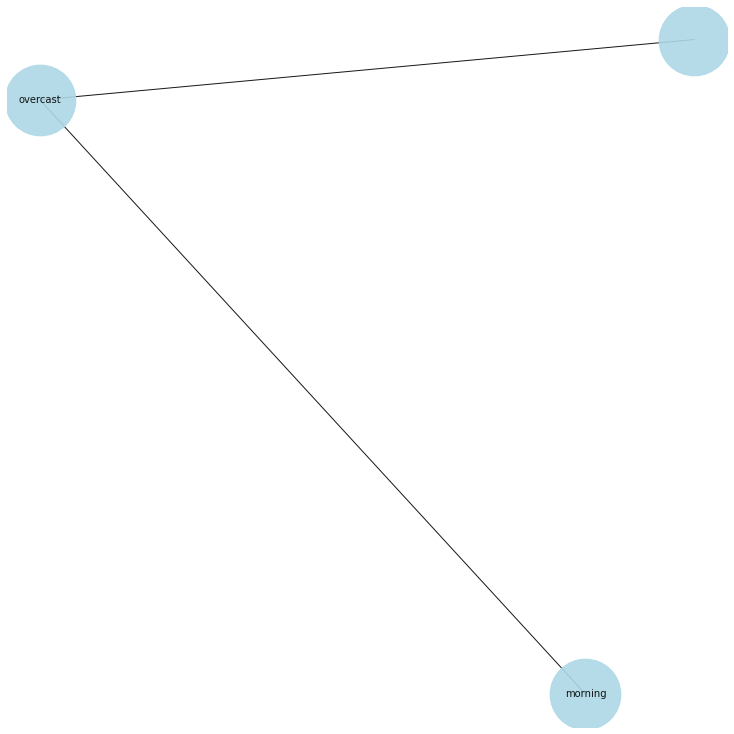

Drizzle until morning.
Drizzle -> ROOT
until -> prep
morning -> pobj
. -> punct
 , drizzle , morning


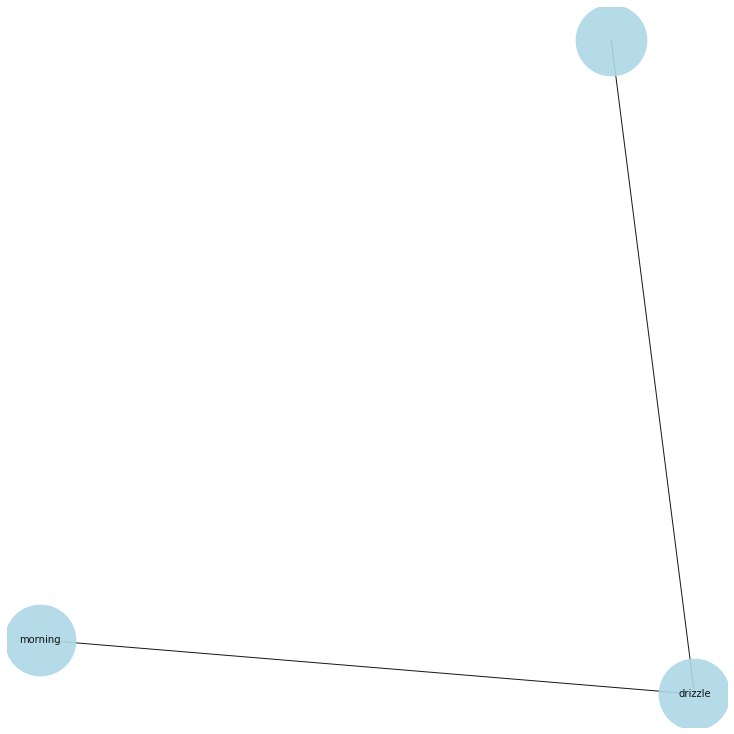

Partly cloudy until evening and breezy in the afternoon.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , evening afternoon


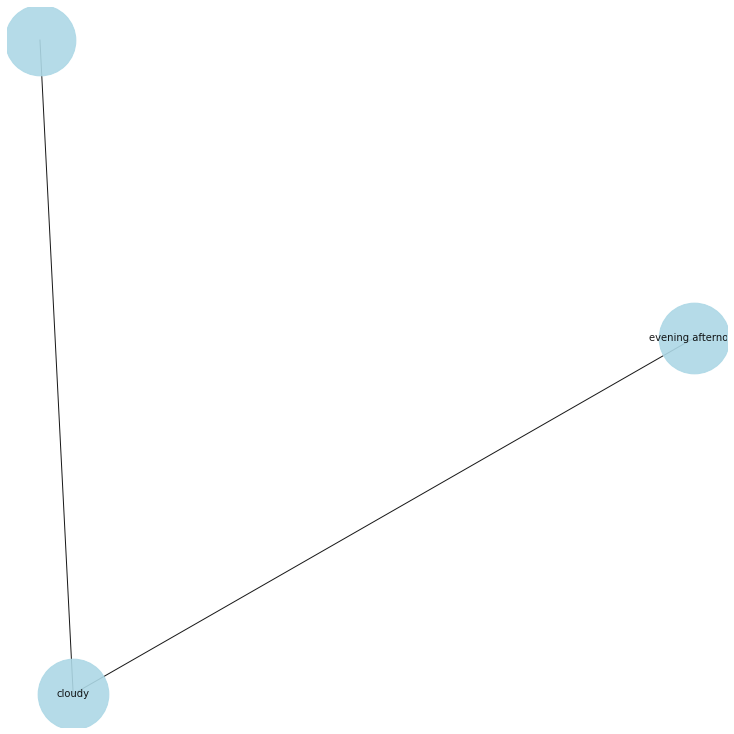

Mostly cloudy starting in the morning continuing until night and breezy in the afternoon.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
starting , cloudy continue , morning night afternoon


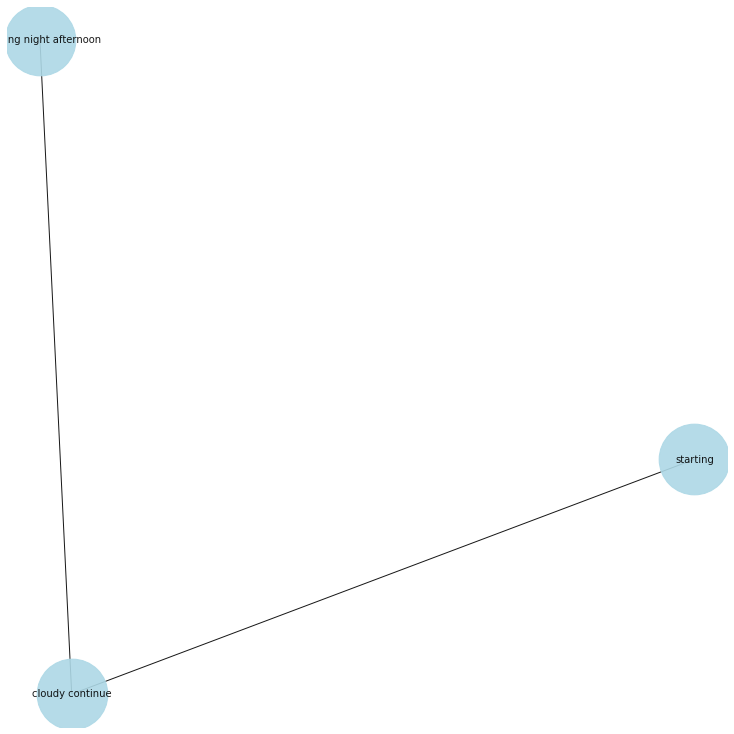

Mostly cloudy starting in the morning and breezy overnight.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , cloudy starting , morning


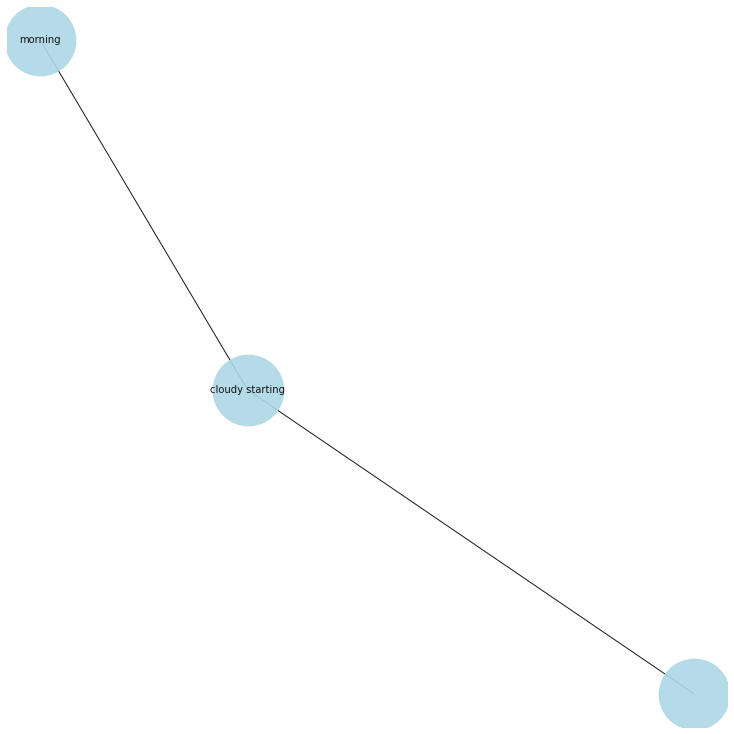

Partly cloudy starting in the morning and breezy in the evening.
Partly -> advmod
cloudy -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , morning evening


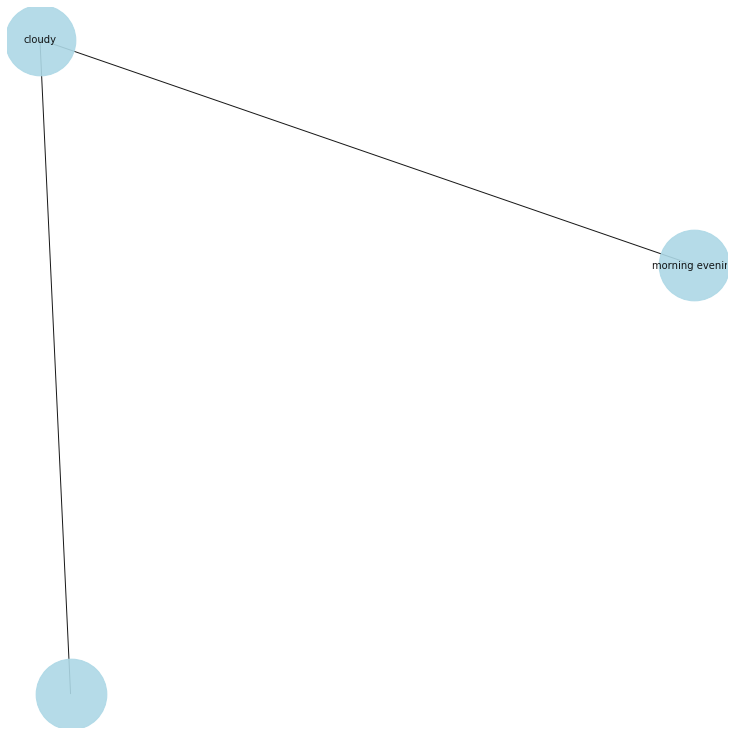

Breezy starting in the afternoon continuing until evening and foggy in the evening.
Breezy -> nsubj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
foggy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
Breezy , continue , afternoon evening evening


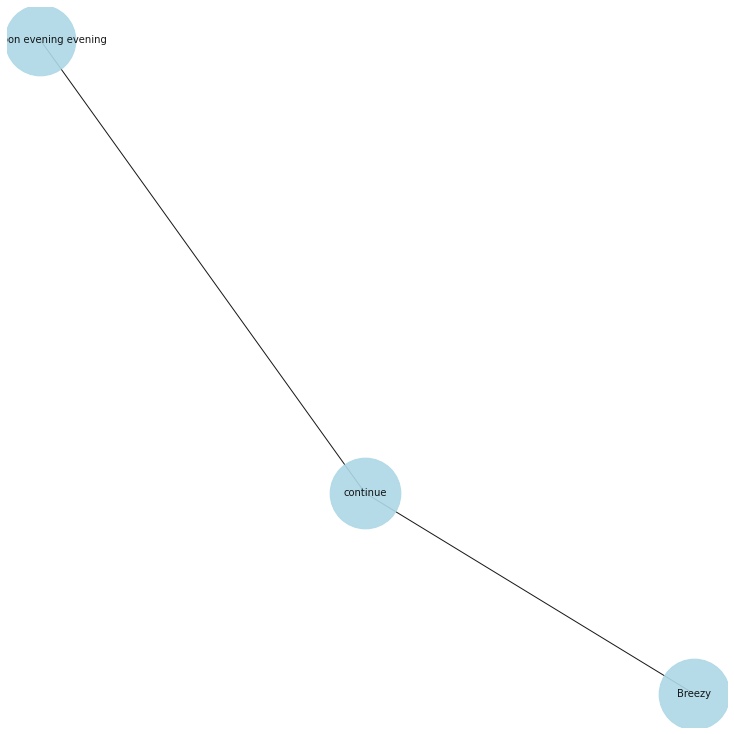

Mostly cloudy until night and breezy starting in the afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , night afternoon


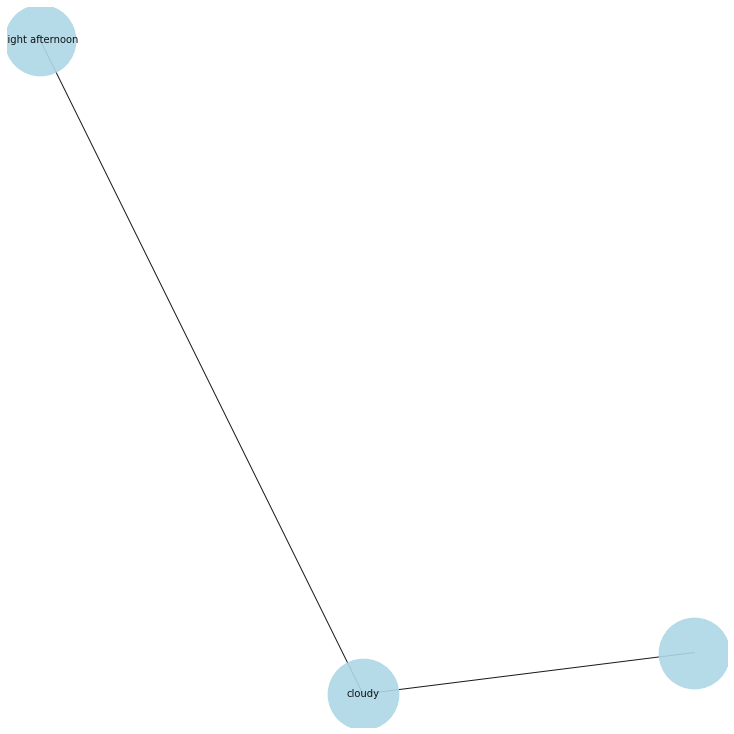

Partly cloudy starting overnight continuing until night and breezy in the morning.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
starting , cloudy continue , night morning


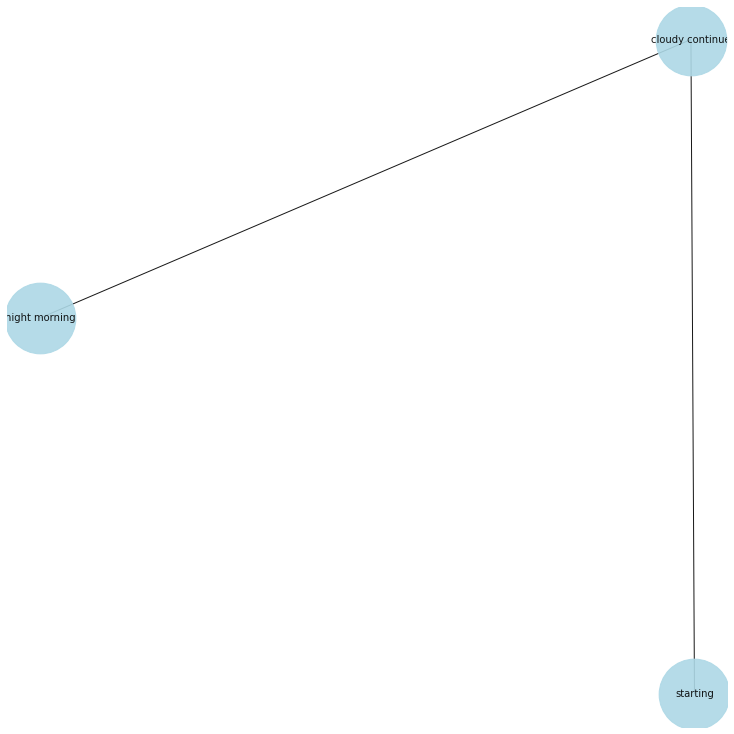

Light rain until morning.
Light -> amod
rain -> ROOT
until -> prep
morning -> pobj
. -> punct
 , light rain , morning


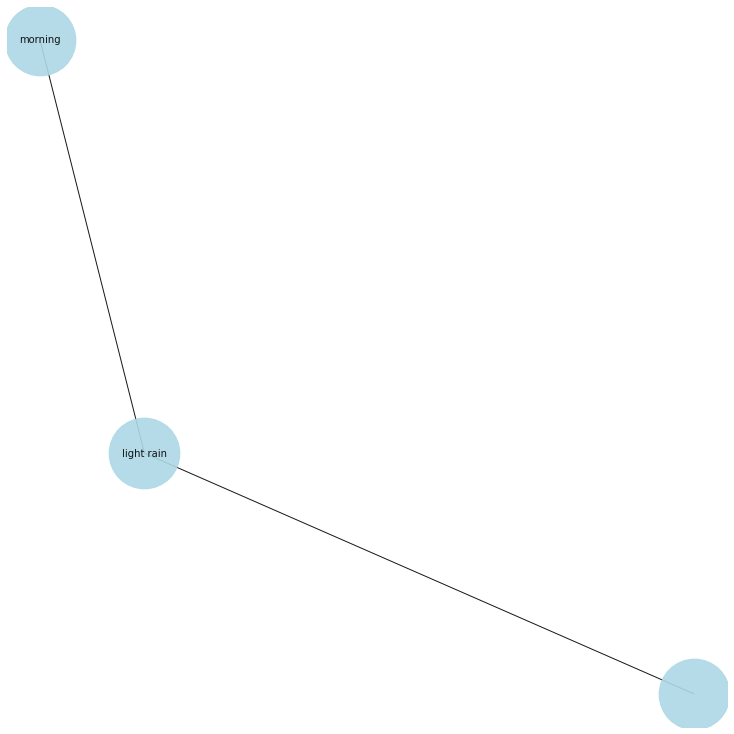

Windy in the afternoon.
Windy -> ROOT
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , Windy , afternoon


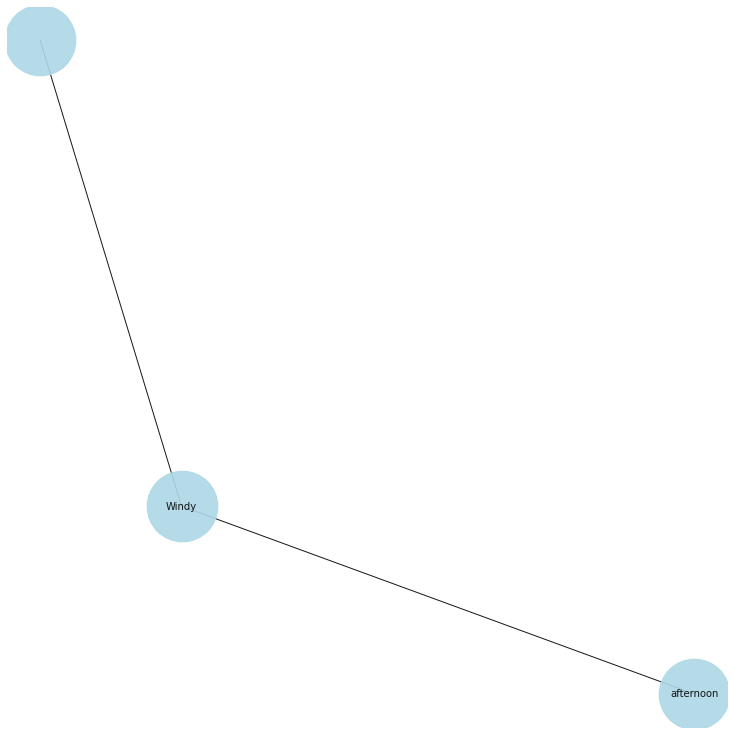

Mostly cloudy until night and breezy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy , night morning afternoon


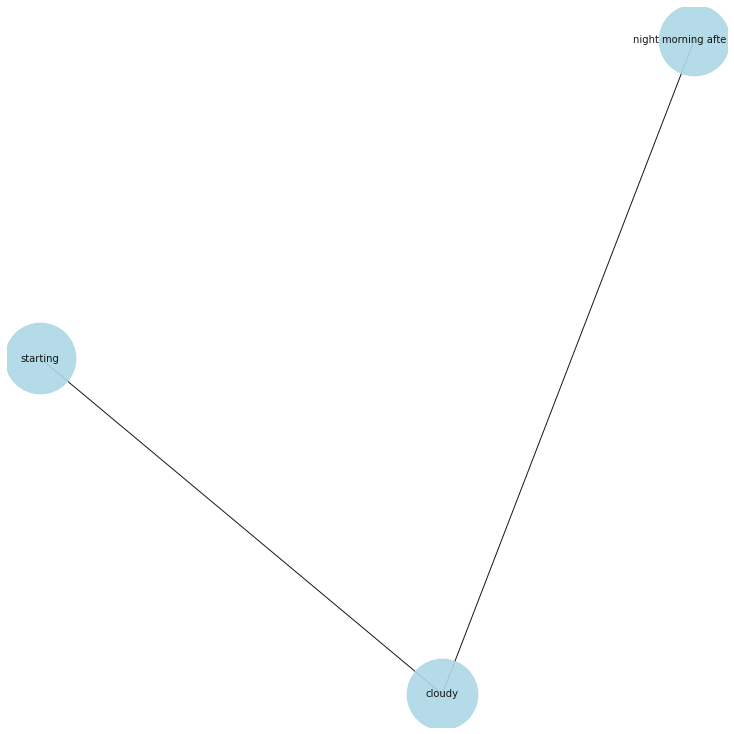

Partly cloudy starting in the morning continuing until evening and breezy starting in the afternoon continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , morning evening afternoon evening


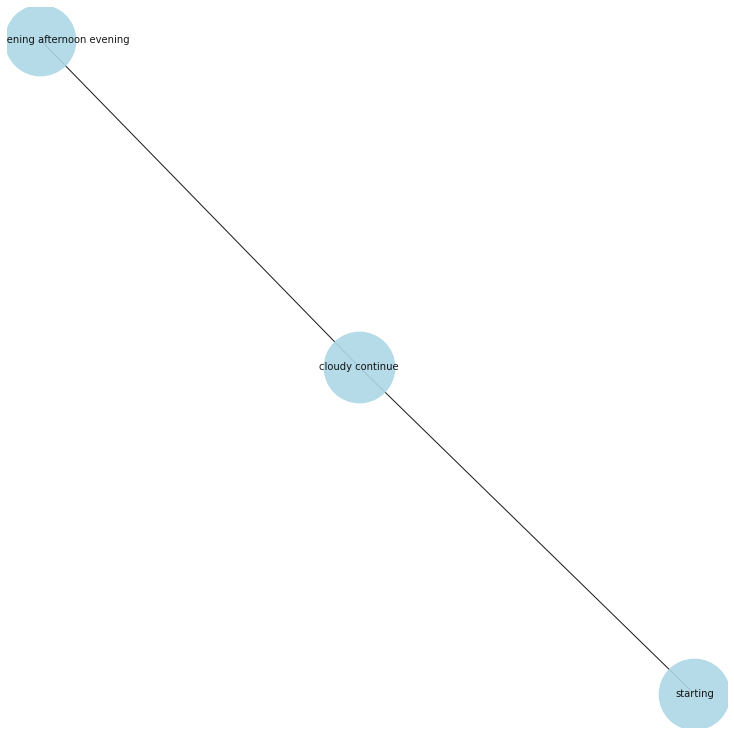

Mostly cloudy overnight.
Mostly -> advmod
cloudy -> amod
overnight -> ROOT
. -> punct
 , cloudy overnight , 


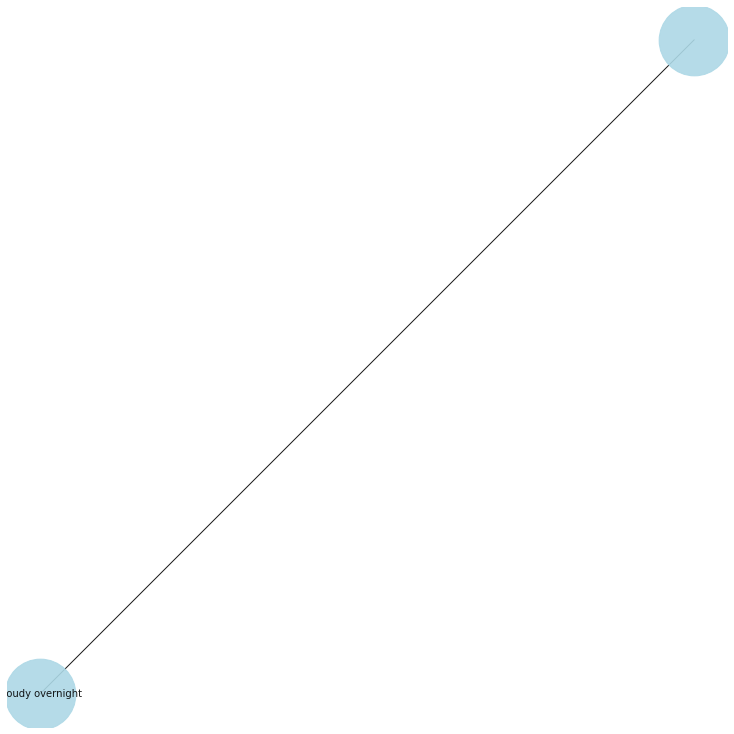

Partly cloudy starting in the morning continuing until night and breezy starting in the afternoon continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
continuing -> xcomp
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> xcomp
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
 , cloudy starting , morning night afternoon evening


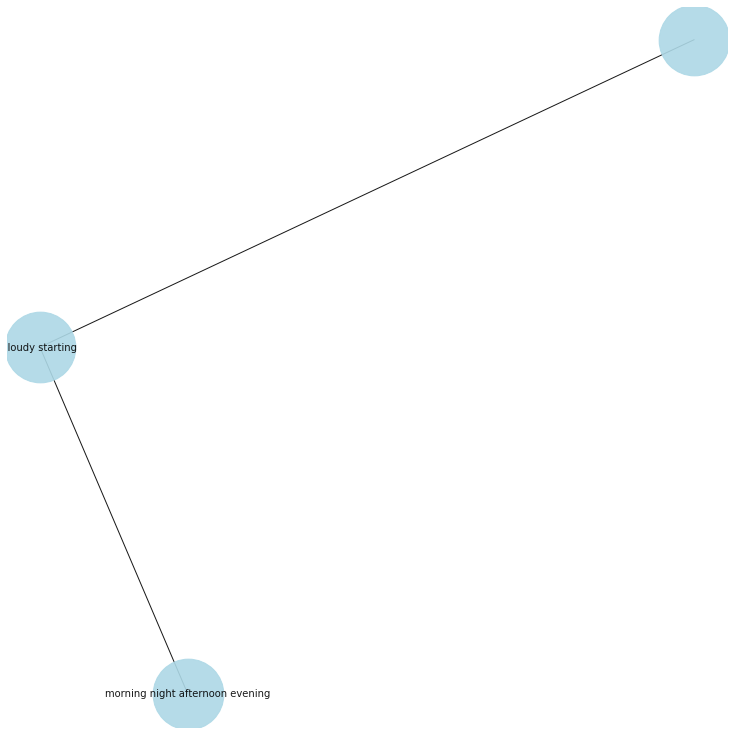

Breezy in the morning and mostly cloudy starting in the evening.
Breezy -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
starting -> acl
in -> prep
the -> det
evening -> pobj
. -> punct
 , breezy , morning evening


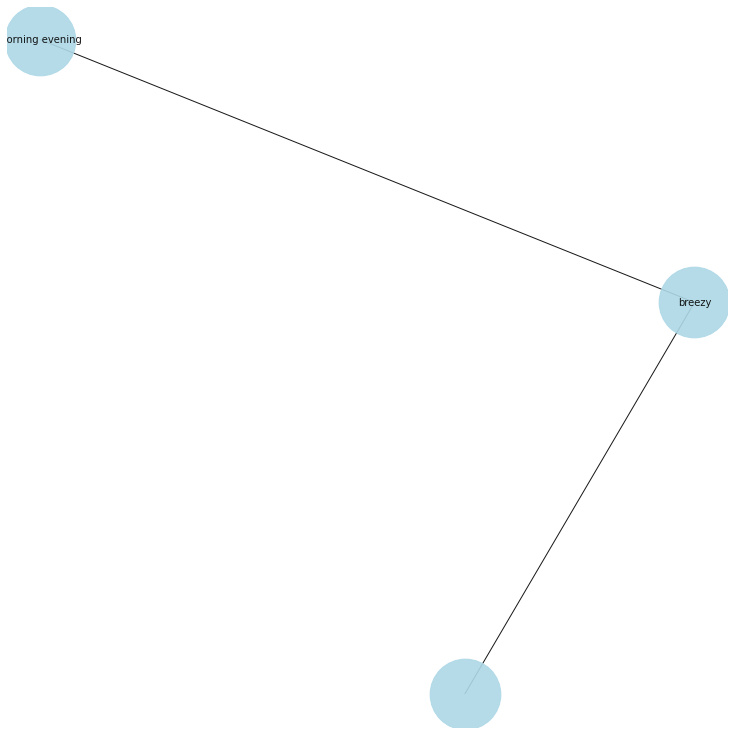

Overcast throughout the day and breezy in the afternoon.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , overcast , day afternoon


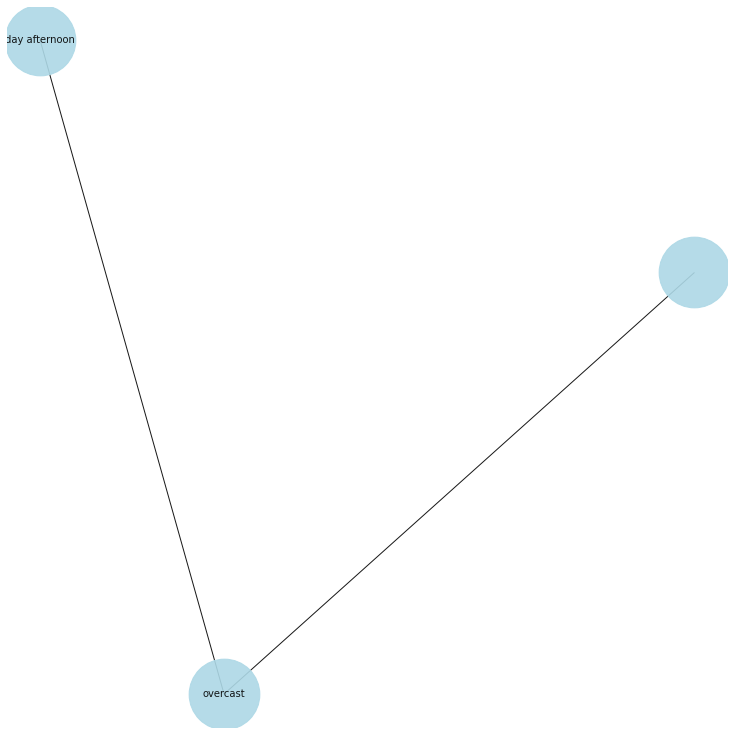

Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> xcomp
until -> prep
evening -> pobj
. -> punct
 , cloudy starting , morning afternoon evening


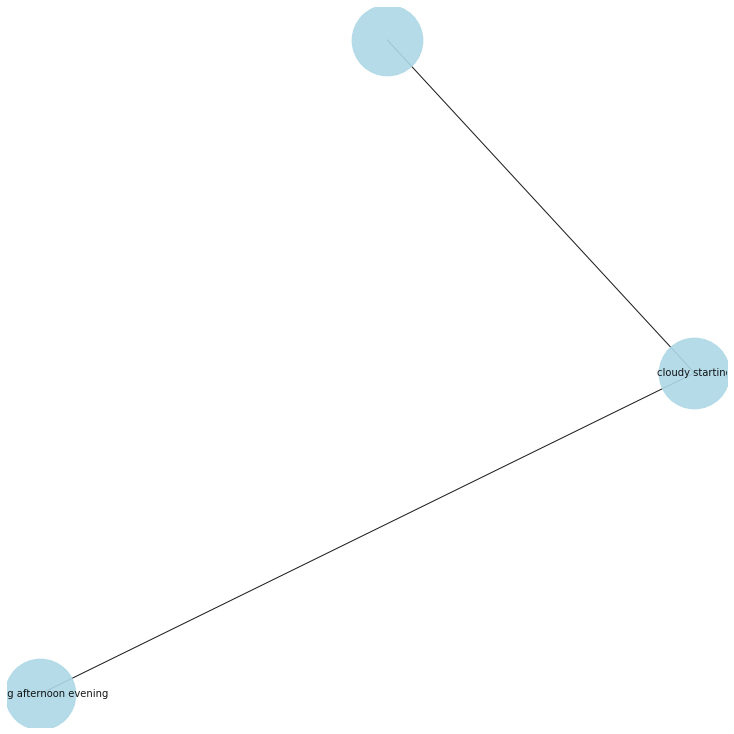

Rain until morning.
Rain -> ROOT
until -> prep
morning -> pobj
. -> punct
 , rain , morning


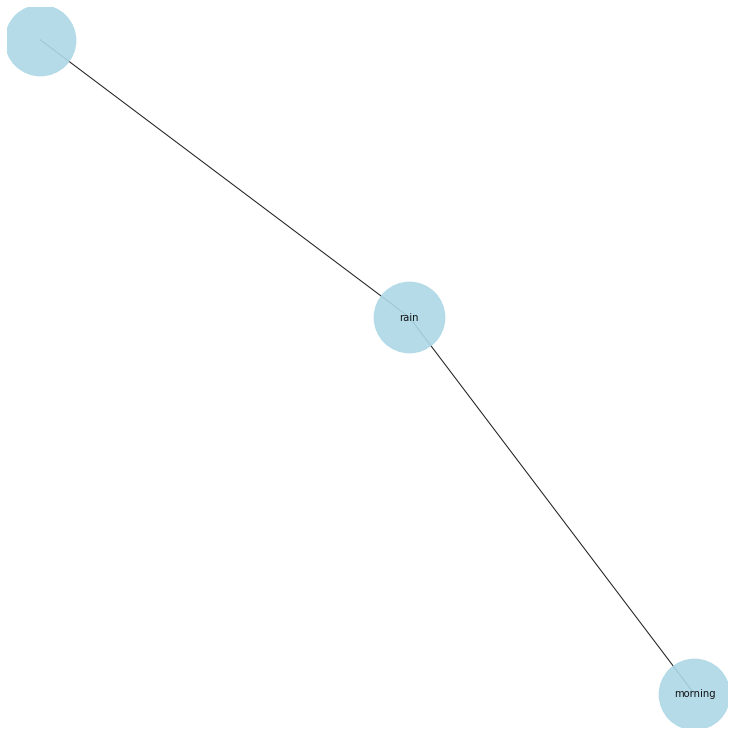

Overcast until morning.
Overcast -> ROOT
until -> prep
morning -> pobj
. -> punct
 , overcast , morning


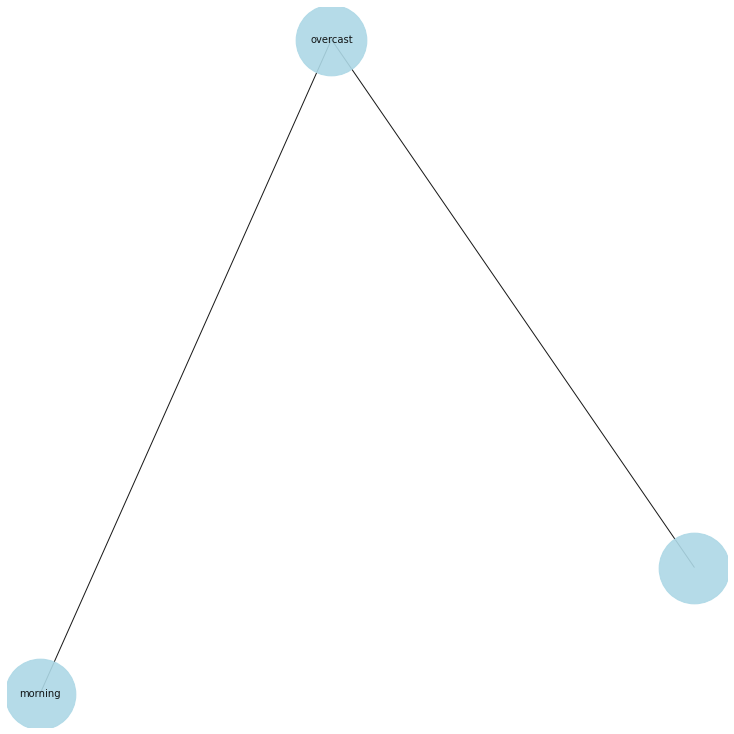

Mostly cloudy until evening and windy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> nsubj
and -> cc
windy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> pcomp
until -> prep
afternoon -> pobj
. -> punct
evening starting , cloudy , morning afternoon


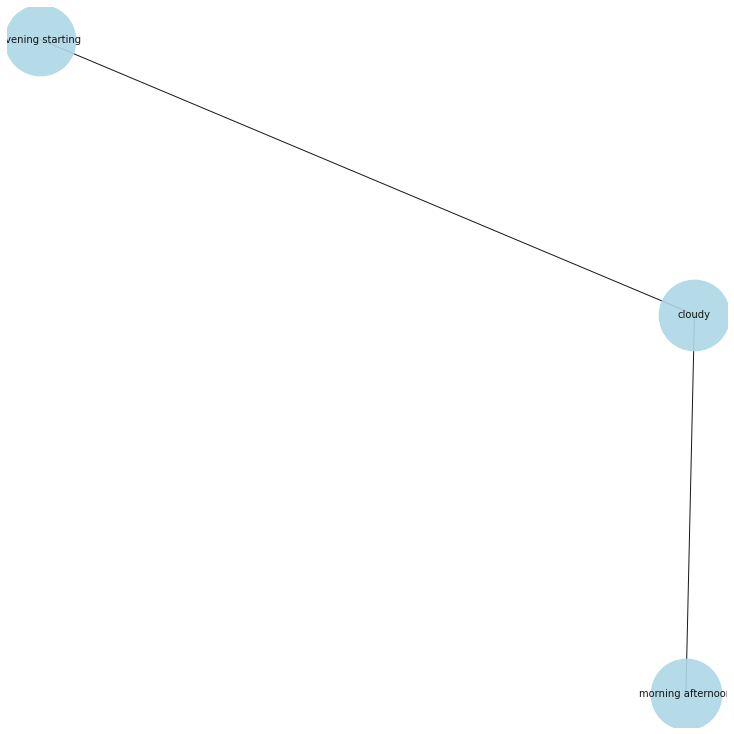

Mostly cloudy until night and breezy overnight.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , cloudy , night


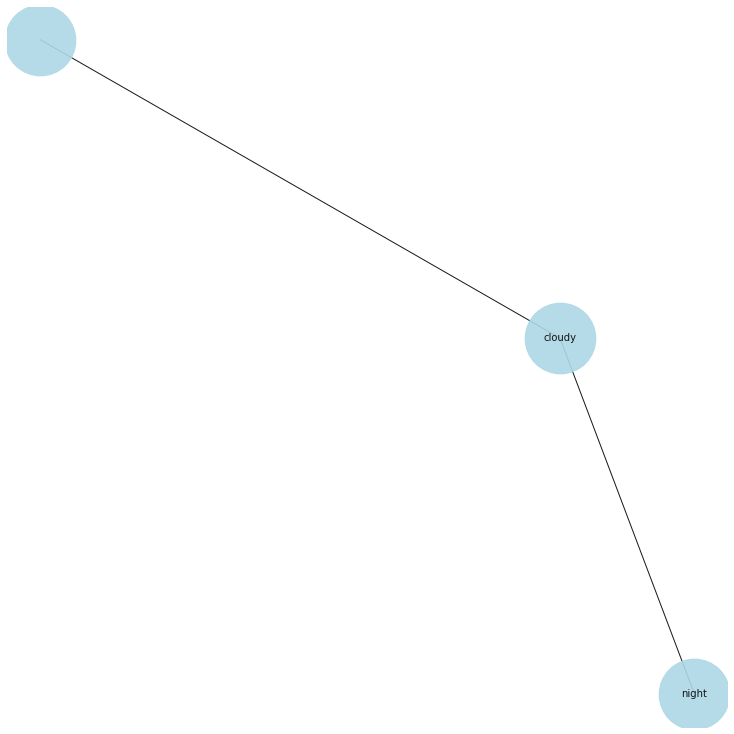

Mostly cloudy starting in the evening.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy starting , evening


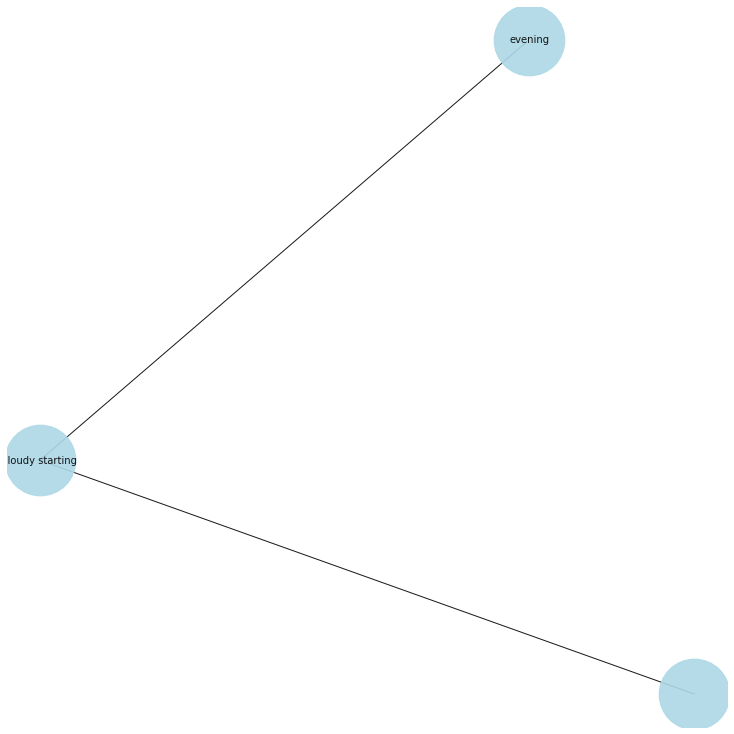

Partly cloudy throughout the day and breezy starting in the morning continuing until evening.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy , day morning evening


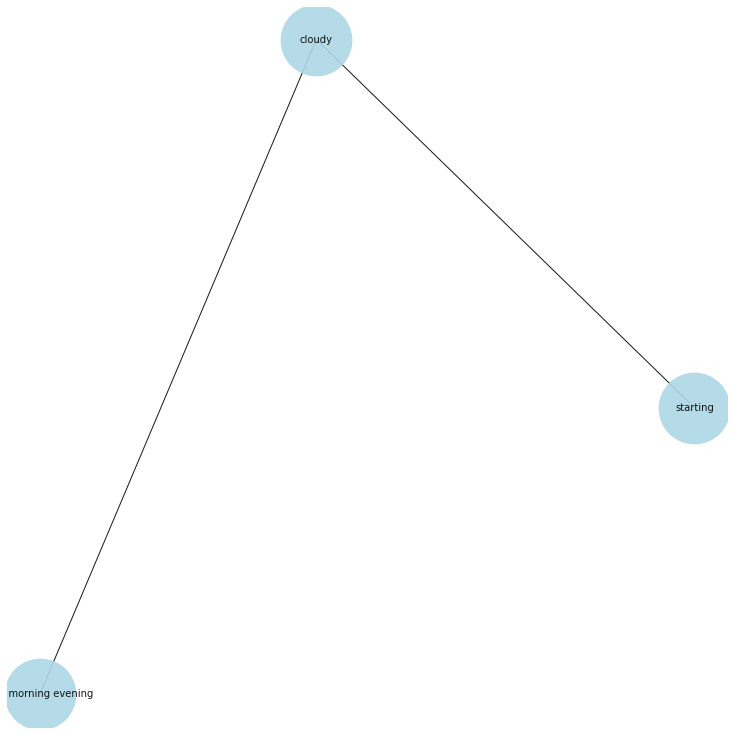

Mostly cloudy throughout the day and breezy starting in the evening continuing until night.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
evening -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
starting , cloudy , day evening night


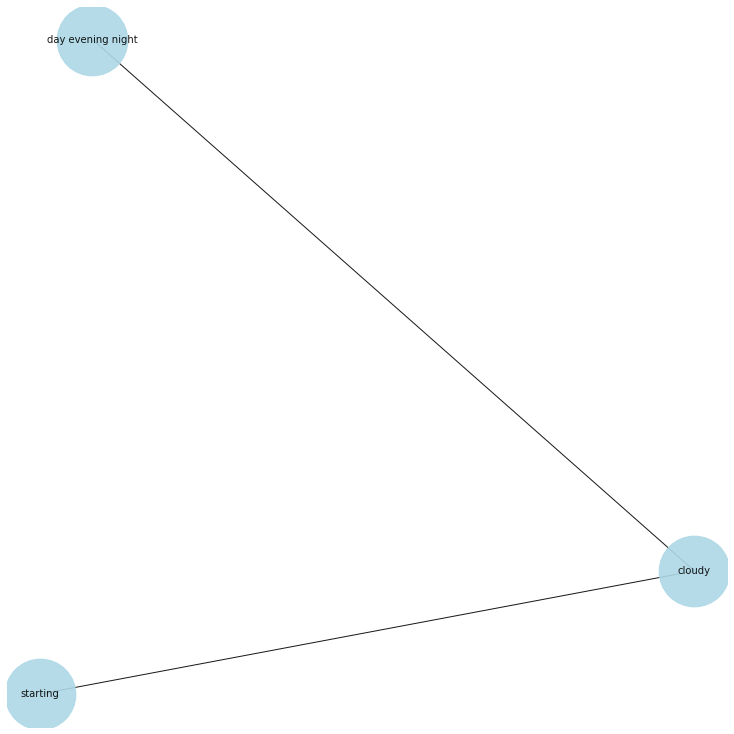

Mostly cloudy throughout the day and windy starting in the morning continuing until evening.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
windy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy , day morning evening


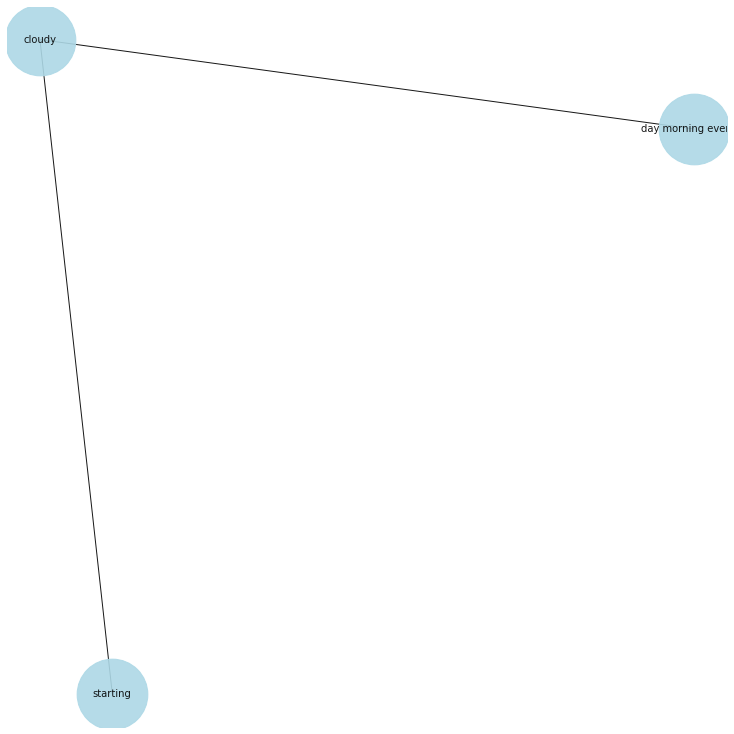

Breezy starting overnight continuing until morning and partly cloudy starting in the morning.
Breezy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
partly -> advmod
cloudy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
. -> punct
 , breezy , morning morning


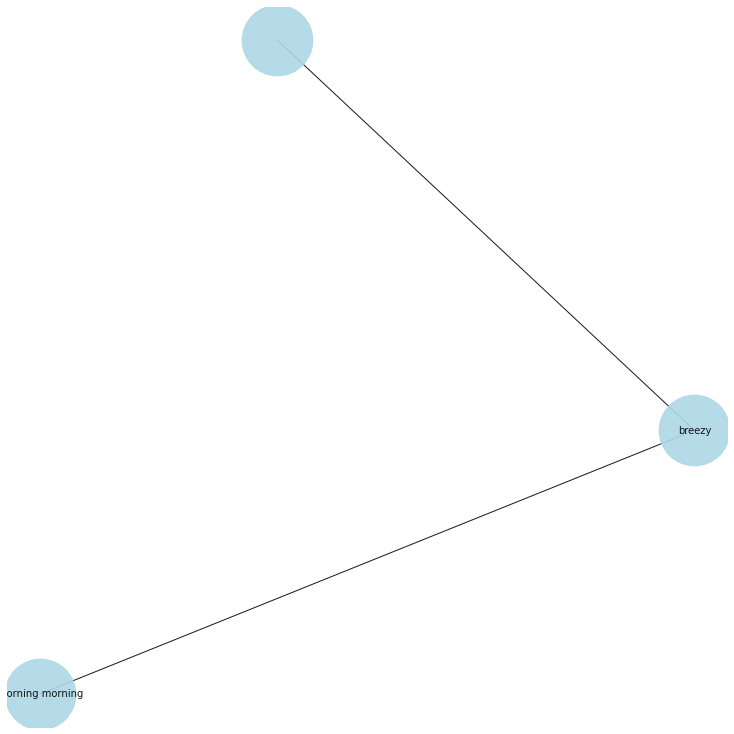

Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.
Breezy -> nsubj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
and -> cc
foggy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Breezy , continue , afternoon morning evening


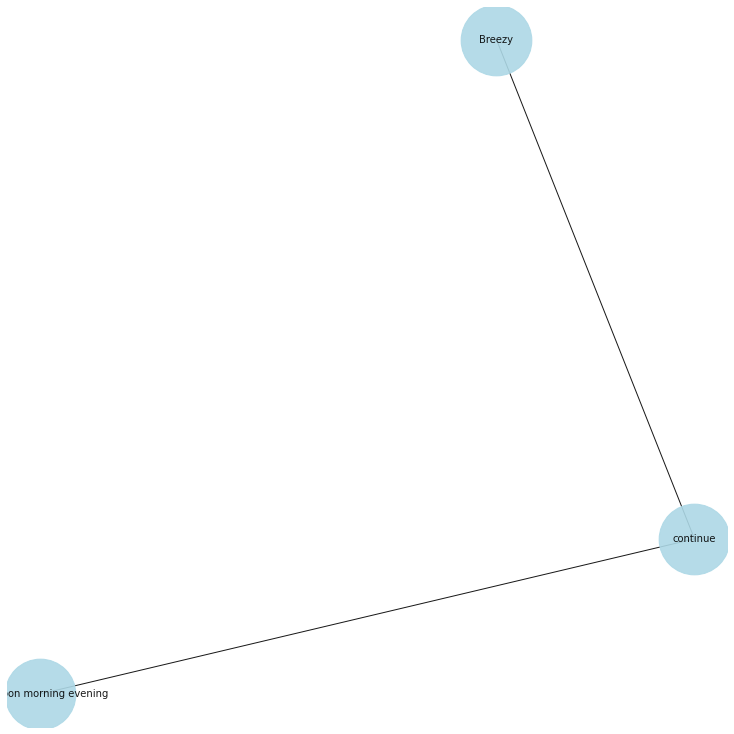

Mostly cloudy starting overnight and breezy starting in the evening.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy start , evening


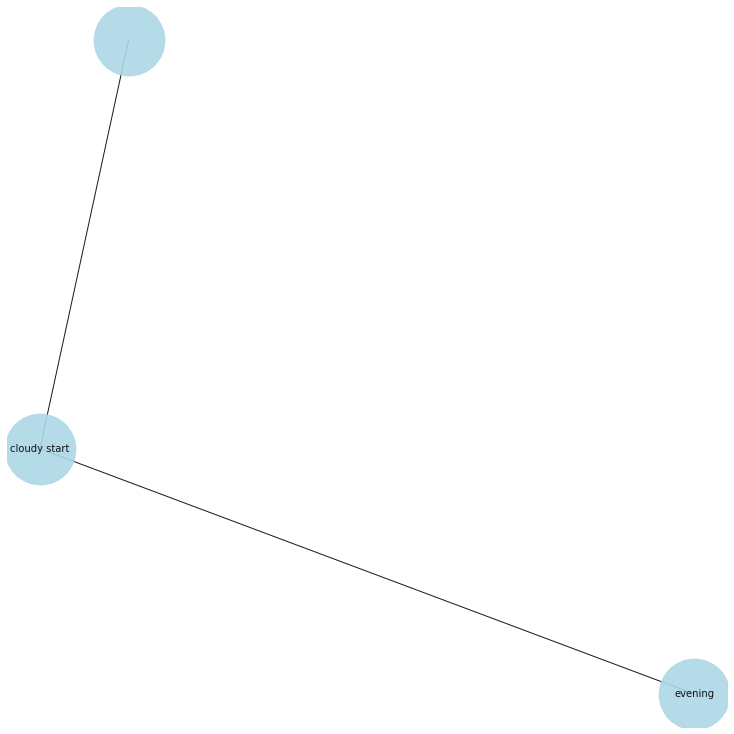

Overcast until night and breezy overnight.
Overcast -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , overcast , night


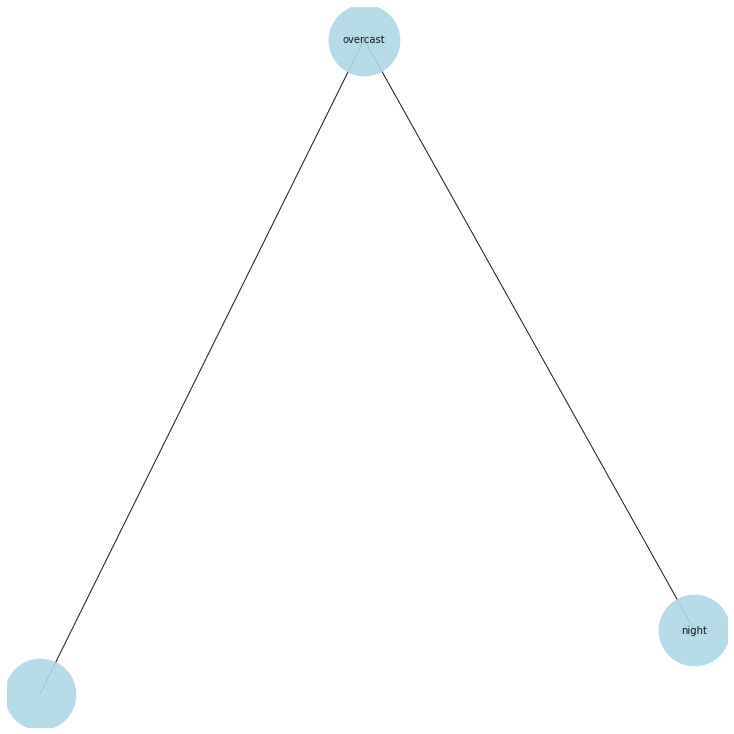

Foggy starting overnight continuing until afternoon and breezy in the morning.
Foggy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , Foggy , afternoon morning


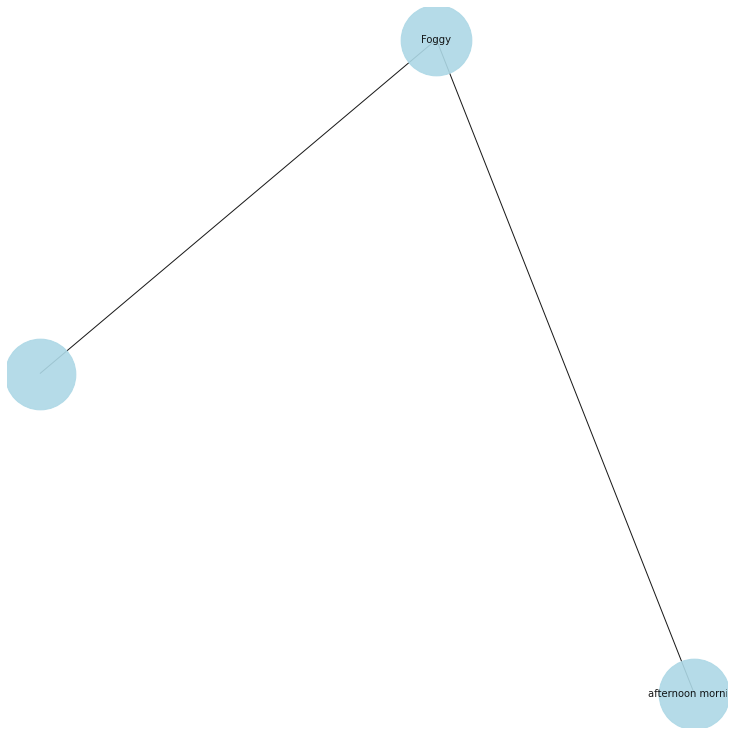

Breezy starting in the afternoon continuing until night and mostly cloudy starting in the evening.
Breezy -> ROOT
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> acl
until -> prep
night -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , Breezy , afternoon night evening


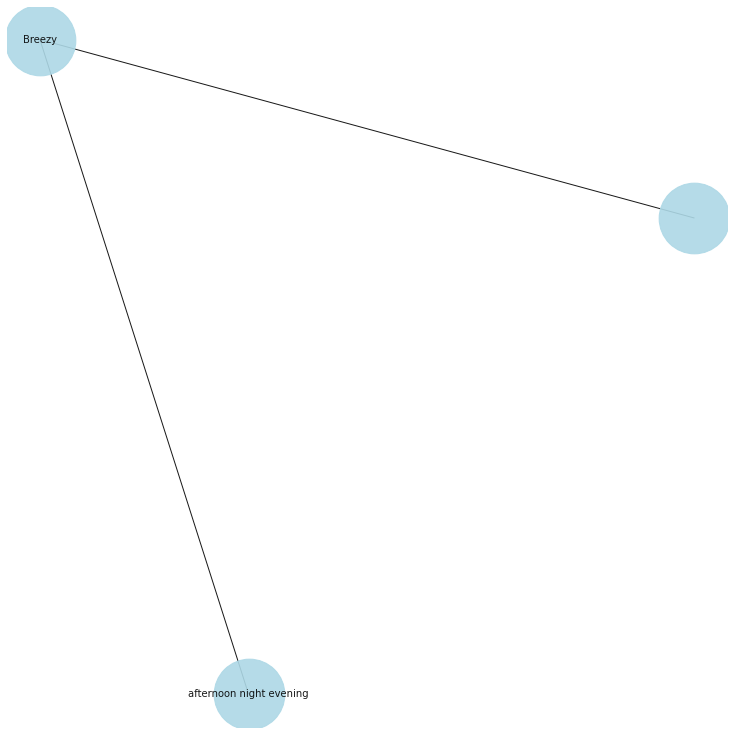

Overcast throughout the day and breezy overnight.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , overcast , day


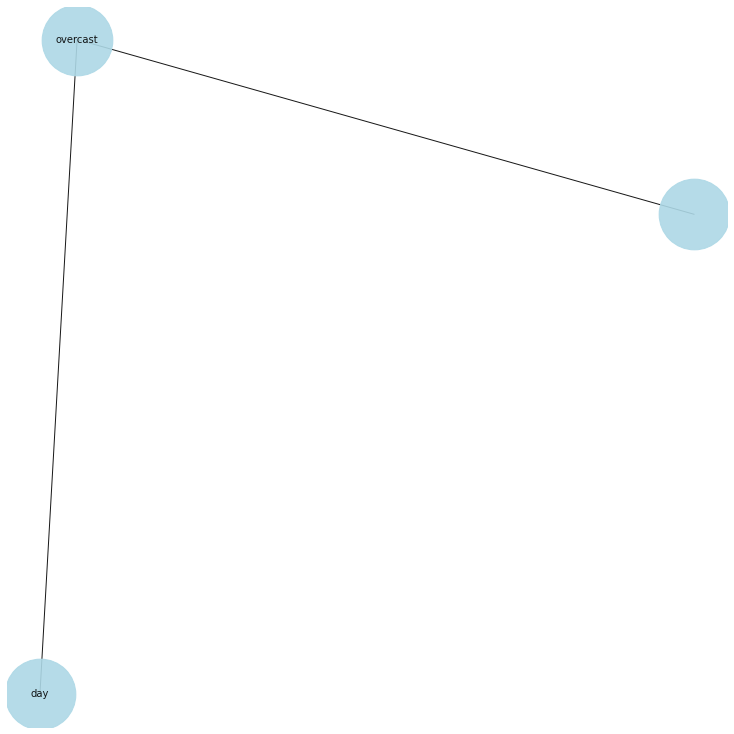

Partly cloudy throughout the day and windy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
windy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
 , cloudy , day morning afternoon


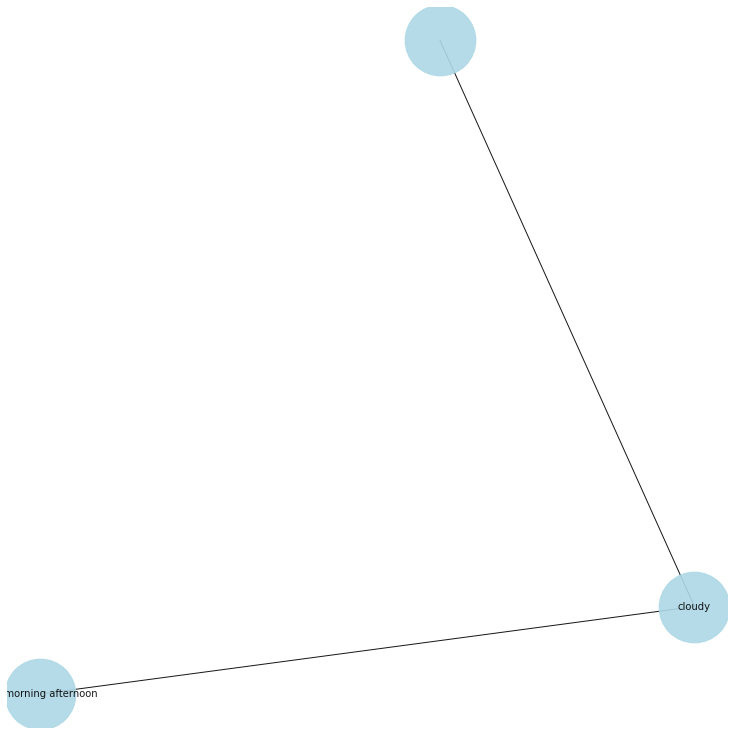

Partly cloudy overnight and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , cloudy continue , morning afternoon


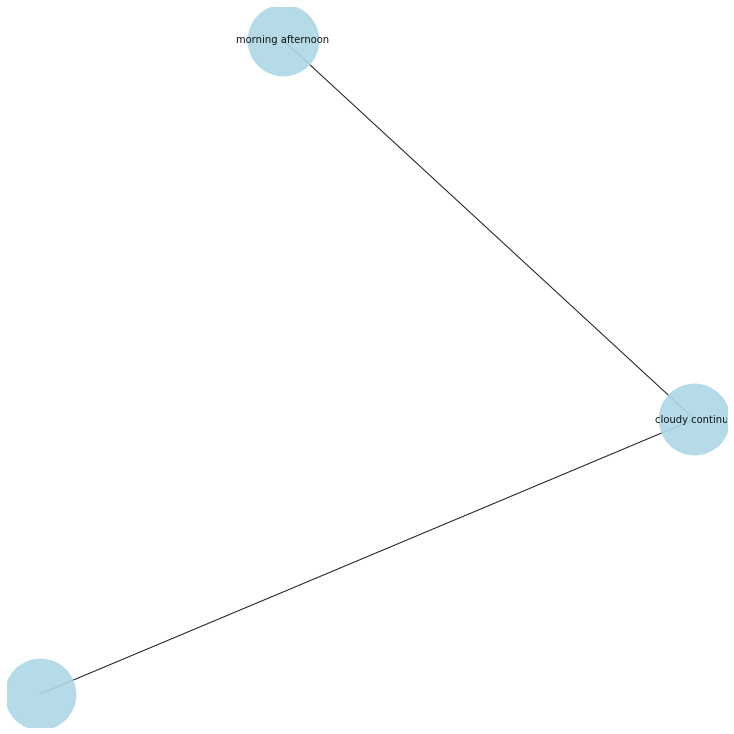

Breezy and foggy starting in the evening.
Breezy -> ROOT
and -> cc
foggy -> conj
starting -> acl
in -> prep
the -> det
evening -> pobj
. -> punct
 , breezy , evening


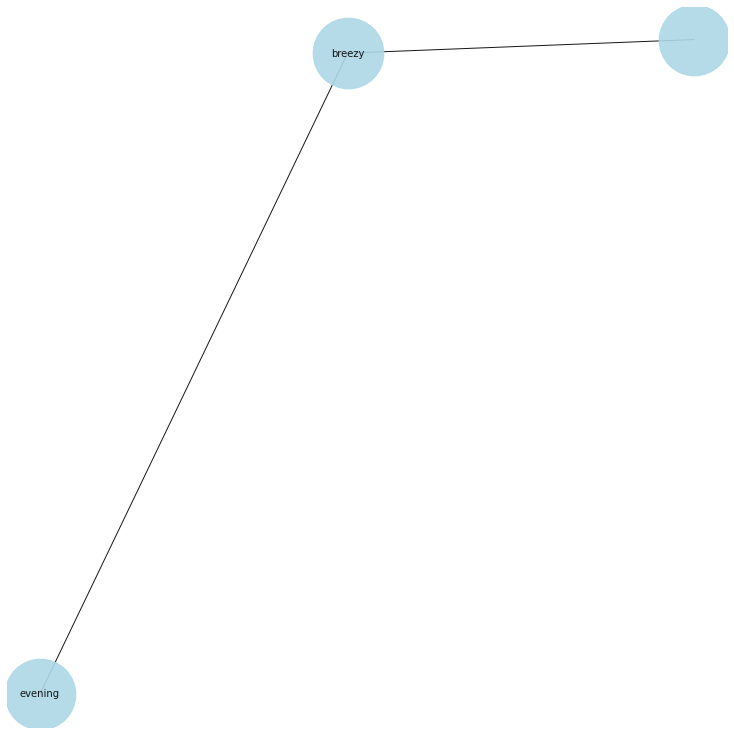

Mostly cloudy starting overnight and breezy starting in the afternoon continuing until evening.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , afternoon evening


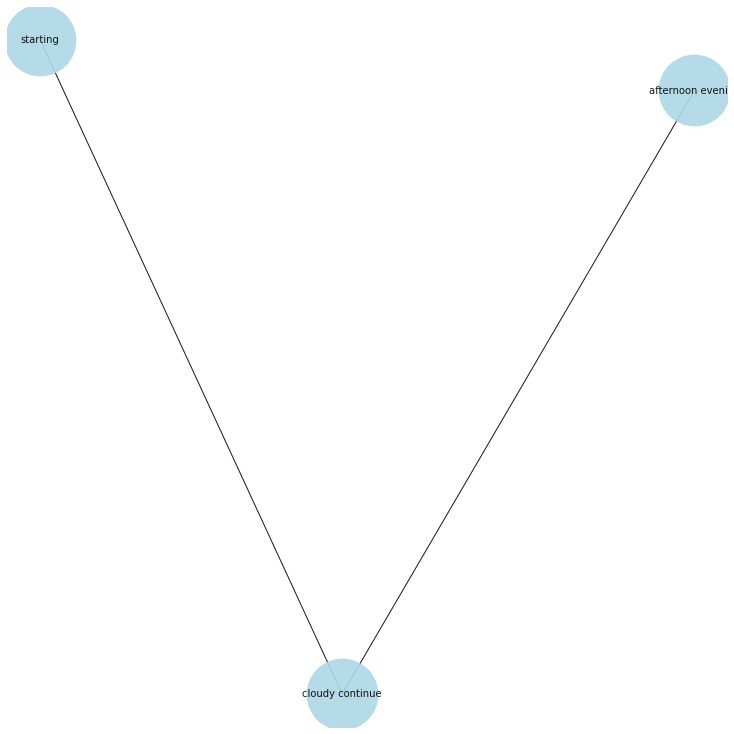

Rain throughout the day.
Rain -> ROOT
throughout -> prep
the -> det
day -> pobj
. -> punct
 , rain , day


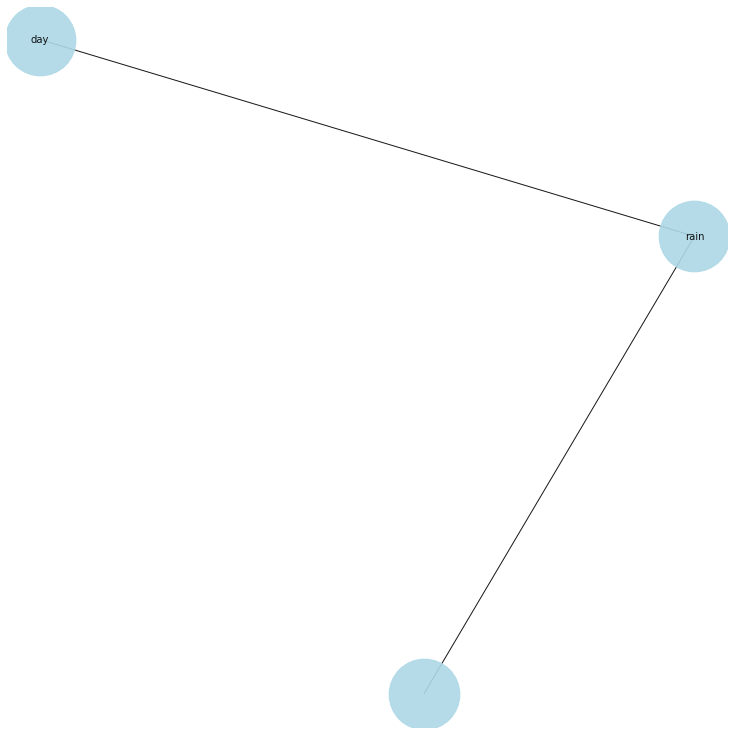

Mostly cloudy until night and windy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> advmod
until -> mark
night -> pobj
and -> cc
windy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , continue , night morning afternoon


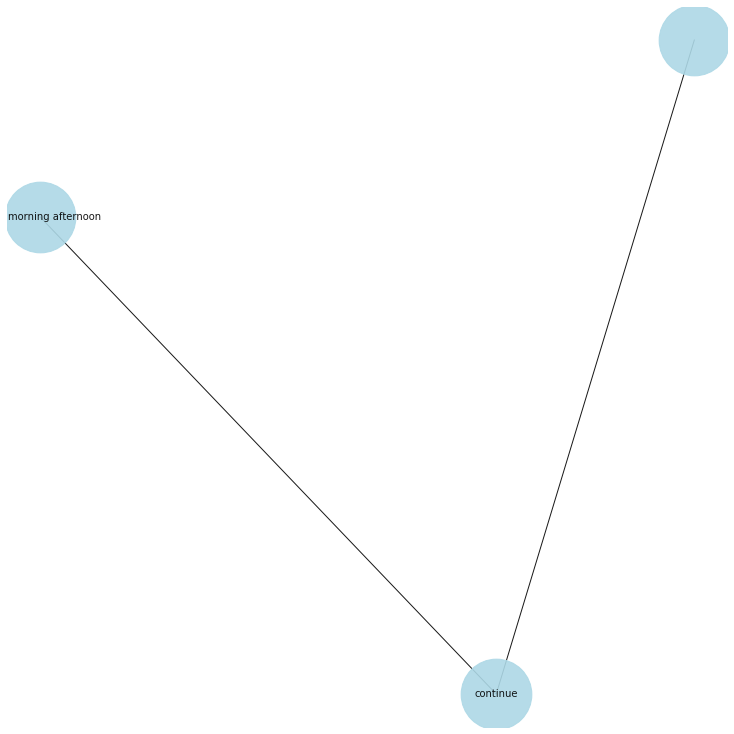

Partly cloudy throughout the day and breezy starting in the morning continuing until night.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
starting , cloudy , day morning night


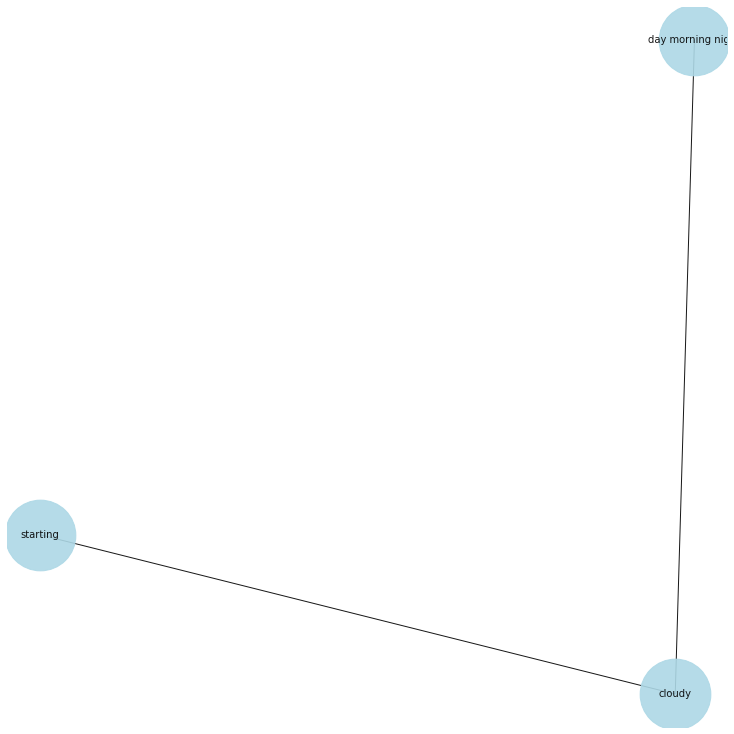

Mostly cloudy until night and breezy starting overnight continuing until morning.
Mostly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> aux
overnight -> advmod
continuing -> advcl
until -> prep
morning -> pobj
. -> punct
 , cloudy , night morning


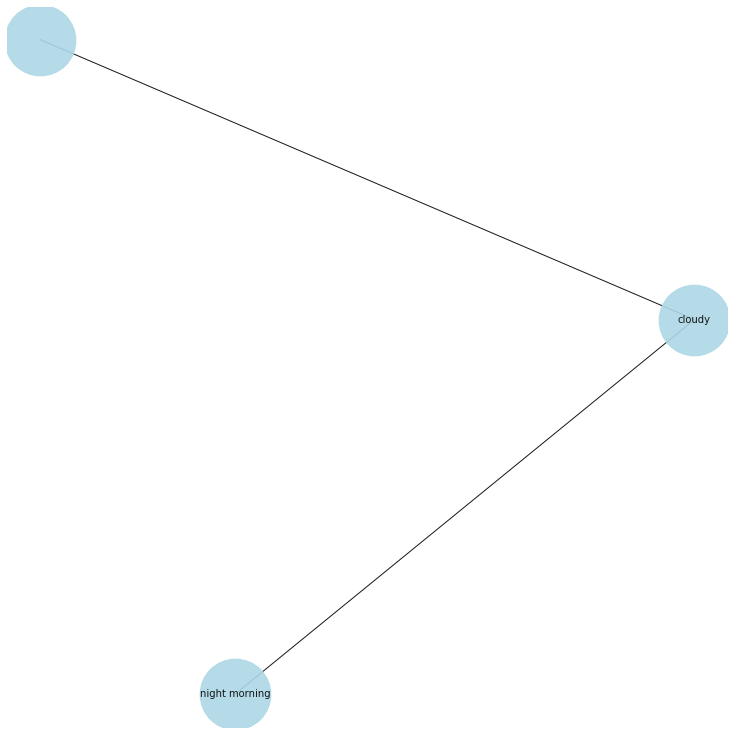

Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , evening morning evening


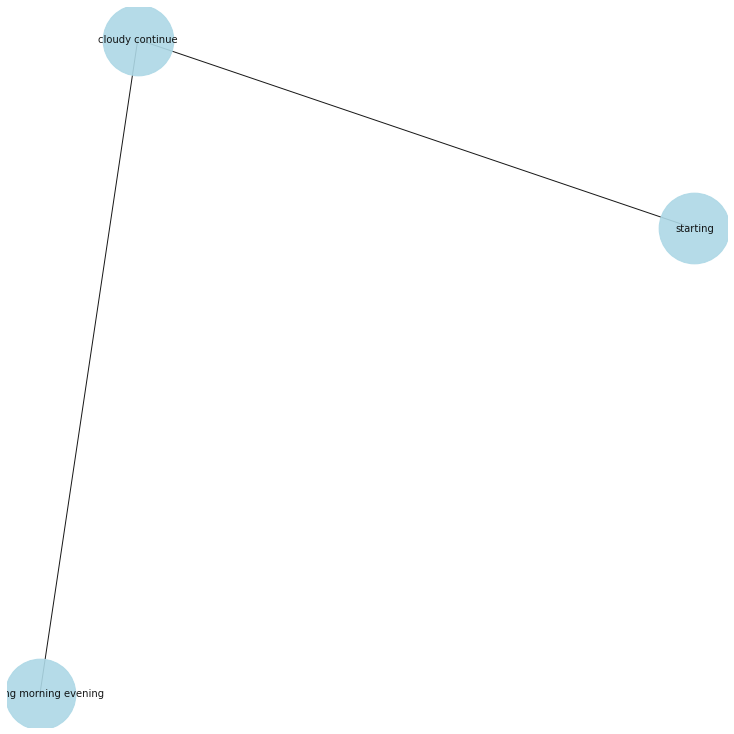

Breezy starting in the morning continuing until afternoon and mostly cloudy starting in the morning.
Breezy -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> acl
until -> prep
afternoon -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
. -> punct
 , Breezy , morning afternoon morning


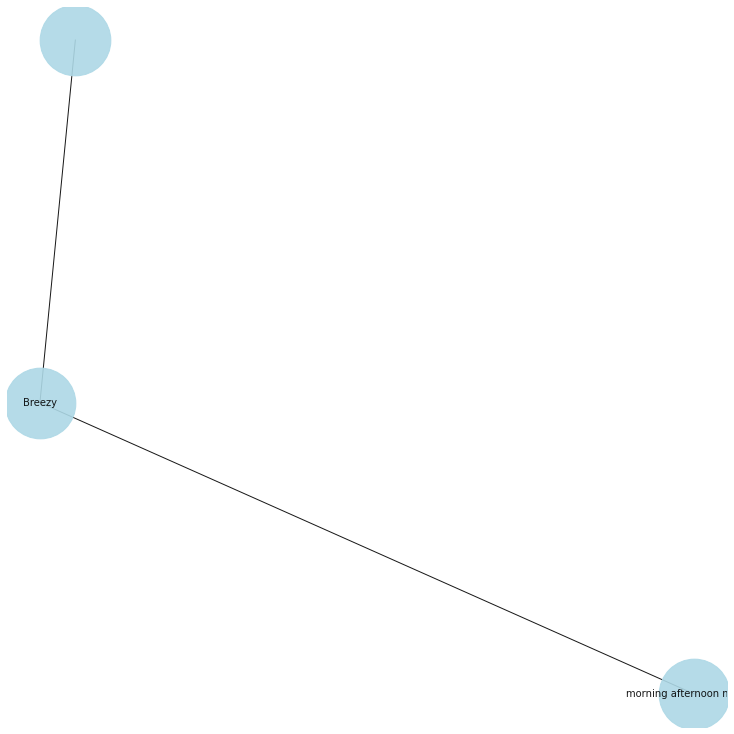

Foggy starting in the morning continuing until evening and breezy in the evening.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
Foggy , continue , morning evening evening


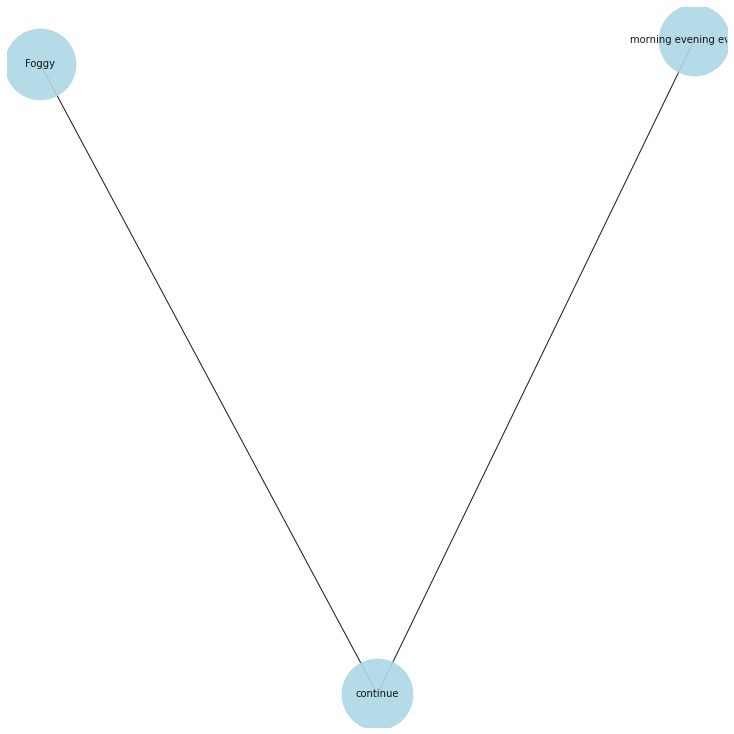

Mostly cloudy until night and breezy starting in the morning continuing until evening.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> pcomp
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
 , cloudy , night morning evening


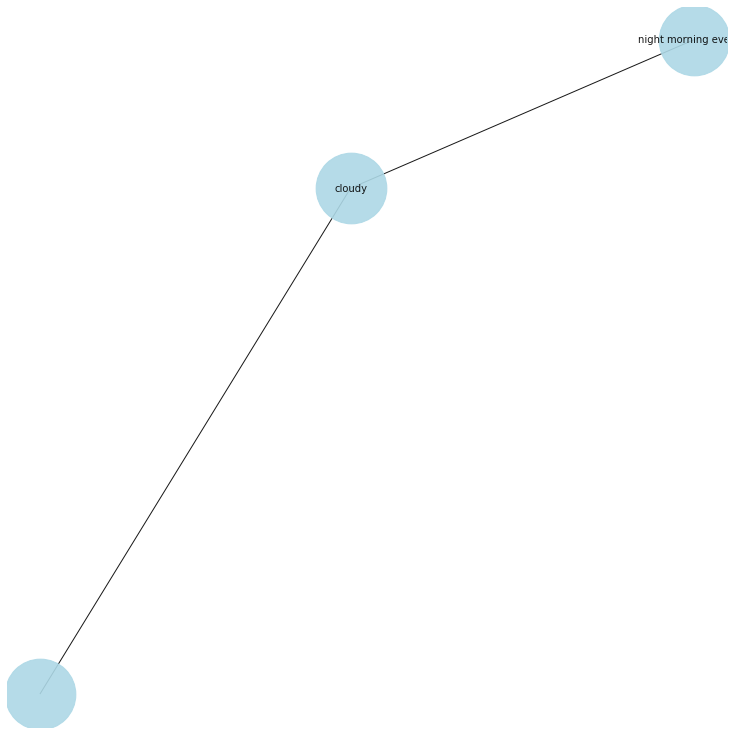

Mostly cloudy starting in the morning and breezy in the evening.
Mostly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy starting , morning evening


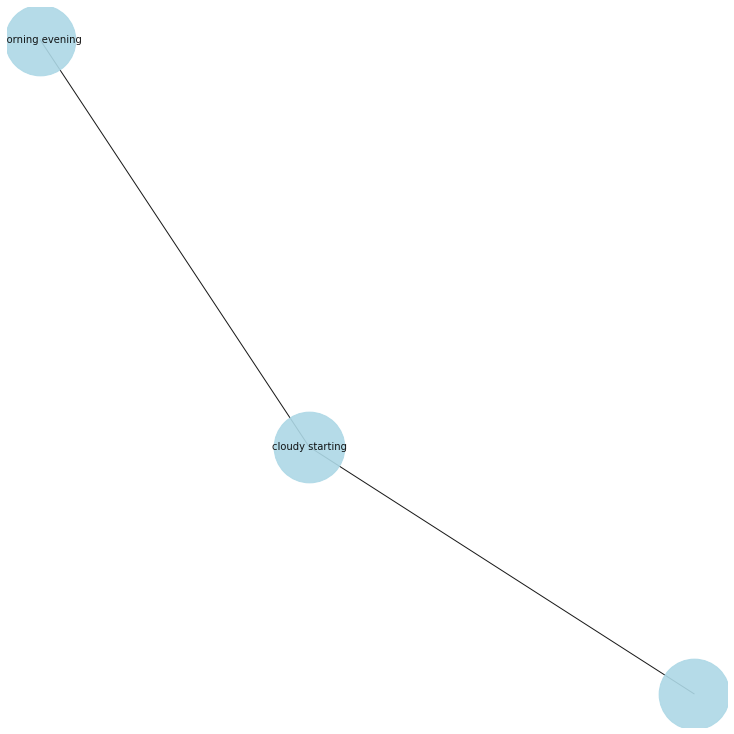

Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.
Breezy -> nsubj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
partly -> advmod
cloudy -> conj
starting -> dep
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Breezy , continue , morning evening


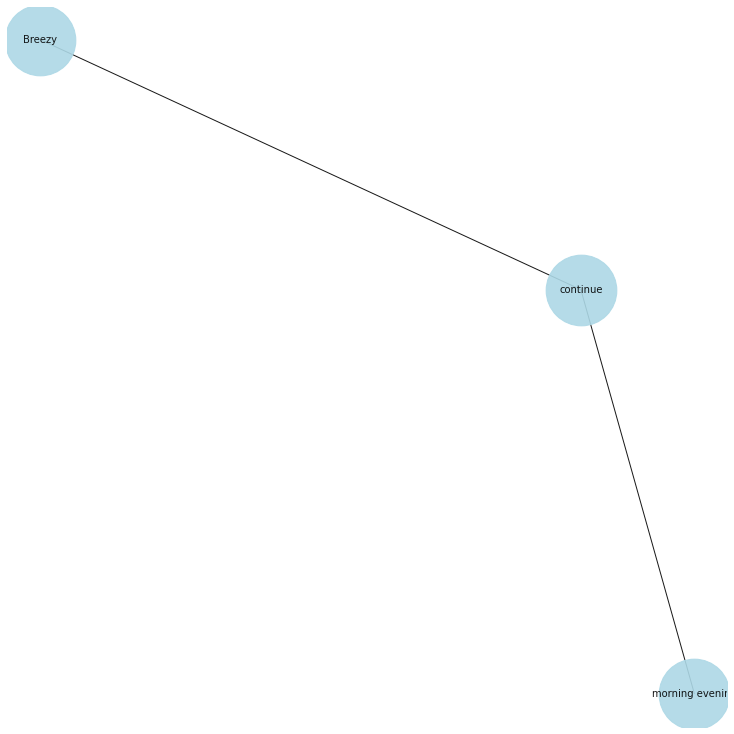

Partly cloudy starting overnight continuing until evening and windy starting in the morning continuing until evening.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
windy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , evening morning evening


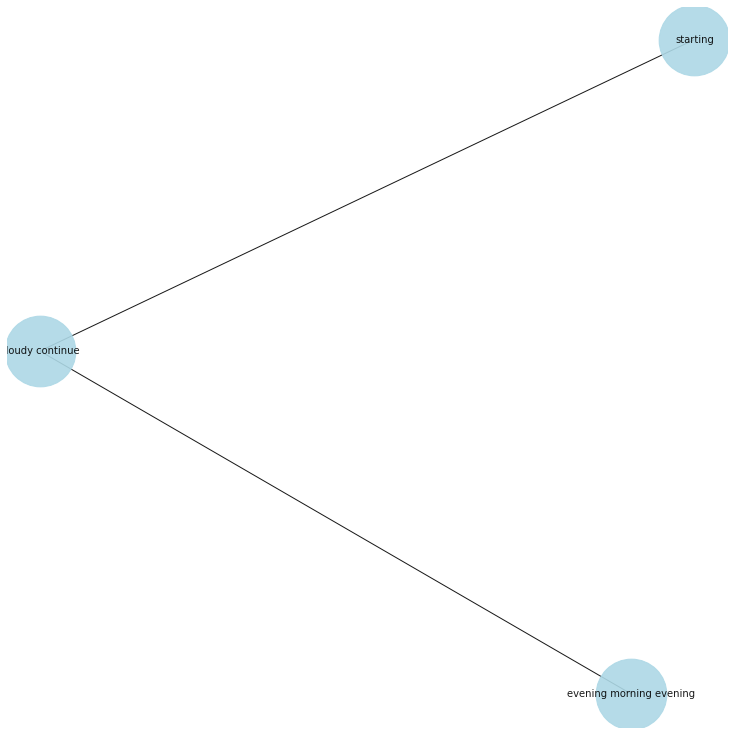

Breezy starting in the morning continuing until night.
Breezy -> nsubj
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Breezy , continue , morning night


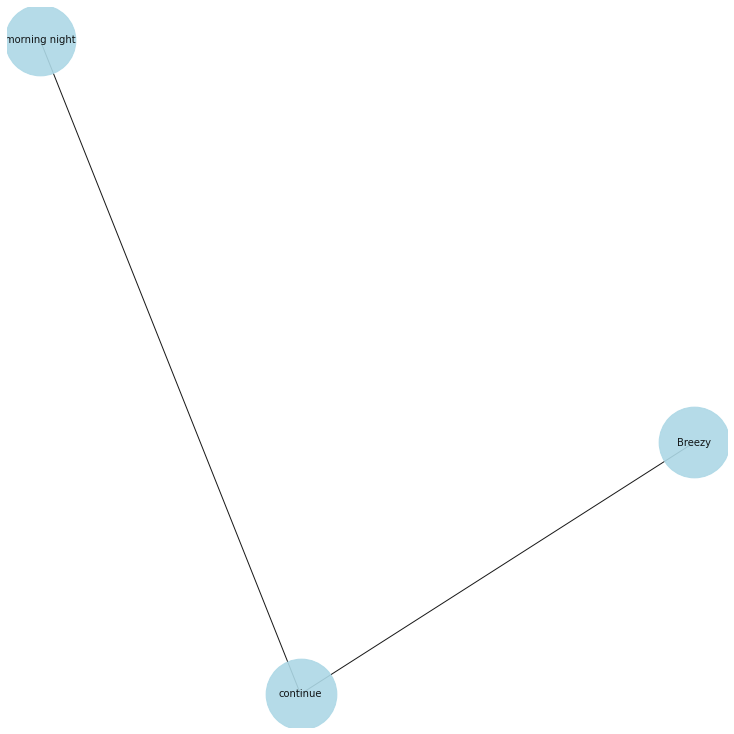

Overcast throughout the day and breezy starting in the morning continuing until evening.
Overcast -> nsubj
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Overcast , continue , day morning evening


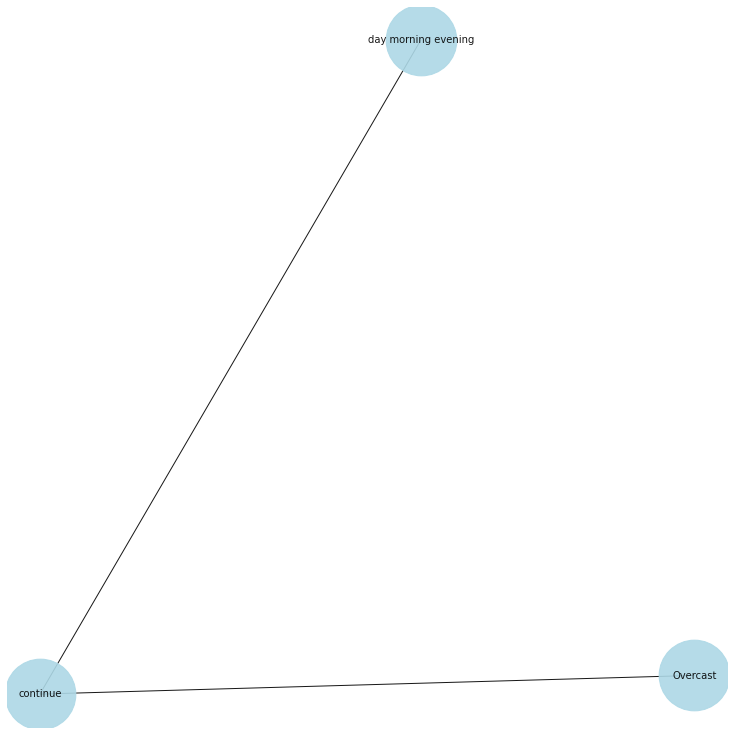

Mostly cloudy until evening and breezy in the afternoon.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , evening afternoon


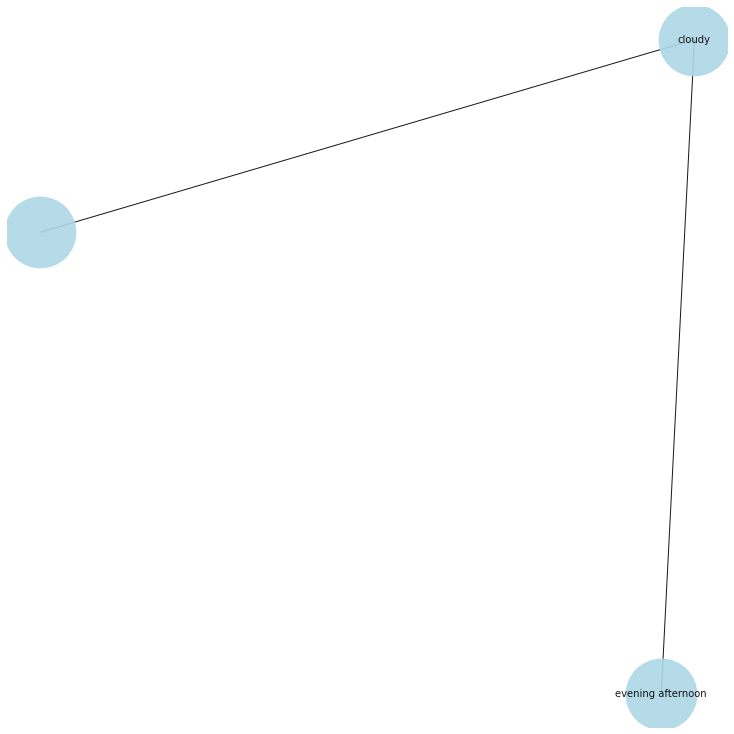

Partly cloudy starting overnight and breezy starting in the evening.
Partly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy start , evening


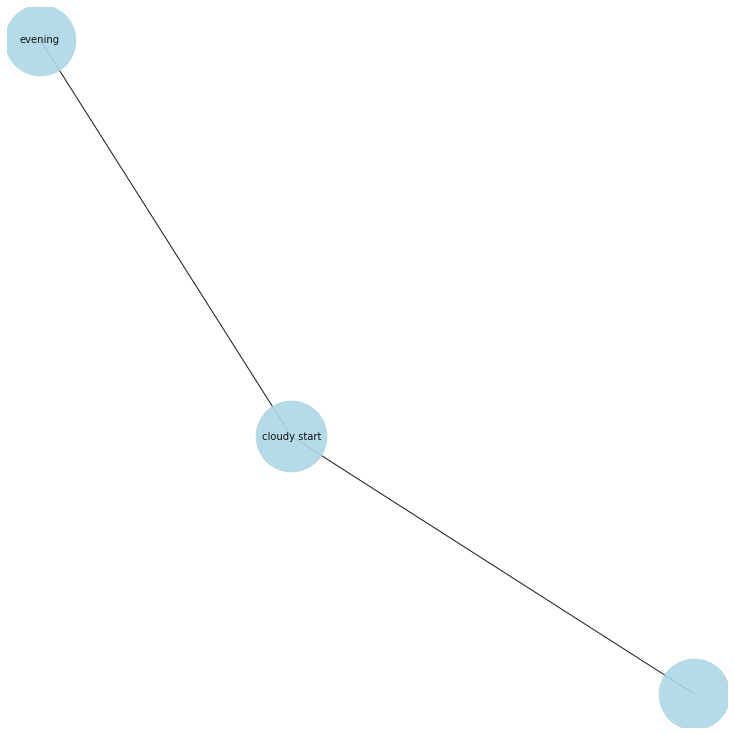

Light rain overnight.
Light -> nsubj
rain -> ROOT
overnight -> advmod
. -> punct
Light , rain , 


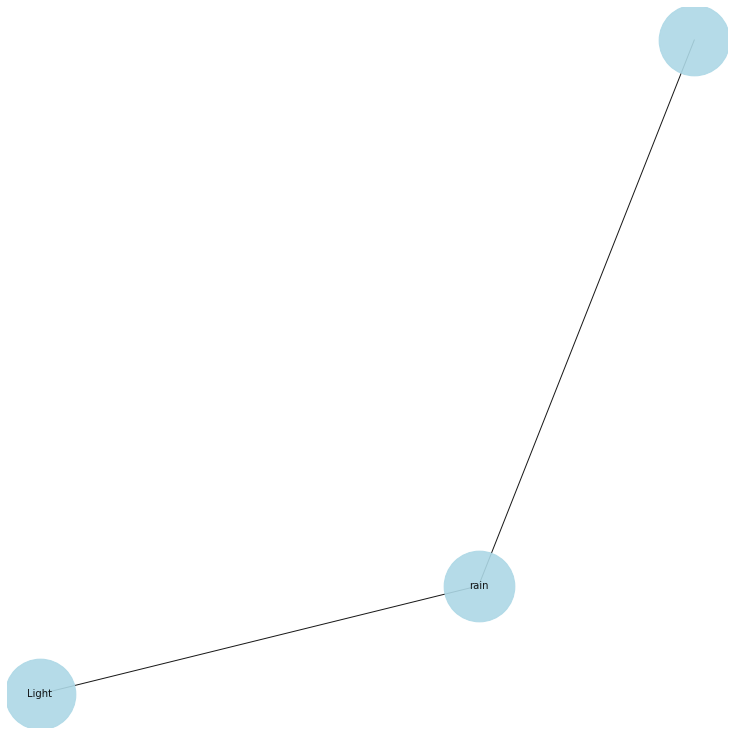

Breezy and foggy until morning.
Breezy -> ROOT
and -> cc
foggy -> conj
until -> prep
morning -> pobj
. -> punct
 , breezy , morning


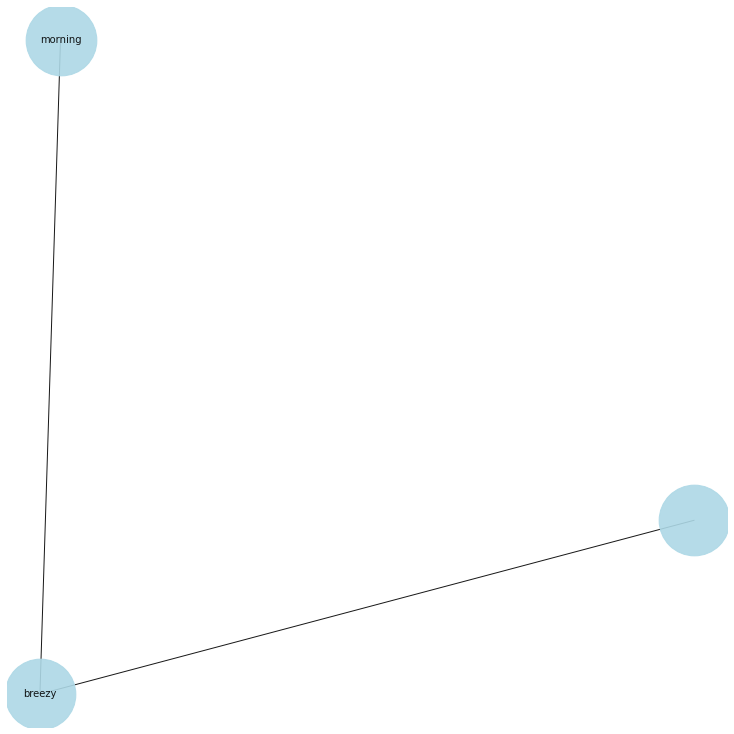

Foggy overnight and breezy in the morning.
Foggy -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , Foggy , morning


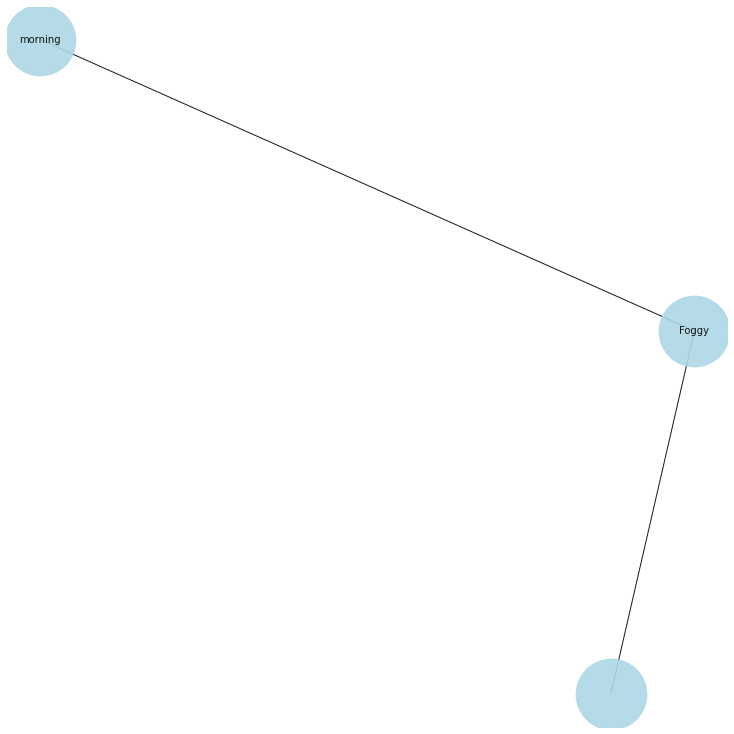

Breezy in the morning and foggy in the evening.
Breezy -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
foggy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , breezy , morning evening


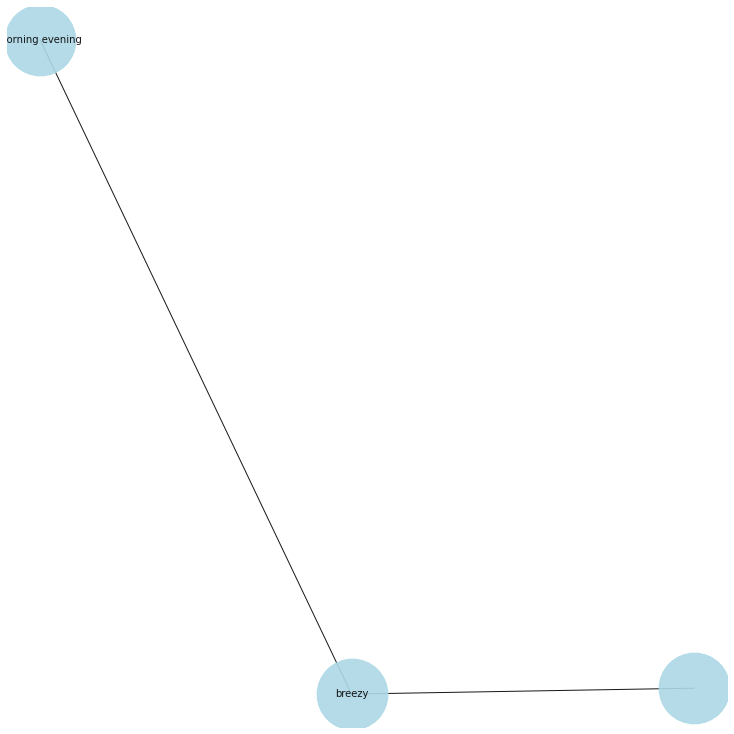

Partly cloudy starting in the morning and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
 , cloudy starting , morning morning afternoon


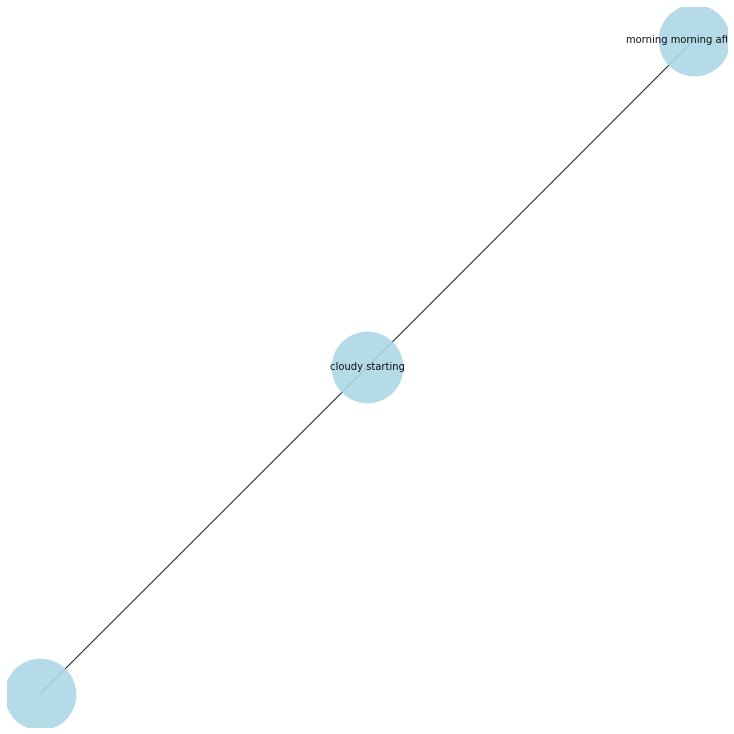

Breezy and mostly cloudy overnight.
Breezy -> ROOT
and -> cc
mostly -> advmod
cloudy -> conj
overnight -> advmod
. -> punct
 , breezy , 


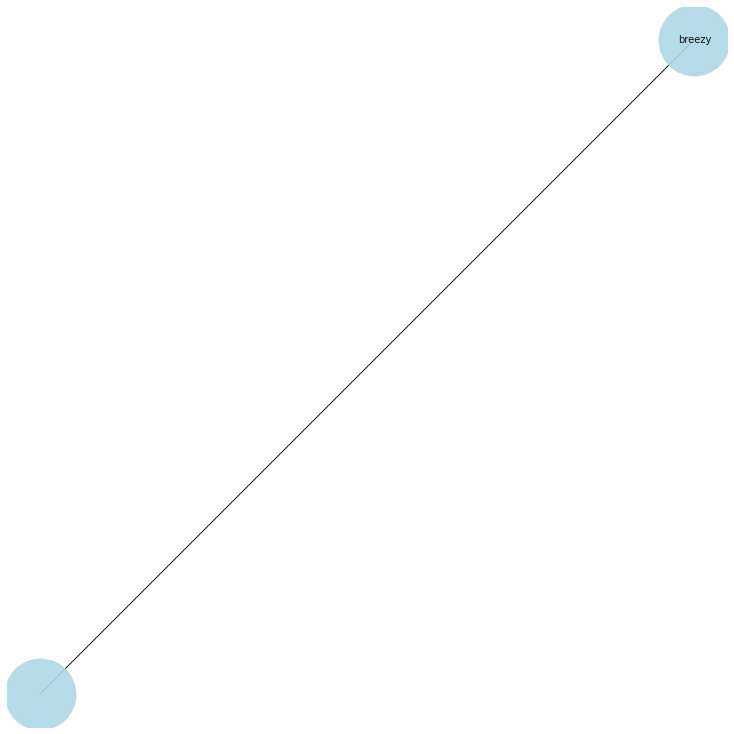

Breezy in the morning and mostly cloudy starting in the morning.
Breezy -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
starting -> acl
in -> prep
the -> det
morning -> pobj
. -> punct
 , breezy , morning morning


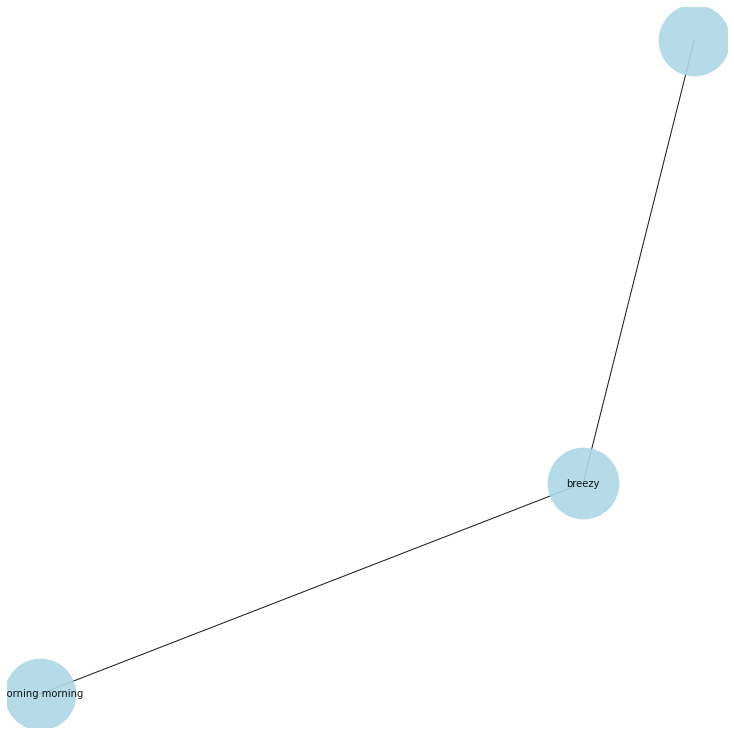

Partly cloudy throughout the day and breezy in the afternoon.
Partly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , day afternoon


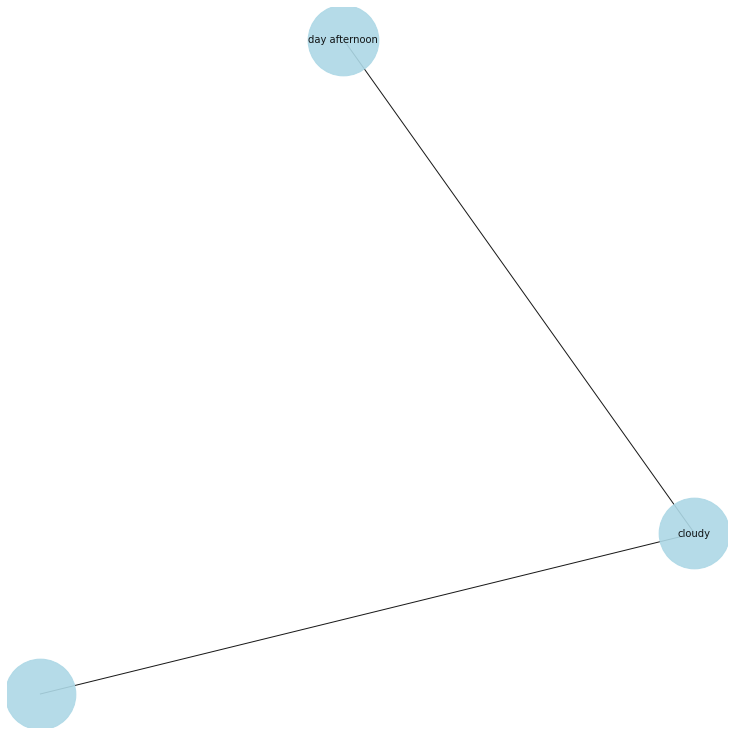

Mostly cloudy starting in the morning continuing until afternoon.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , morning afternoon


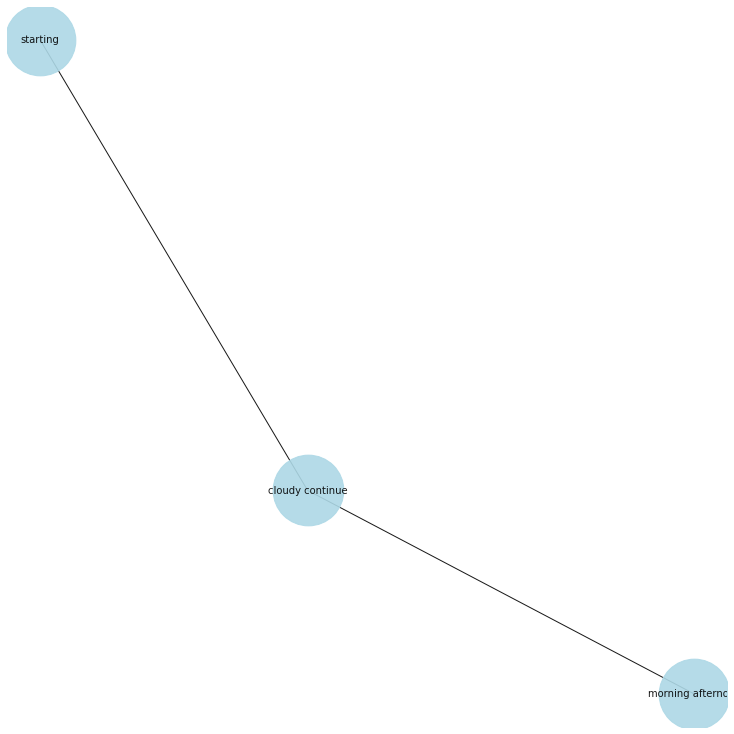

Breezy until afternoon and overcast throughout the day.
Breezy -> ROOT
until -> prep
afternoon -> pobj
and -> cc
overcast -> conj
throughout -> prep
the -> det
day -> pobj
. -> punct
 , breezy , afternoon day


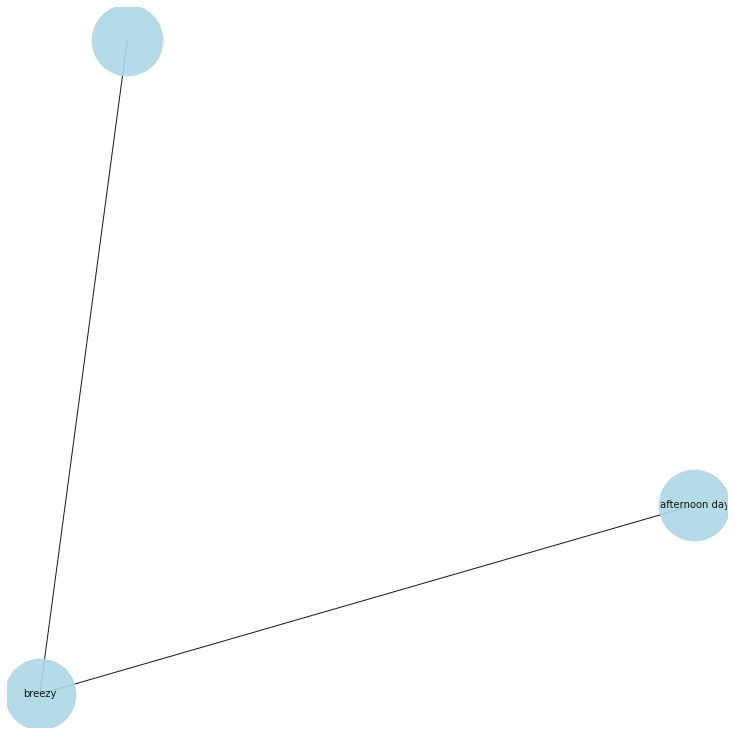

Mostly cloudy starting overnight continuing until night and breezy starting in the morning continuing until evening.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
starting , cloudy continue , night morning evening


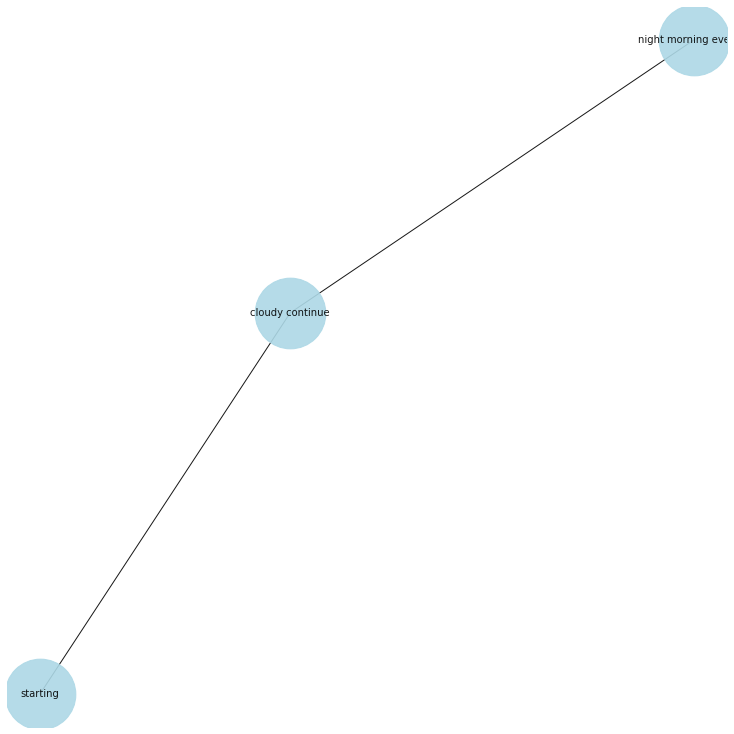

Breezy starting overnight continuing until morning and foggy overnight.
Breezy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
foggy -> conj
overnight -> advmod
. -> punct
 , breezy , morning


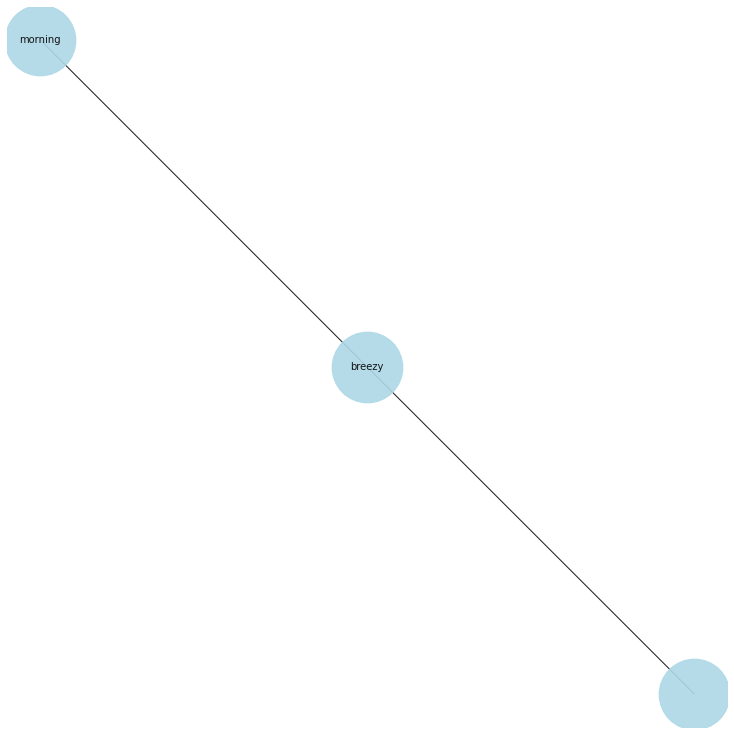

Foggy in the morning and breezy starting in the afternoon continuing until night.
Foggy -> nsubj
in -> prep
the -> det
morning -> pobj
and -> cc
breezy -> conj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Foggy , continue , morning afternoon night


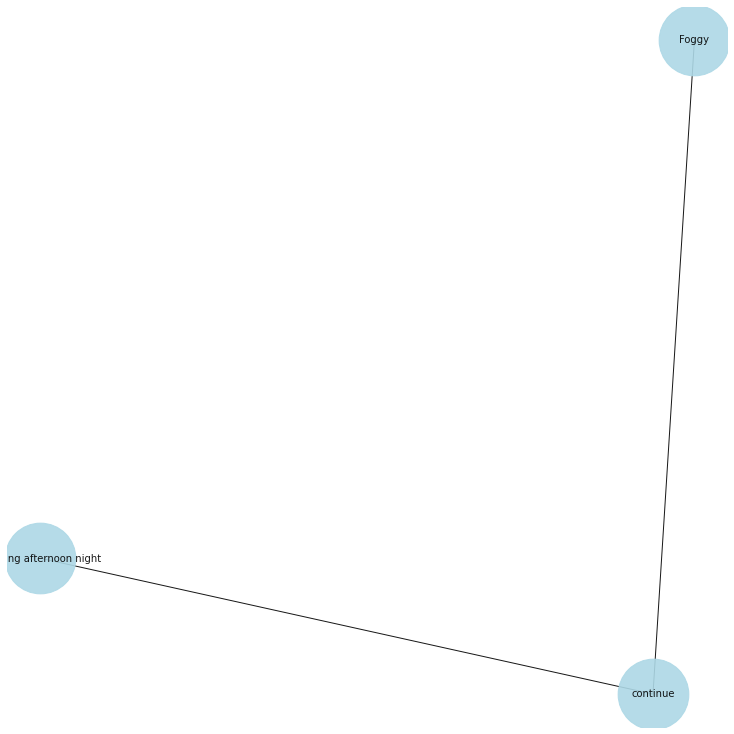

Foggy starting in the afternoon and breezy starting in the afternoon continuing until evening.
Foggy -> nsubj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Foggy , continue , afternoon afternoon evening


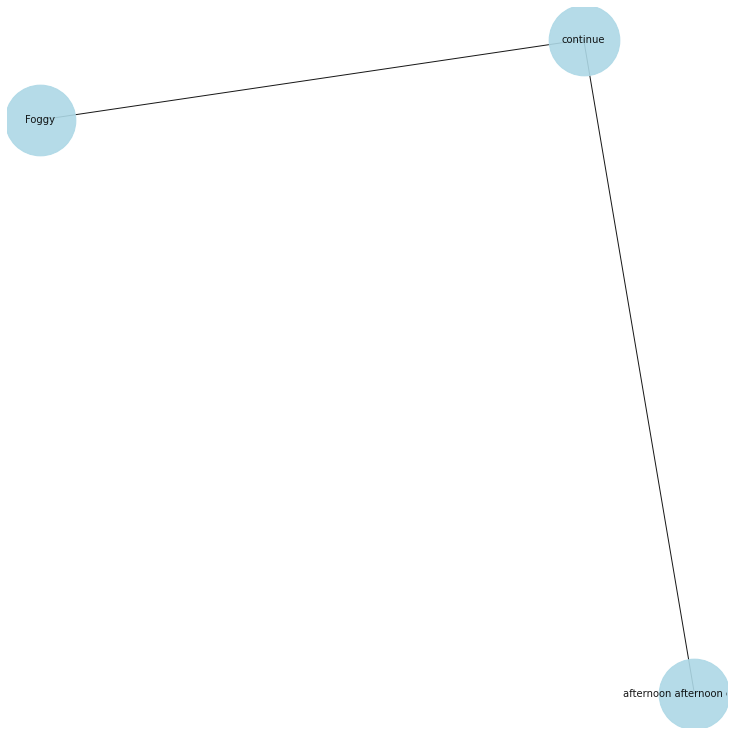

Drizzle starting in the evening.
Drizzle -> ROOT
starting -> acl
in -> prep
the -> det
evening -> pobj
. -> punct
 , Drizzle , evening


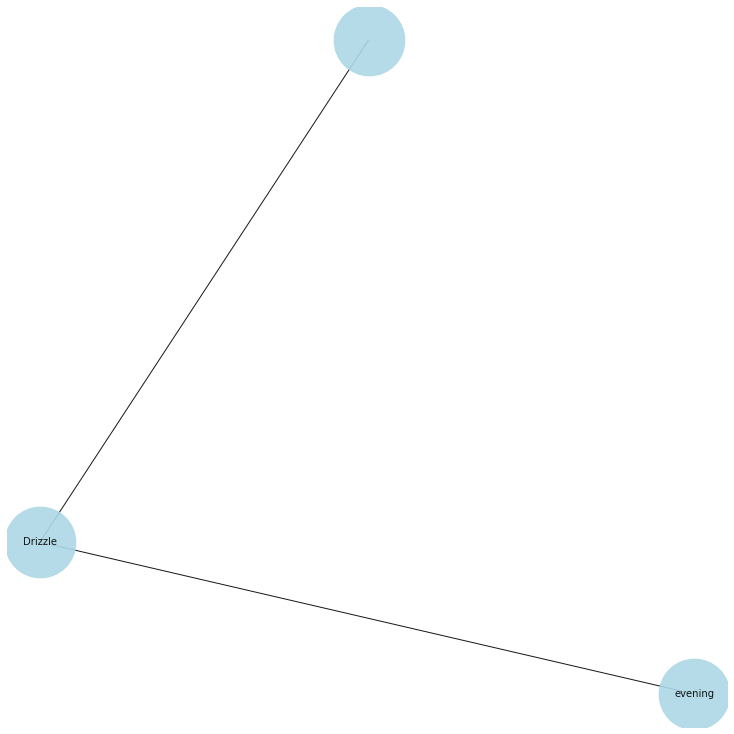

Light rain starting overnight.
Light -> amod
rain -> ROOT
starting -> acl
overnight -> advmod
. -> punct
 , light rain , 


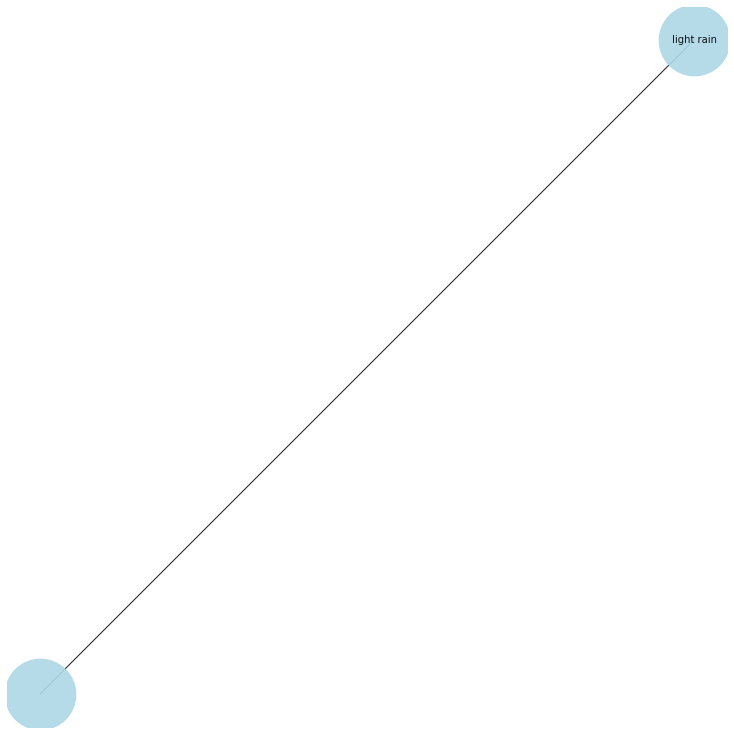

Breezy starting overnight continuing until afternoon and mostly cloudy starting overnight continuing until evening.
Breezy -> nsubj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
and -> cc
mostly -> advmod
cloudy -> conj
starting -> dep
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
. -> punct
Breezy , continue , afternoon evening


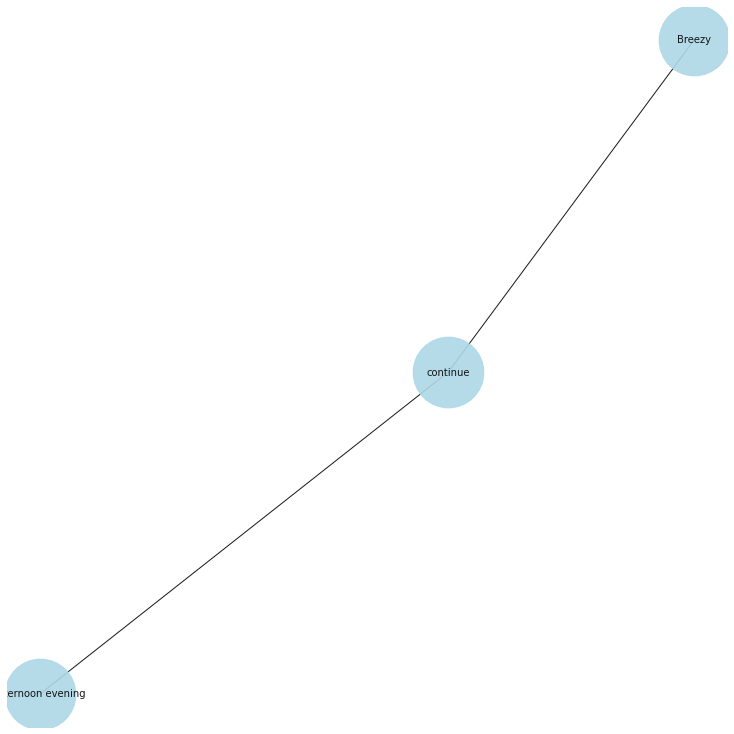

Overcast starting in the afternoon.
Overcast -> ROOT
starting -> acl
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , overcast , afternoon


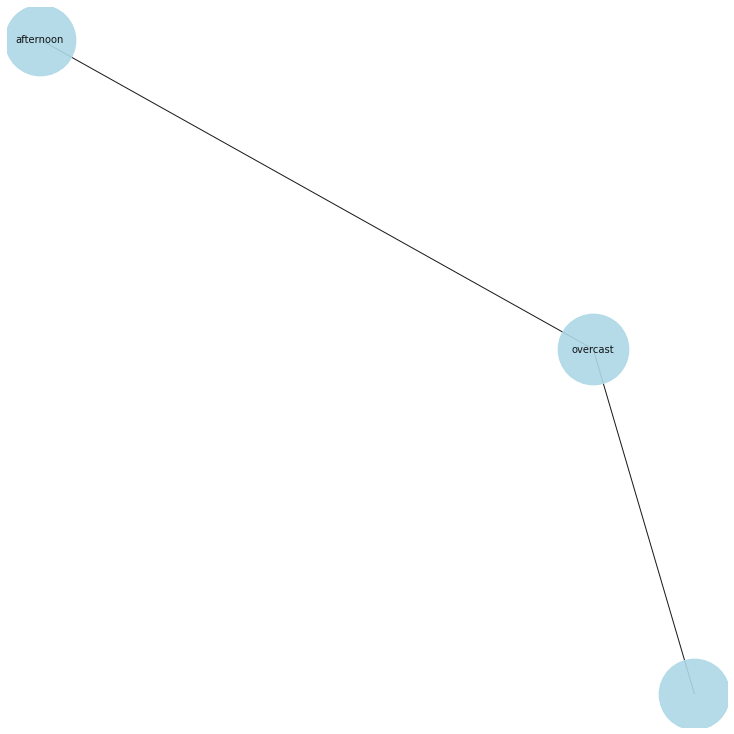

Partly cloudy until evening and breezy overnight.
Partly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
overnight -> advmod
. -> punct
 , cloudy , evening


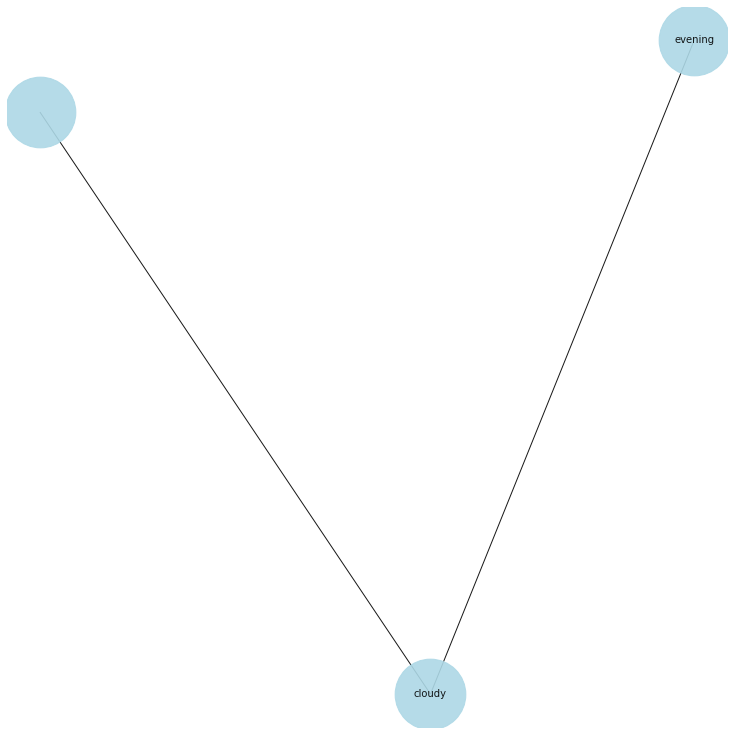

Light rain in the morning.
Light -> amod
rain -> ROOT
in -> prep
the -> det
morning -> pobj
. -> punct
 , light rain , morning


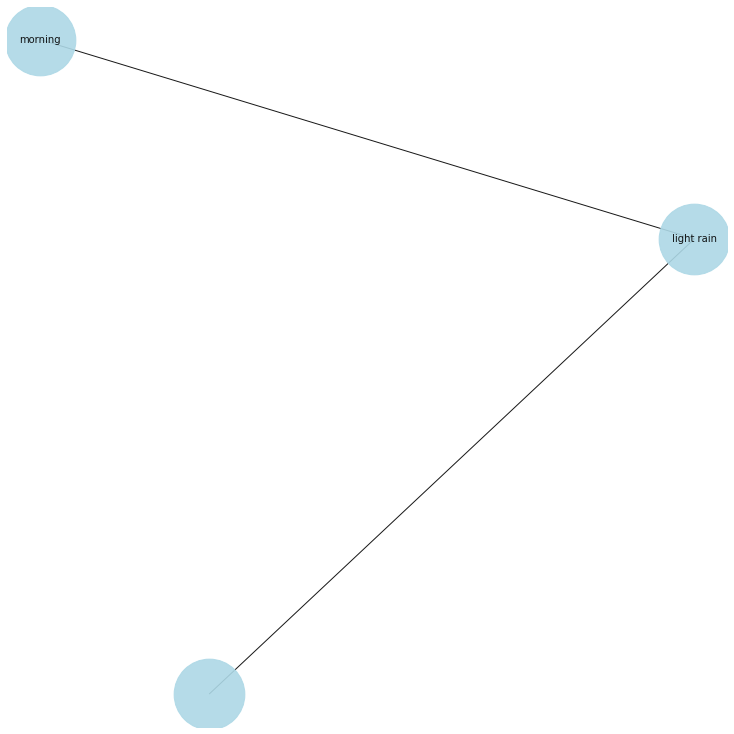

Light rain in the morning and afternoon.
Light -> amod
rain -> ROOT
in -> prep
the -> det
morning -> pobj
and -> cc
afternoon -> conj
. -> punct
 , light rain , morning


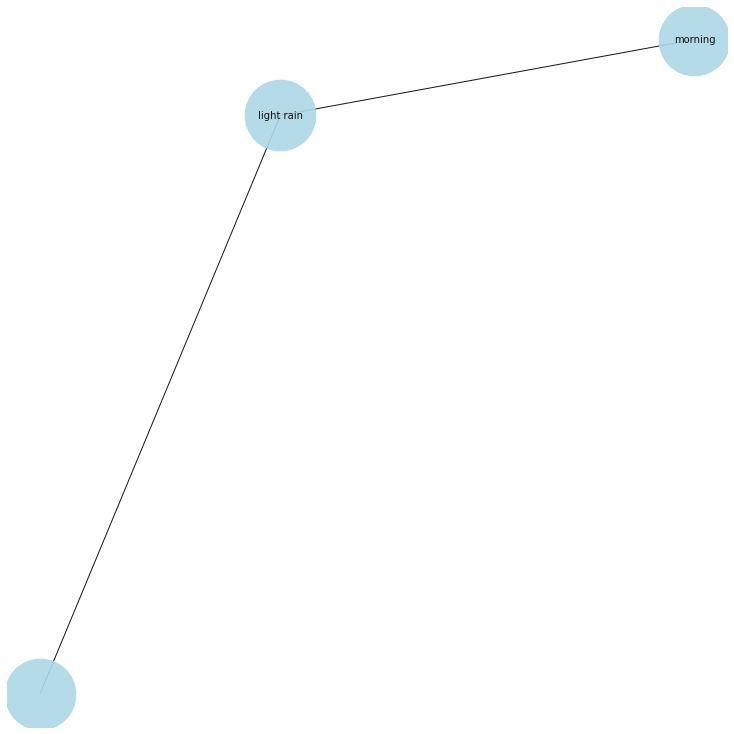

Overcast throughout the day and breezy starting overnight continuing until afternoon.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
 , overcast , day afternoon


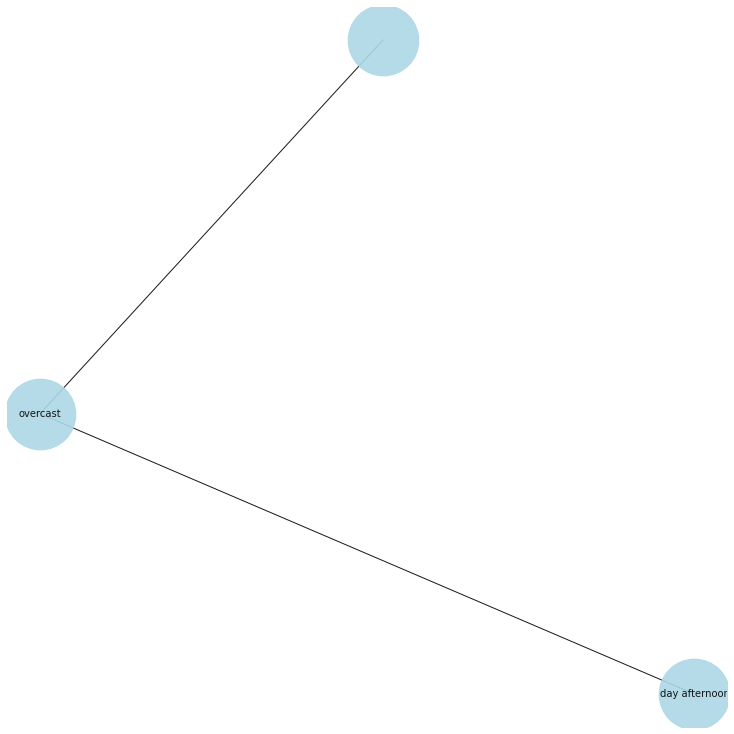

Foggy starting overnight continuing until morning and breezy starting in the evening continuing until night.
Foggy -> nsubj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Foggy , continue , morning evening night


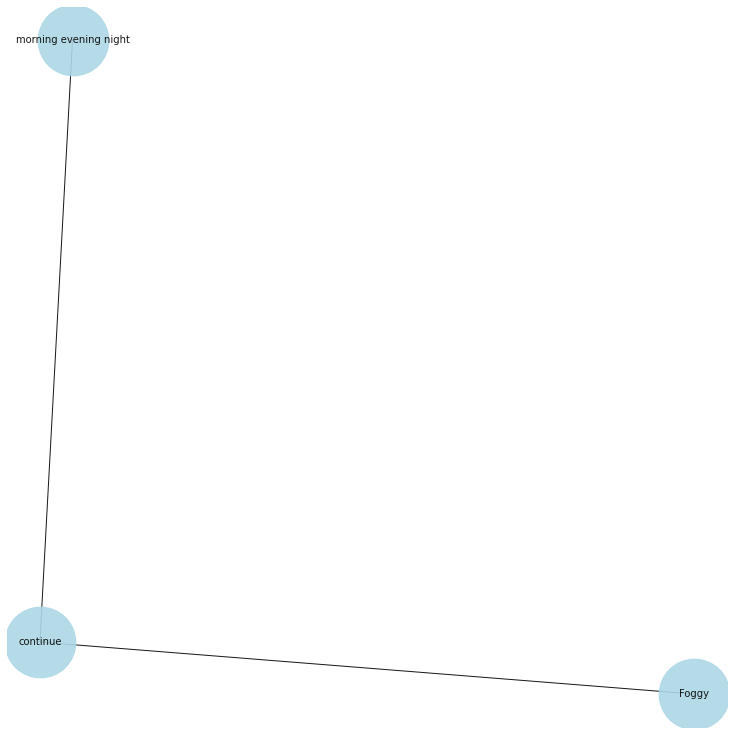

Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.
Mostly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
starting -> advcl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
starting , cloudy continue , evening morning


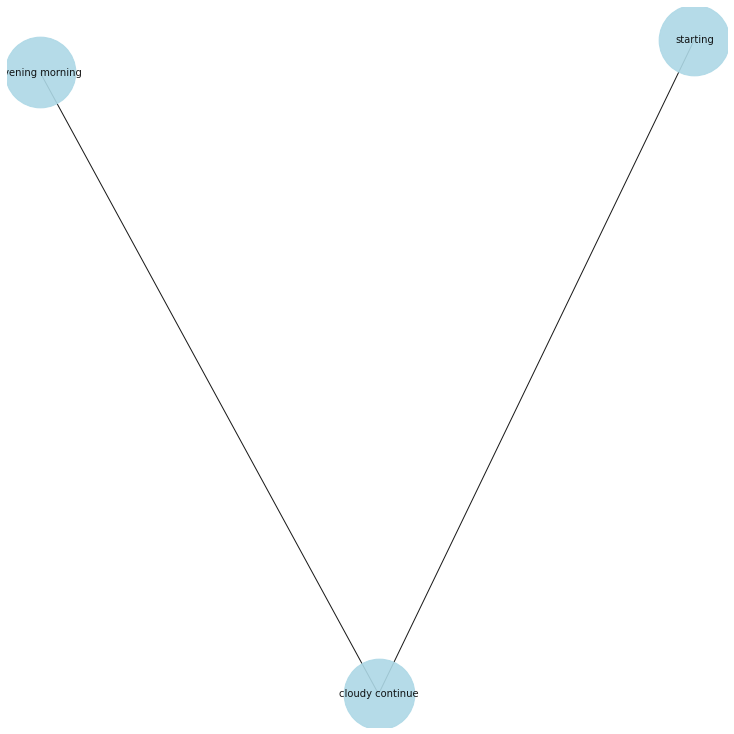

Breezy starting overnight continuing until morning and foggy in the evening.
Breezy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
and -> cc
foggy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , breezy , morning evening


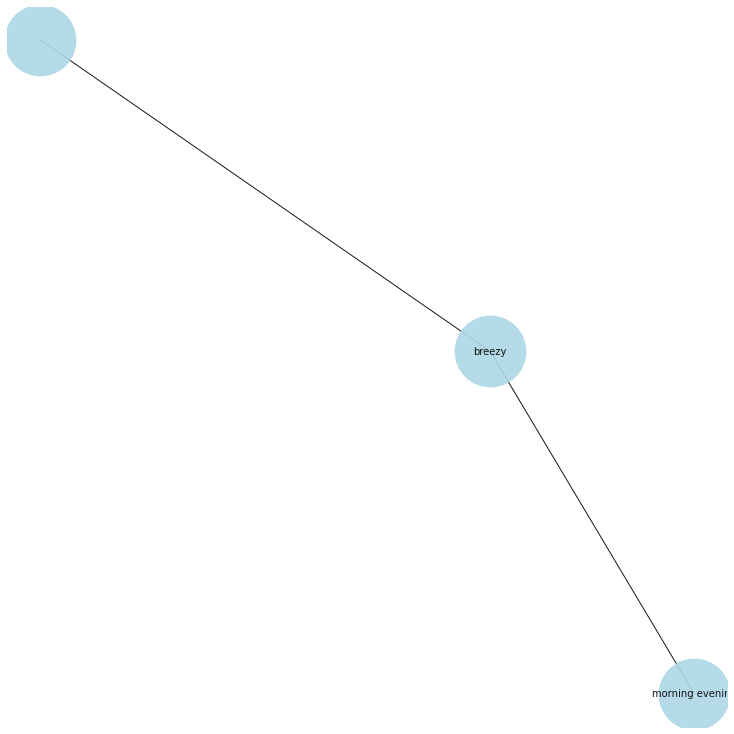

Mostly cloudy until night and breezy starting in the afternoon continuing until night.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
 , cloudy , night afternoon night


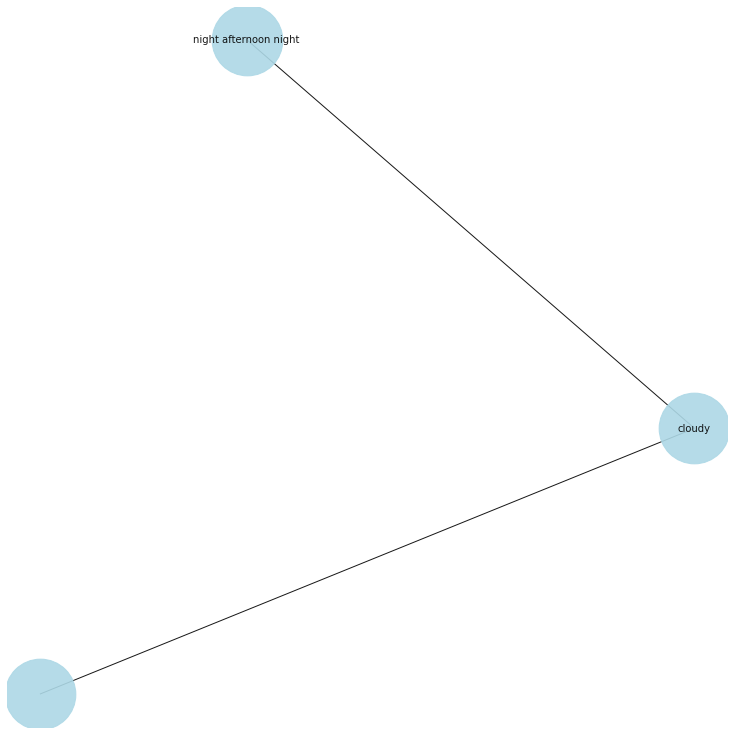

Rain until afternoon.
Rain -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , rain , afternoon


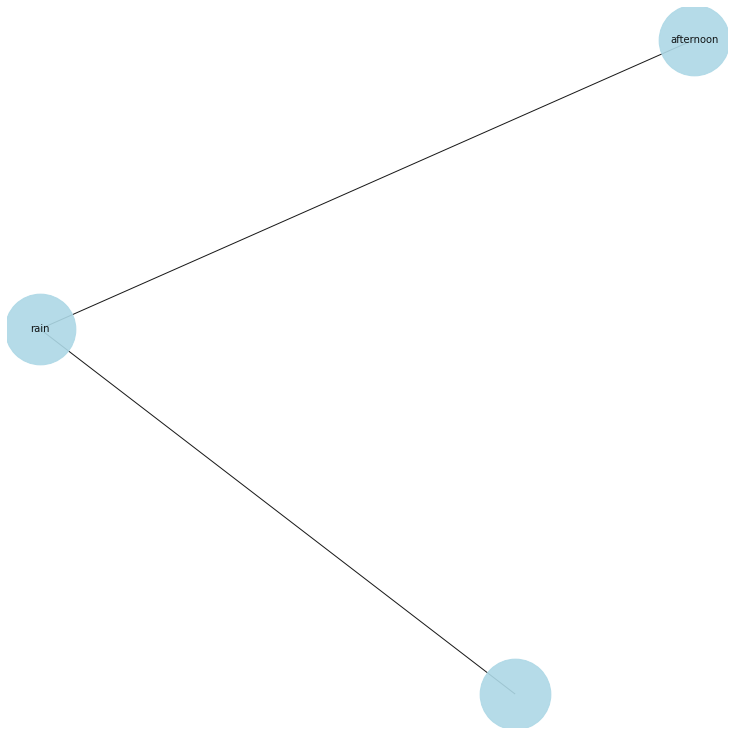

Partly cloudy starting overnight continuing until evening and breezy in the morning.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
starting , cloudy continue , evening morning


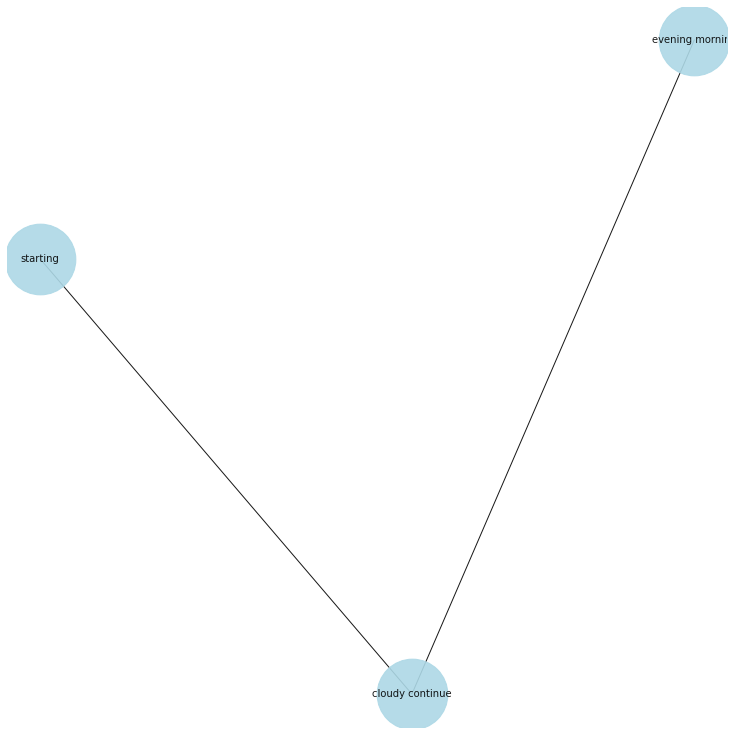

Breezy until evening and foggy in the morning.
Breezy -> ROOT
until -> prep
evening -> pobj
and -> cc
foggy -> conj
in -> prep
the -> det
morning -> pobj
. -> punct
 , breezy , evening morning


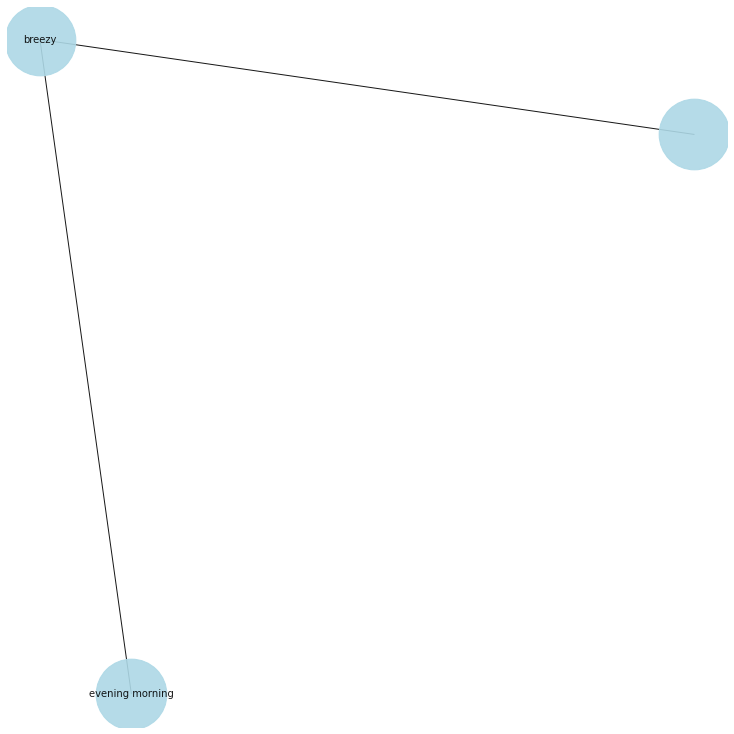

Partly cloudy starting overnight continuing until evening and breezy in the evening.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
starting , cloudy continue , evening evening


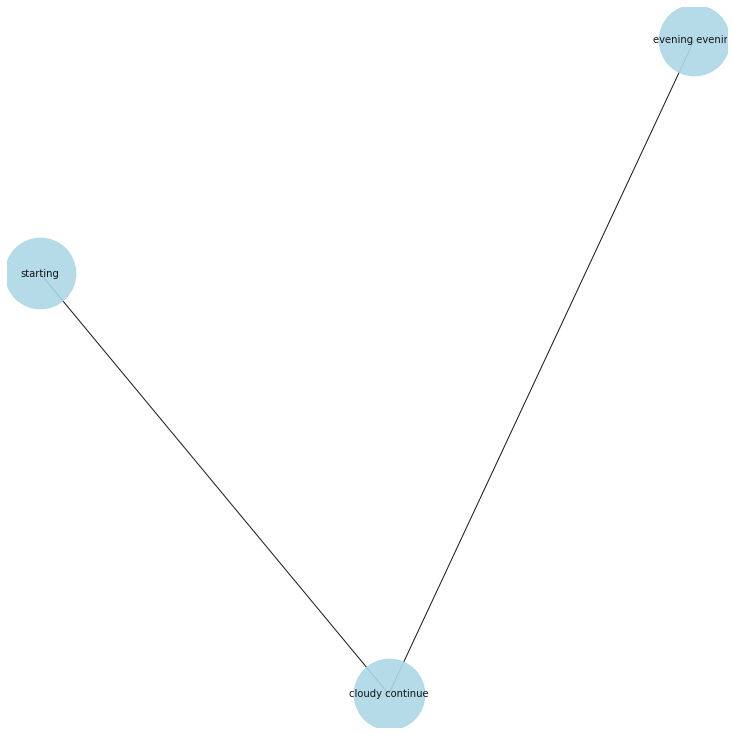

Breezy and partly cloudy in the afternoon.
Breezy -> ROOT
and -> cc
partly -> advmod
cloudy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , breezy , afternoon


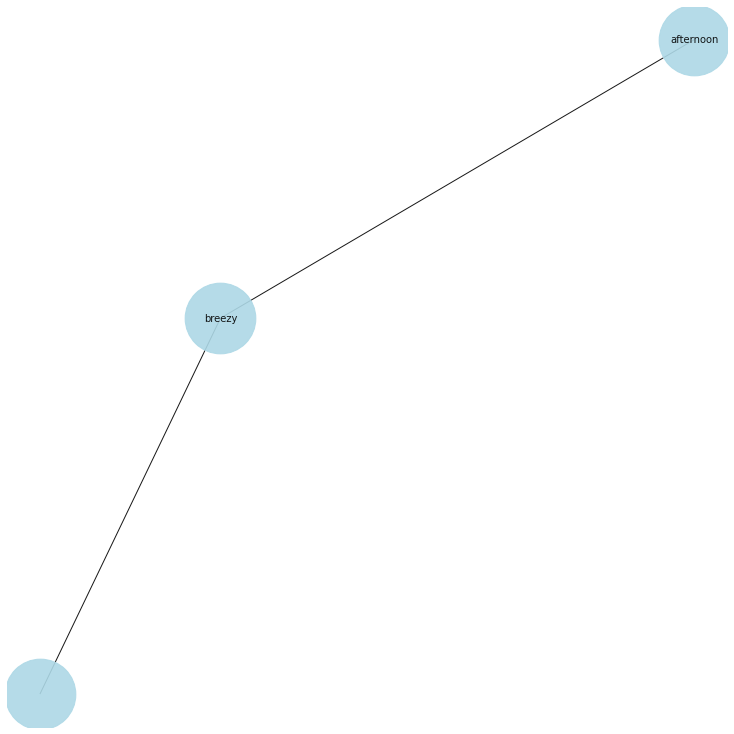

Partly cloudy starting overnight continuing until night and windy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
and -> cc
windy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> advcl
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , night morning afternoon


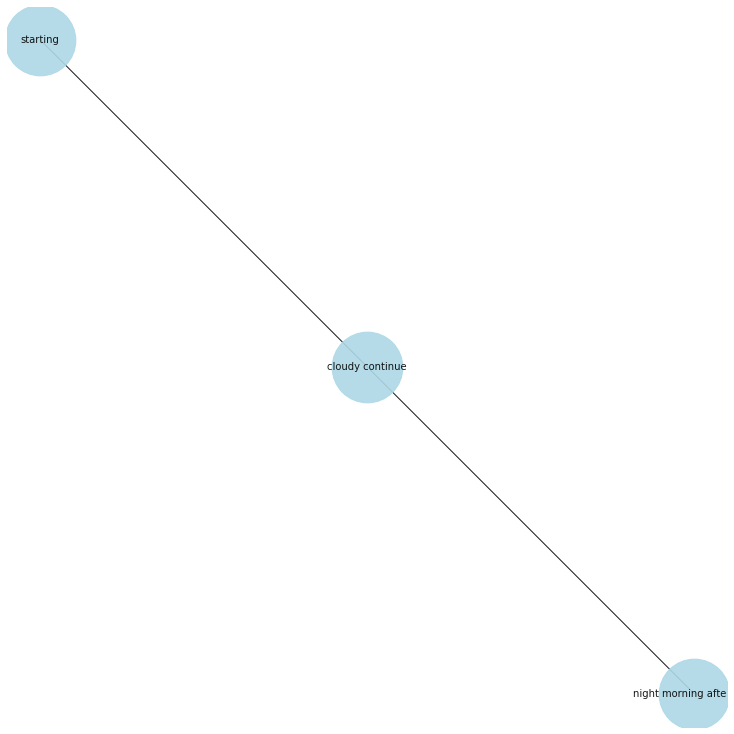

Partly cloudy starting overnight and breezy in the afternoon.
Partly -> advmod
cloudy -> amod
starting -> ROOT
overnight -> advmod
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy start , afternoon


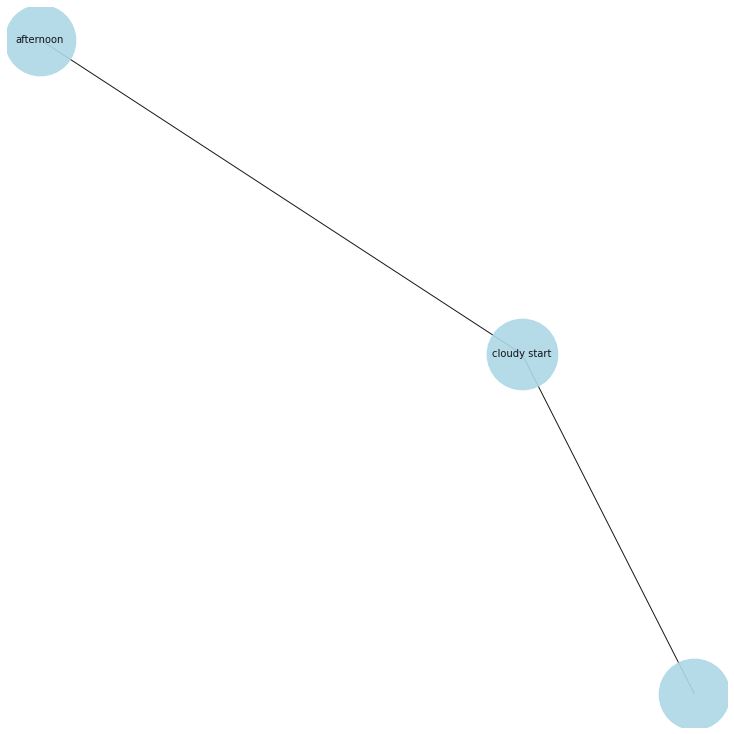

Partly cloudy until night and breezy in the afternoon.
Partly -> advmod
cloudy -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy , night afternoon


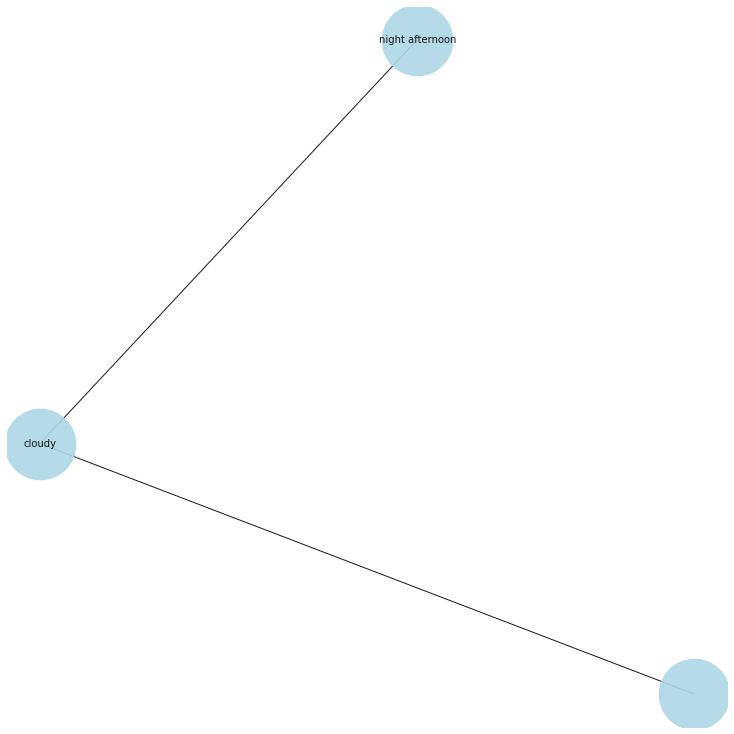

Partly cloudy starting in the morning continuing until night and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> ROOT
in -> prep
the -> det
morning -> pobj
continuing -> xcomp
until -> prep
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
 , cloudy starting , morning night morning afternoon


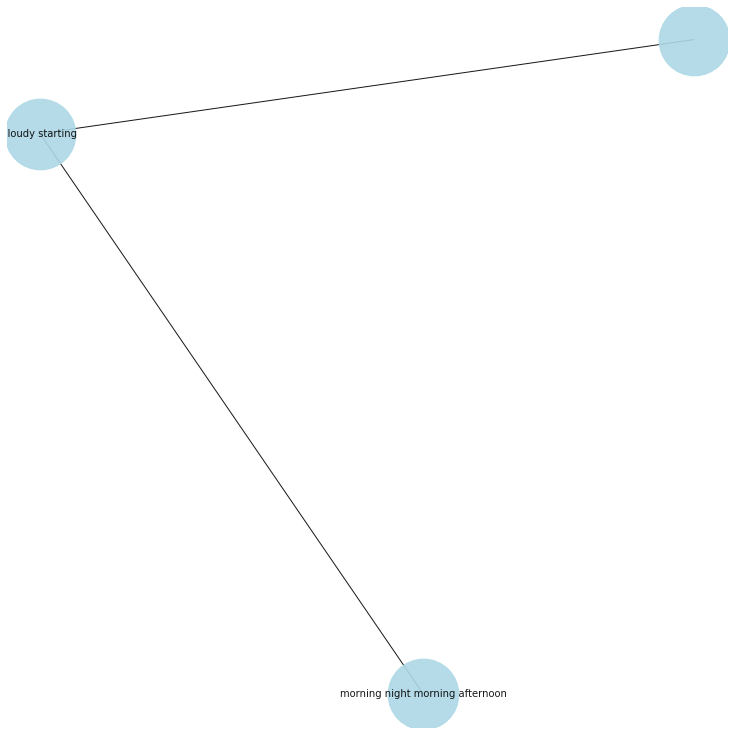

Foggy starting in the morning continuing until afternoon and breezy starting in the evening.
Foggy -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> acl
until -> prep
afternoon -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
 , Foggy , morning afternoon evening


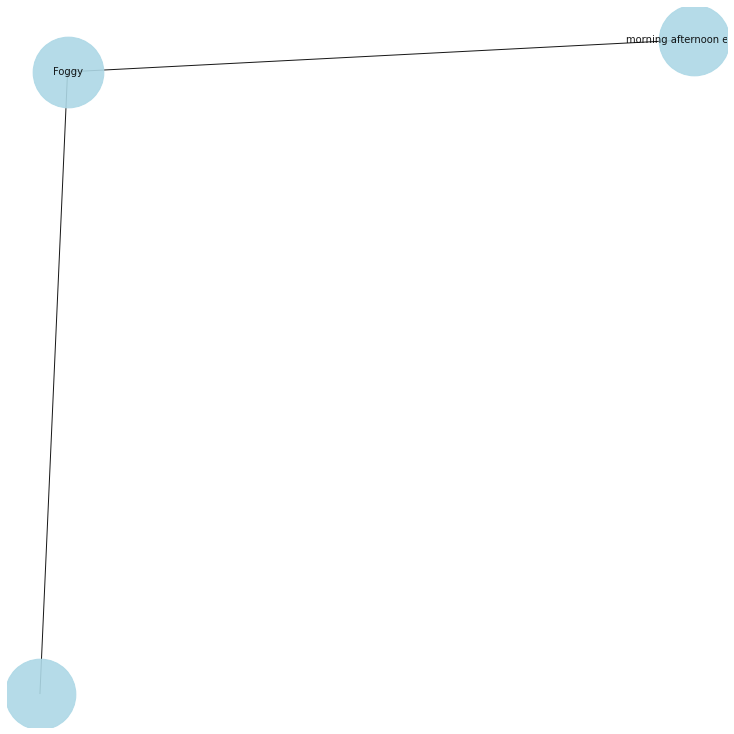

Mostly cloudy until night and breezy starting in the afternoon continuing until evening.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
afternoon -> pobj
continuing -> advcl
until -> prep
evening -> pobj
. -> punct
 , cloudy , night afternoon evening


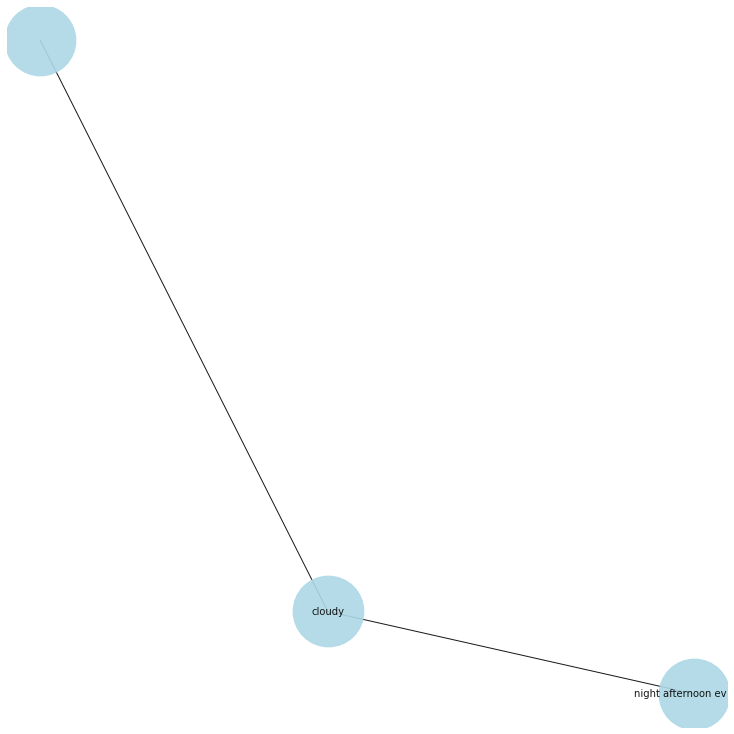

Partly cloudy starting overnight continuing until night and breezy in the afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
night -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
starting , cloudy continue , night afternoon


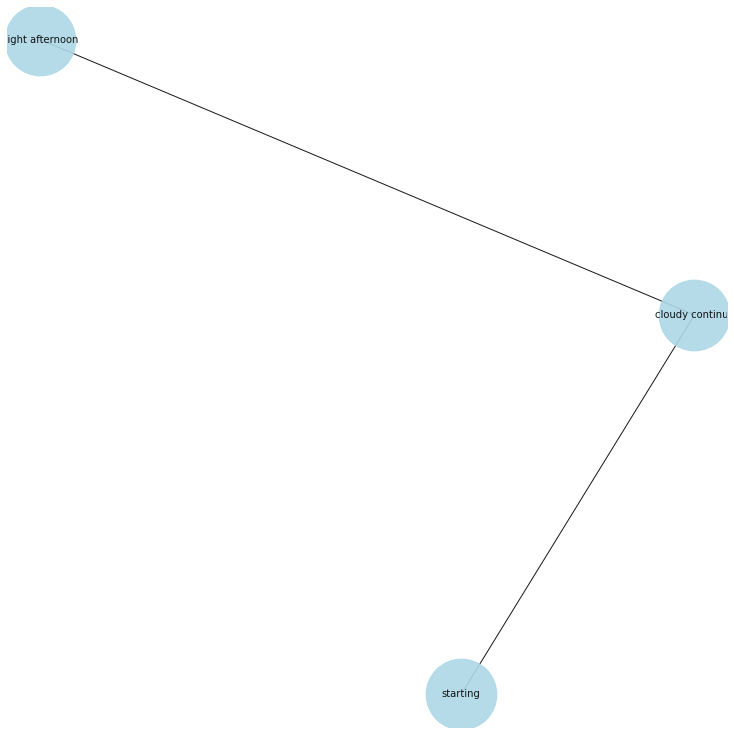

Partly cloudy starting overnight continuing until morning and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
overnight -> advmod
continuing -> ROOT
until -> prep
morning -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
starting , cloudy continue , morning morning afternoon


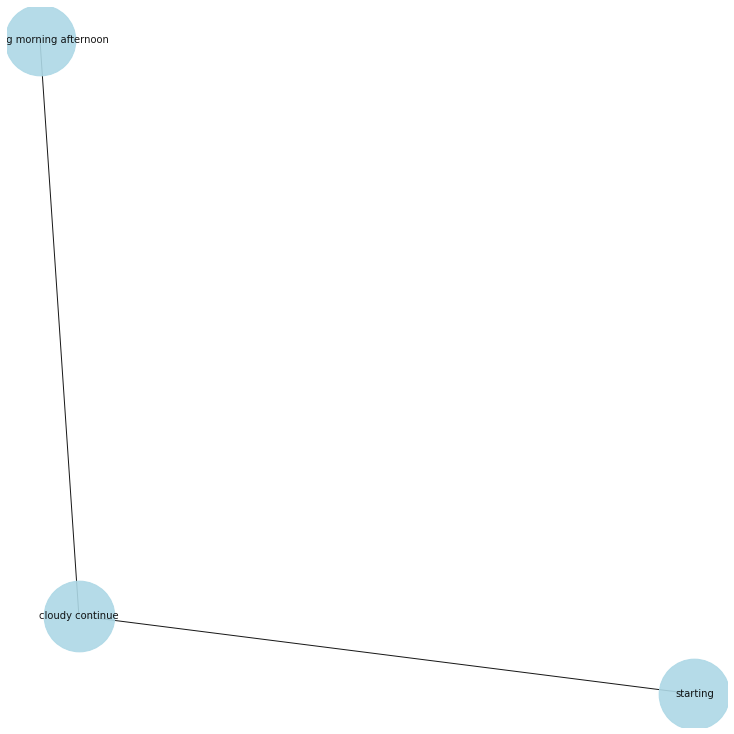

Mostly cloudy until night and breezy starting in the evening continuing until night.
Mostly -> advmod
cloudy -> ROOT
until -> mark
night -> pobj
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
continuing -> advcl
until -> prep
night -> pobj
. -> punct
 , cloudy , night evening night


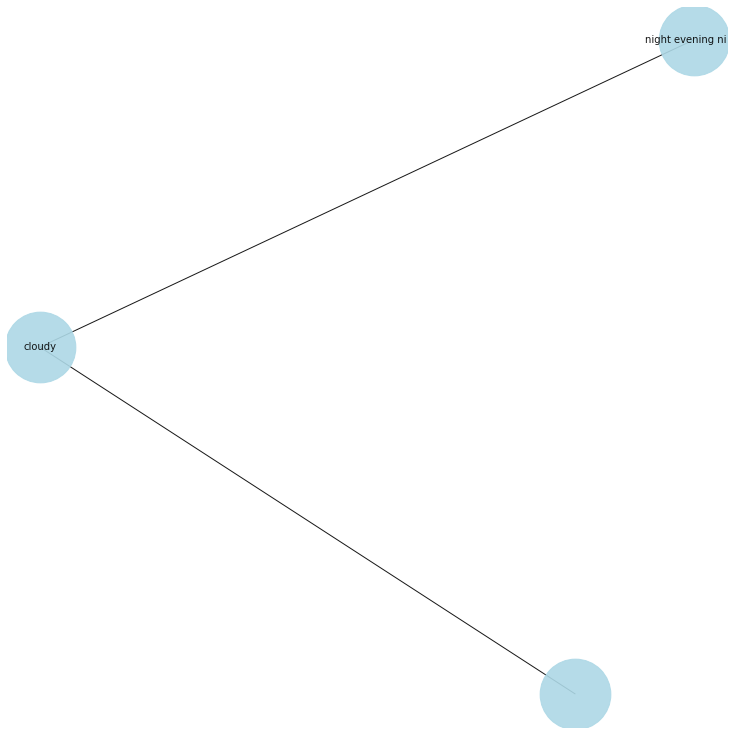

Breezy starting in the afternoon continuing until evening and foggy starting in the evening.
Breezy -> nsubj
starting -> acl
in -> prep
the -> det
afternoon -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
foggy -> conj
starting -> advcl
in -> prep
the -> det
evening -> pobj
. -> punct
Breezy , continue , afternoon evening evening


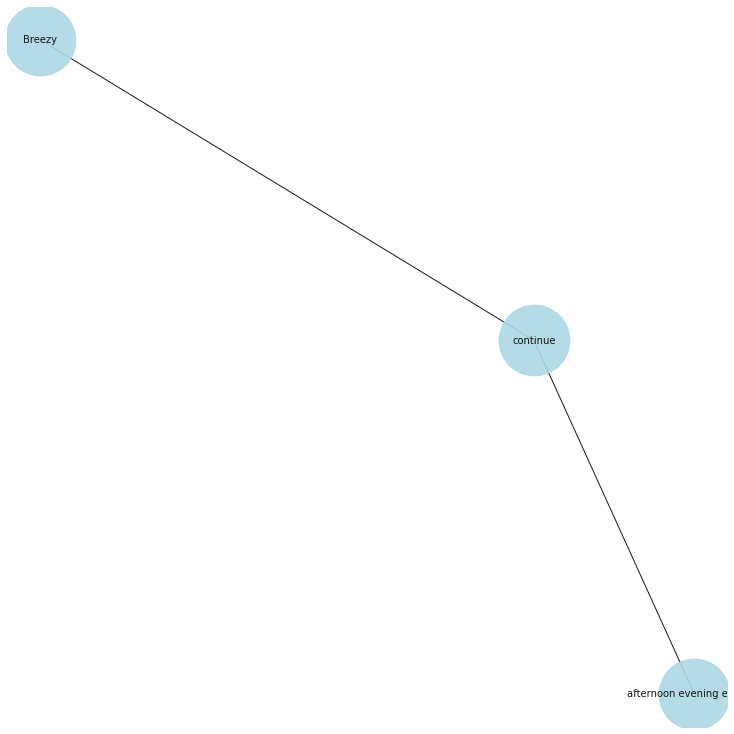

Overcast throughout the day and breezy starting overnight continuing until morning.
Overcast -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
 , overcast , day morning


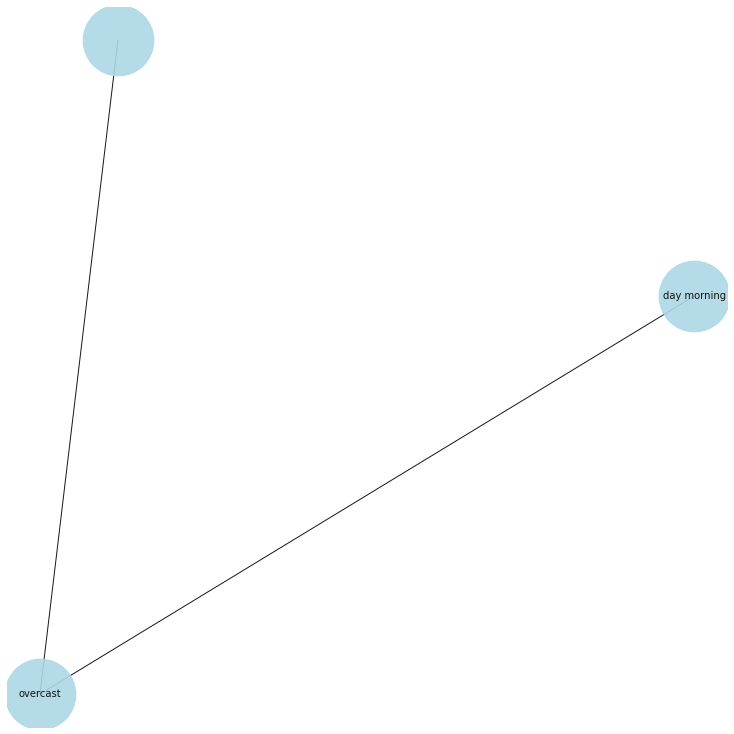

Breezy overnight and partly cloudy throughout the day.
Breezy -> ROOT
overnight -> advmod
and -> cc
partly -> advmod
cloudy -> conj
throughout -> prep
the -> det
day -> pobj
. -> punct
 , breezy , day


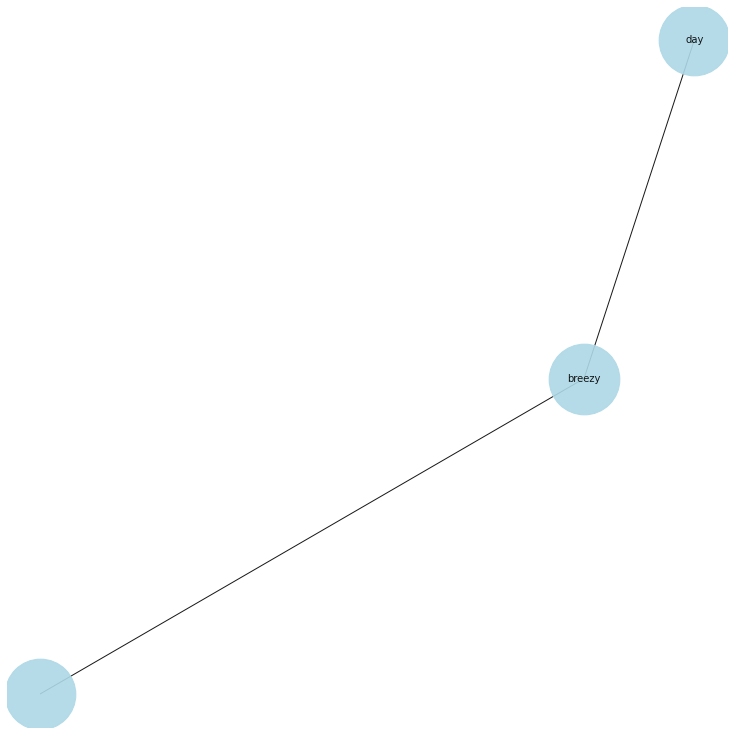

Breezy overnight and partly cloudy until evening.
Breezy -> ROOT
overnight -> advmod
and -> cc
partly -> advmod
cloudy -> conj
until -> prep
evening -> pobj
. -> punct
 , breezy , evening


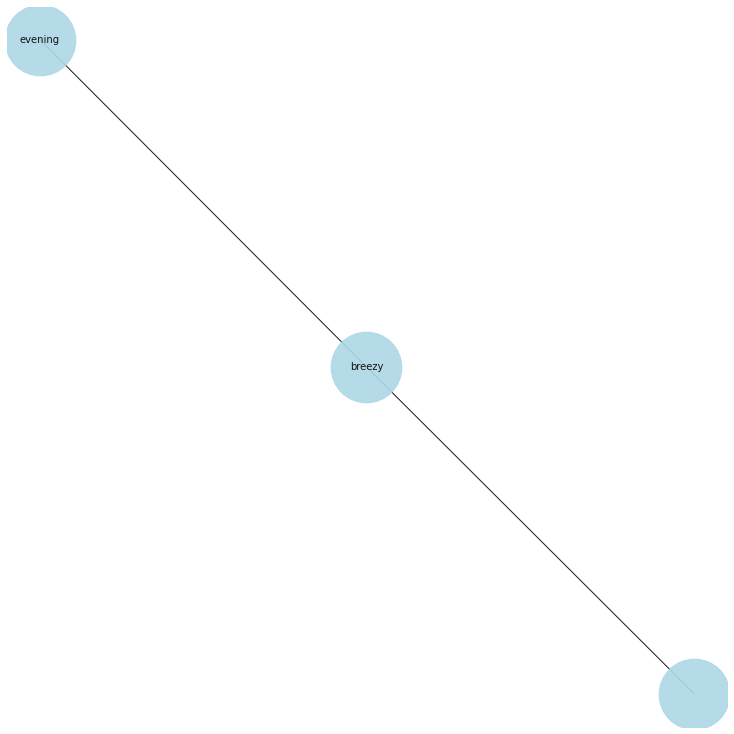

Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.
Partly -> advmod
cloudy -> amod
starting -> nsubj
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
starting , cloudy continue , morning evening afternoon


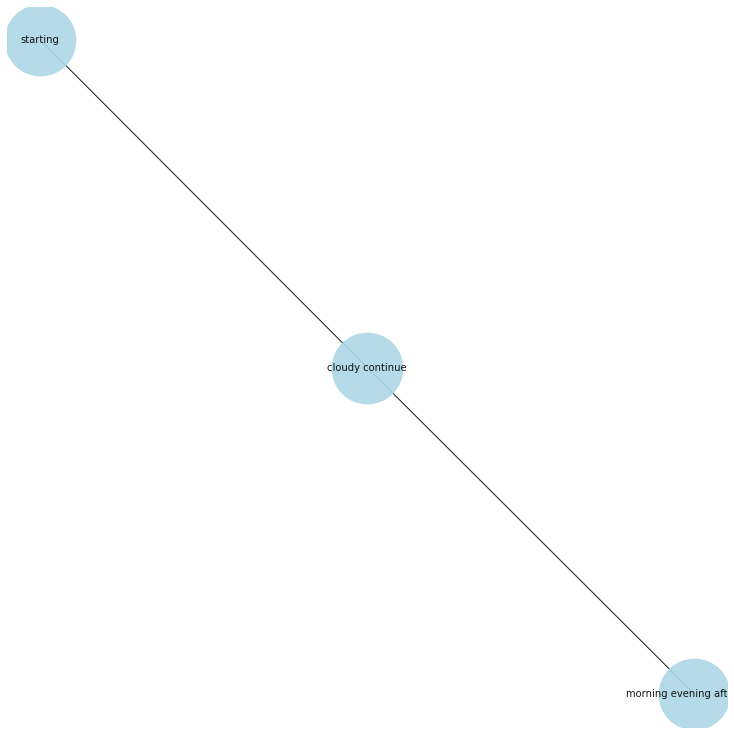

Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.
Mostly -> advmod
cloudy -> ROOT
throughout -> prep
the -> det
day -> pobj
and -> cc
breezy -> conj
starting -> advcl
overnight -> advmod
continuing -> xcomp
until -> prep
afternoon -> pobj
. -> punct
 , cloudy , day afternoon


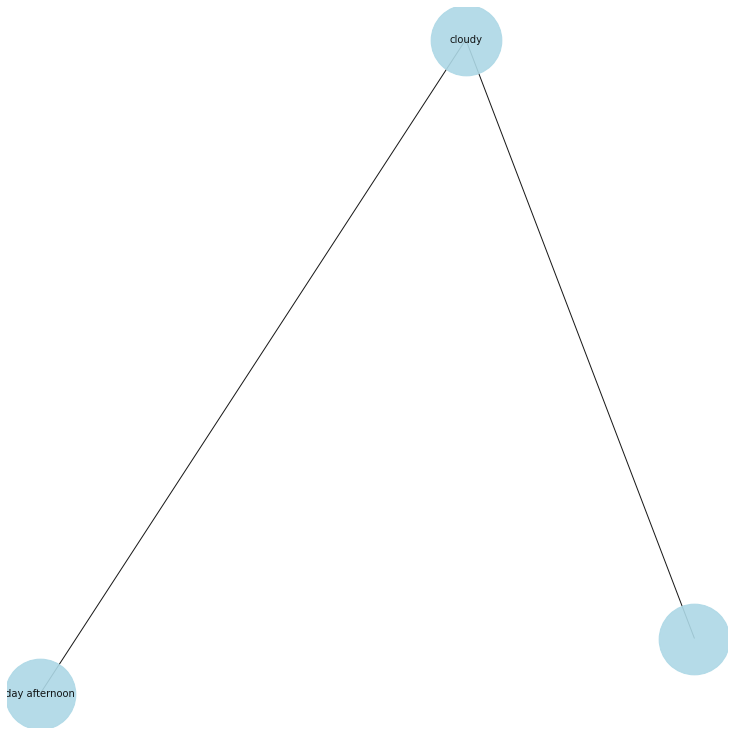

Breezy starting in the morning continuing until afternoon and partly cloudy starting in the morning.
Breezy -> ROOT
starting -> acl
in -> prep
the -> det
morning -> pobj
continuing -> acl
until -> prep
afternoon -> pobj
and -> cc
partly -> advmod
cloudy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
. -> punct
 , Breezy , morning afternoon morning


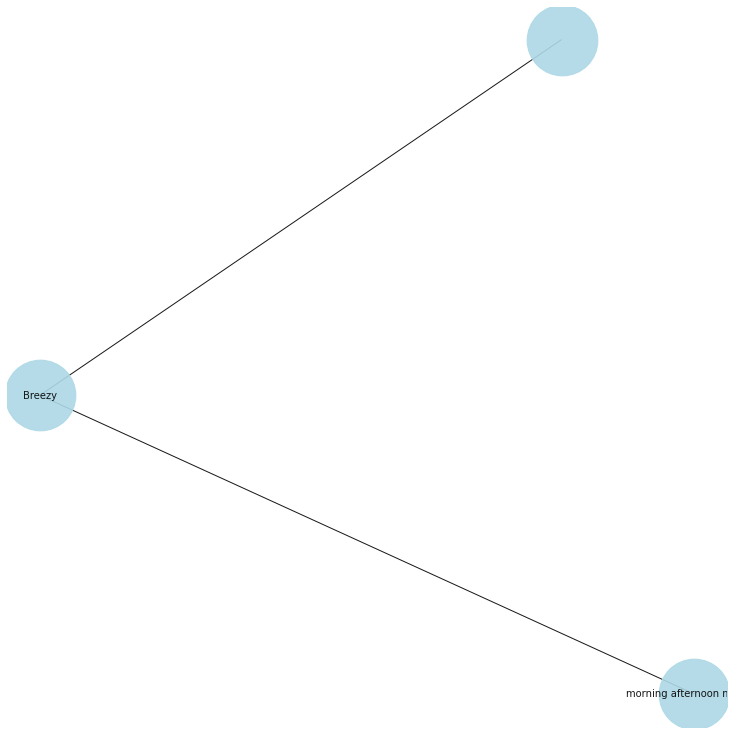

Mostly cloudy until evening and breezy in the evening.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
evening -> pobj
. -> punct
 , cloudy , evening evening


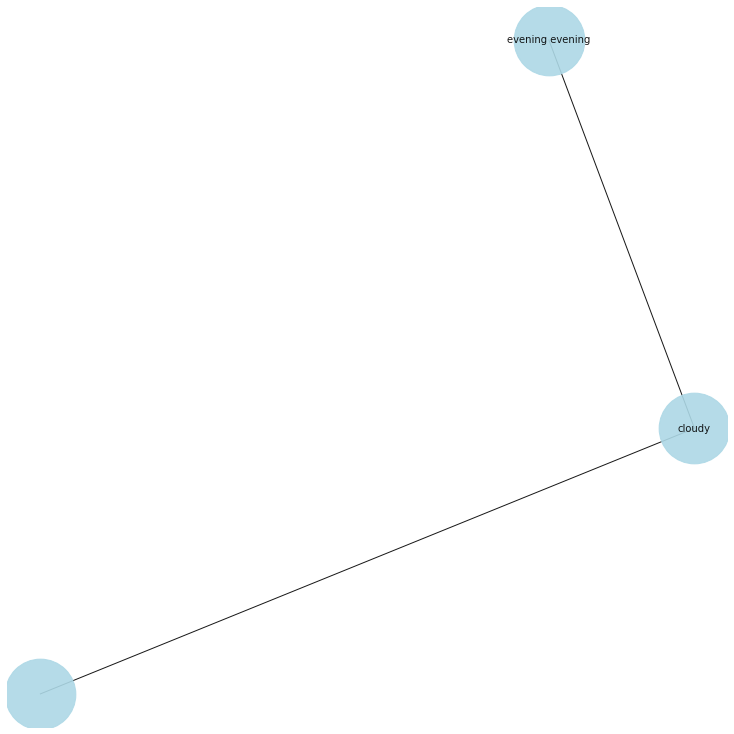

Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.
Partly -> advmod
cloudy -> amod
starting -> advcl
overnight -> advmod
and -> cc
breezy -> conj
starting -> advcl
in -> prep
the -> det
morning -> pobj
continuing -> ROOT
until -> prep
afternoon -> pobj
. -> punct
 , cloudy continue , morning afternoon


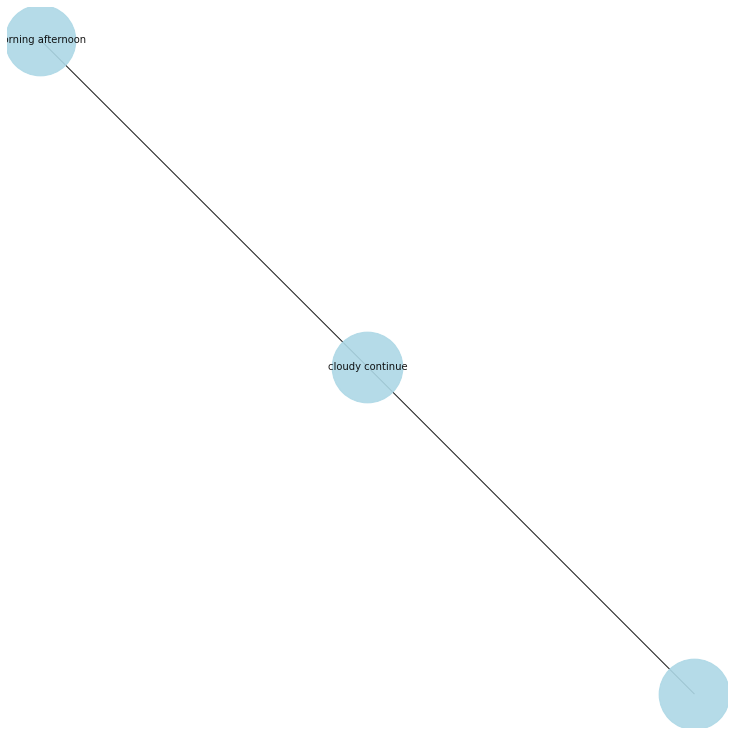

Mostly cloudy until evening and breezy starting overnight continuing until morning.
Mostly -> advmod
cloudy -> ROOT
until -> prep
evening -> nsubj
and -> cc
breezy -> conj
starting -> pcomp
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
evening , cloudy , morning


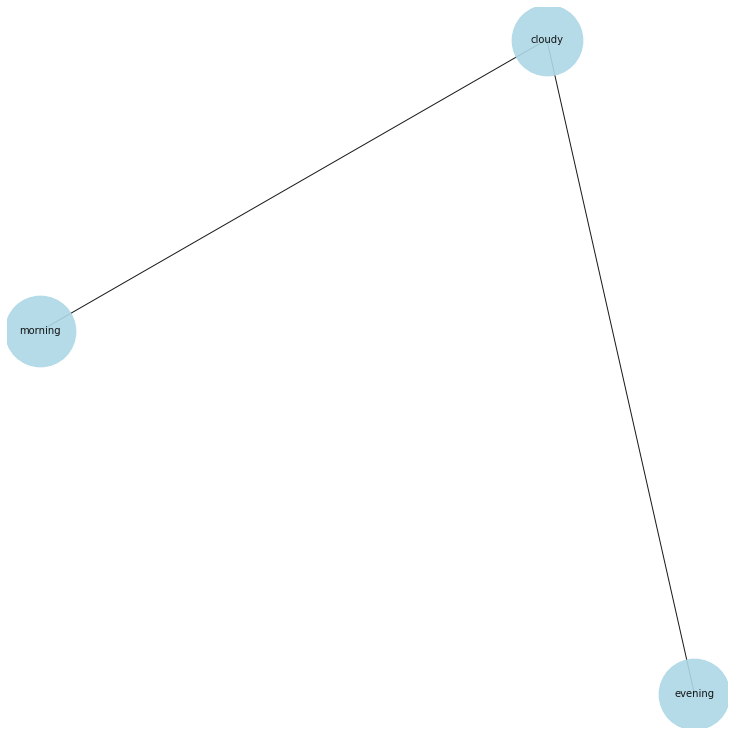

Partly cloudy starting overnight continuing until afternoon and breezy in the afternoon.
Partly -> advmod
cloudy -> amod
starting -> amod
overnight -> advmod
continuing -> ROOT
until -> prep
afternoon -> pobj
and -> cc
breezy -> conj
in -> prep
the -> det
afternoon -> pobj
. -> punct
 , cloudy start continue , afternoon afternoon


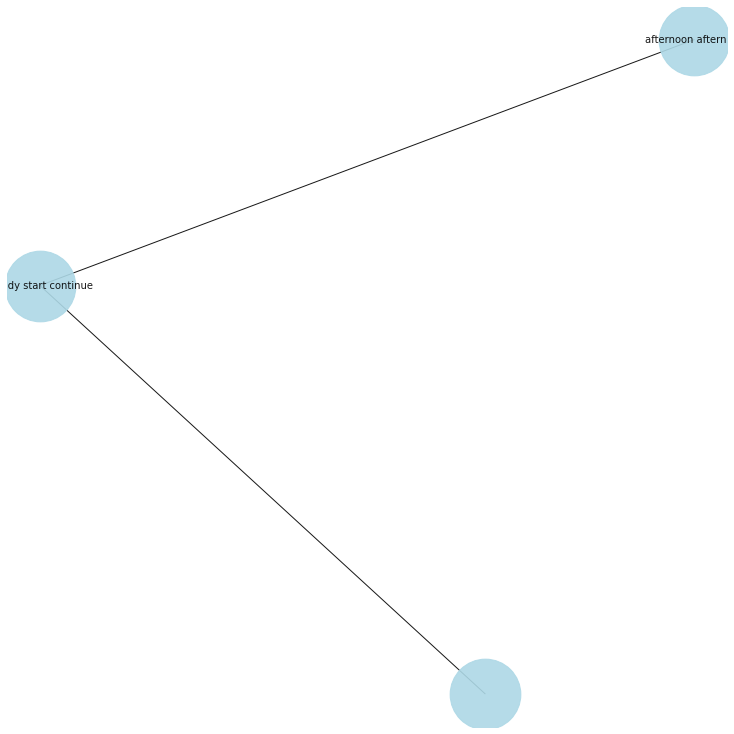

Breezy starting overnight continuing until morning.
Breezy -> ROOT
starting -> acl
overnight -> advmod
continuing -> xcomp
until -> prep
morning -> pobj
. -> punct
 , breezy , morning


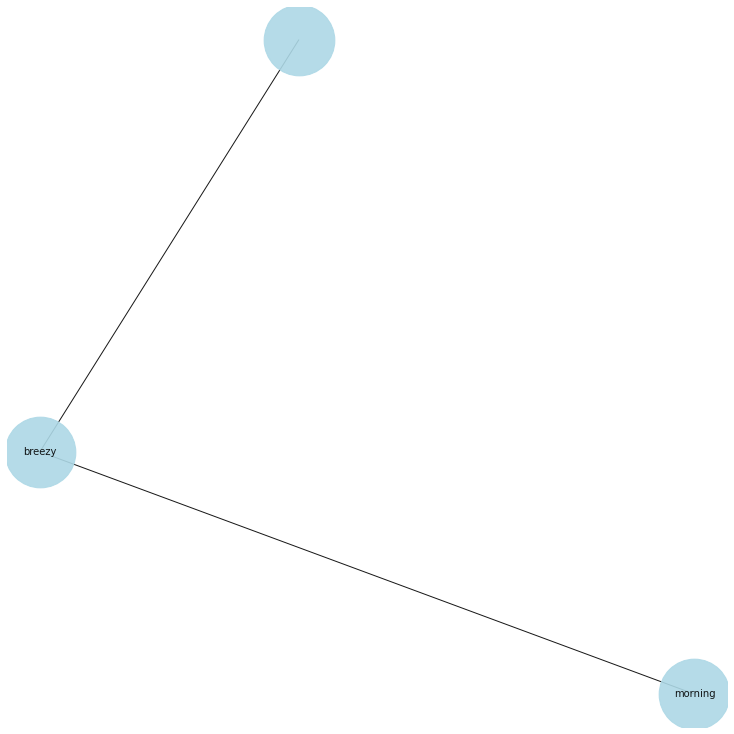

Breezy in the morning and partly cloudy starting in the evening continuing until night.
Breezy -> nsubj
in -> prep
the -> det
morning -> pobj
and -> cc
partly -> advmod
cloudy -> conj
starting -> acl
in -> prep
the -> det
evening -> pobj
continuing -> ROOT
until -> prep
night -> pobj
. -> punct
Breezy , continue , morning evening night


KeyboardInterrupt: 

In [26]:
for text in  data['Daily Summary'].value_counts().index.tolist():
    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))
    printGraph(triples)

In [27]:
len(data['Daily Summary'].value_counts().index.tolist())

214

In [28]:
data['Daily Summary'].value_counts().index.tolist()

['Mostly cloudy throughout the day.',
 'Partly cloudy throughout the day.',
 'Partly cloudy until night.',
 'Partly cloudy starting in the morning.',
 'Foggy in the morning.',
 'Foggy starting overnight continuing until morning.',
 'Partly cloudy until evening.',
 'Mostly cloudy until night.',
 'Overcast throughout the day.',
 'Partly cloudy starting in the morning continuing until evening.',
 'Foggy until morning.',
 'Partly cloudy starting in the morning continuing until night.',
 'Mostly cloudy starting in the morning.',
 'Foggy starting in the evening.',
 'Partly cloudy starting overnight.',
 'Partly cloudy starting in the afternoon.',
 'Partly cloudy starting in the afternoon continuing until evening.',
 'Foggy overnight.',
 'Mostly cloudy starting overnight.',
 'Mostly cloudy until evening.',
 'Clear throughout the day.',
 'Partly cloudy starting overnight continuing until night.',
 'Partly cloudy overnight.',
 'Foggy throughout the day.',
 'Partly cloudy starting overnight conti

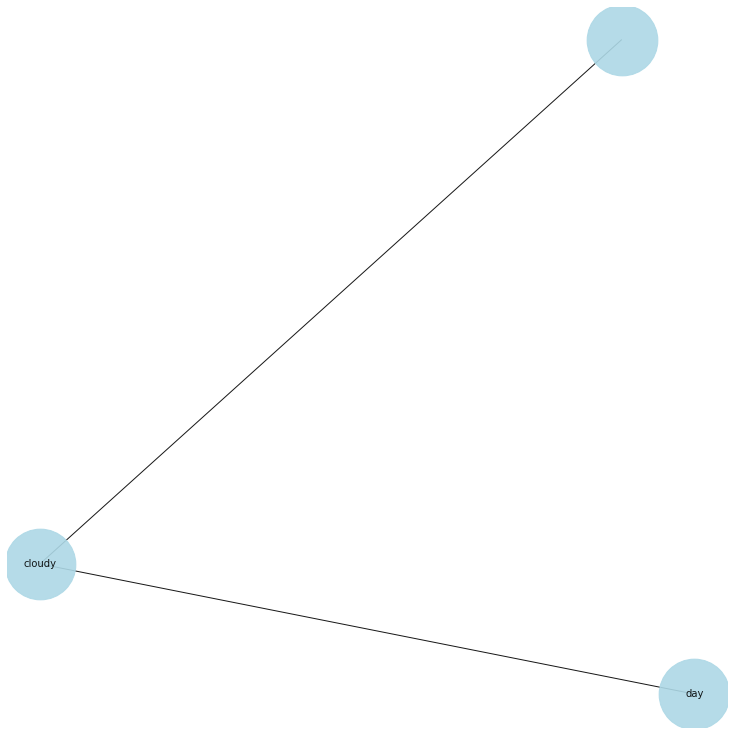

In [21]:
!python -m spacy download en_core_web_sm

C:\Users\Rishabh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rishabh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Rishabh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=bd5aa631900622295fbaef57cadec393233f9f7808173f2da3000e130d2ec269
  Stored in directory: C:\Users\Rishabh\AppData\Local\Temp\pip-ephem-wheel-cache-yurl6wgi\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.0.0
    Uninstalling en-core-web-sm-3.0.0:
      Successfully uninstalled en-core-web-sm-3.0.0
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [22]:
nlp_model = spacy.load('en_core_web_sm')

In [17]:
clean_text('Foggy starting in the morning continuing until afternoon and breezy starting in the evening.')

'foggy starting in the morning continuing until afternoon and breezy starting in the evening.'

In [6]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],)

In [12]:
import lazypredict
from lazypredict.Supervised import  LazyRegressor
from sklearn.model_selection import train_test_split
X=data[[col for col in data.columns if col!='Humidity' and col !='Formatted Date']]
Y=data['Humidity']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
regressor = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
model,predictions= regressor.fit(x_train,x_test,y_train,y_test)

  2%|██                                                                                    | 1/42 [00:06<04:12,  6.15s/it]

AdaBoostRegressor model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


  7%|██████▏                                                                               | 3/42 [00:10<01:54,  2.93s/it]

BaggingRegressor model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform
BayesianRidge model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


 12%|██████████▏                                                                           | 5/42 [00:11<00:51,  1.39s/it]

DecisionTreeRegressor model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform
DummyRegressor model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


 14%|████████████▎                                                                         | 6/42 [00:12<00:34,  1.04it/s]

ElasticNet model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


 17%|██████████████▎                                                                       | 7/42 [00:12<00:30,  1.16it/s]

ElasticNetCV model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


 19%|████████████████▍                                                                     | 8/42 [00:13<00:24,  1.40it/s]

ExtraTreeRegressor model failed to execute
Found unknown categories ['Dangerously Windy and Partly Cloudy'] in column 0 during transform


 19%|████████████████▍                                                                     | 8/42 [00:25<01:48,  3.19s/it]


KeyboardInterrupt: 

In [18]:
data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Partly cloudy starting in the morning and breezy in the evening.                                           24
Breezy starting in the morning continuing until afternoon and mostly cloudy starting in the morning.       24
Overcast throughout the day and breezy in the afternoon.                                                   24
Mostly clo

In [27]:
from pycaret.regression import *
reg = setup(data = data, target = 'Humidity'           )

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            11:10:19
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
Formatted Date            Categorical
Summary                   Categorical
Precip Type               Categorical
Temperature (C)               Numeric
Apparent Temperature (C)      Numeric
Wind Speed (km/h)             Numeric
Wind Bearing (degrees)        Numeric
Visibility (km)               Numeric
Loud Cover                    Numeric
Pressure (millibars)          Numeric
Daily Summary             Categorical
Humidity                        Label

MemoryError: Unable to allocate 17.0 GiB for an array with shape (67744, 67517) and data type float32

In [31]:
!pip uninstall pandas

^C
